In [1]:
%run My_function.ipynb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
print ("Librairies utilisées :")
print ("Pandas :", pd.__version__)
print ("Numpy :", np.__version__)
print ("Seaborn :", sns.__version__)

Librairies utilisées :
Pandas : 1.4.4
Numpy : 1.21.5
Seaborn : 0.11.2


# Introduction

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="862" data-codio-button-label="Accéder au code"><p>&nbsp;</p>

<p style="text-align:center;">Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.</p>
<p><img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png" alt=""></p>
<p>&nbsp;</p>
<p>L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !</p>
<p>Votre manager, Patrick, vous briefe par un e-mail :</p><br/>
<div class="oc-tableContainer"><table>
<tbody>
<tr>
<td style="text-align:left;"><strong>De</strong> : Patrick<br><strong>À </strong>: Moi<br><strong>Objet</strong> : Lancement mission data international</td>
</tr>
<tr>
<td style="font-size:13px;">
<p>Salut !</p>
<p>Comme on en a déjà brièvement parlé, je te fais ce mail pour te briefer sur la mission d’analyse pour le lancement à l’international.</p>
<p>Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.&nbsp;</p>
<p>Tu seras en totale autonomie sur ce projet, notamment sur le choix des données à analyser et même du langage à utiliser (R ou Python).&nbsp;</p>
<p>Pars des données de la FAO <em>(Food and Agriculture Organization)</em> que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en <em>open data</em> que tu souhaites sur <a href="http://www.fao.org/faostat/fr/#data/">le site de la FAO</a>.</p>
<p>Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...</p>
<p>Voici ce que j’attends de toi :</p>
<ul style="text-align:left;">
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données ;</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées ;</li>
<li>une présentation qui récapitule les points suivants :&nbsp;</li>
<ul>
<li>le contexte du projet de data analyse ;</li>
<li>votre démarche (sans entrer dans les détails mathématiques, mais en vulgarisant les sujets abordés) ;</li>
<li>vos résultats et recommandations.</li>
</ul>
</ul>
<p>&nbsp;</p>
<p>Bon courage !</p>
<p>Patrick</p>
</td>
</tr>
<tr>
<td style="text-align:left;">
<p>Pièce jointe :</p>
<ul>
<li><a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P9-data.zip">Données New Food Balances (FAO)</a></li>
</ul>
</td>
</tr>
</tbody>
</table></div>
<p>&nbsp;</p>
<p>&nbsp;Vous avez toutes les cartes en main. À vous de jouer !</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788716972812_Banner-Livrables.png" alt="Bannière livrables"></p>

<ol>
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données.</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées.</li>
<li>une présentation du travail réalisé (Powerpoint ou équivalent, maximum 20 slides).</li>
</ol>

</div>

In [4]:
# On importe nos données

# Fichier CSV contenant des données sur la disponibilité alimentaire par pays en 2017
df = pd.read_csv("Données/DisponibiliteAlimentaire_2017.csv", sep=";")

indic_macro = pd.read_csv("Données/Indicateurs_macro.csv")

vie_saine = pd.read_csv("Données/Coût_et_abordabilité_d’une_alimentation_saine.csv")

series_temp = pd.read_csv("Données/Séries_temporelles_annuelles.csv")

prod_poulet = pd.read_csv("Données/production_poulet.csv")

pays_continent = pd.read_excel("Données/pays_continent.xlsx")

elevage_poulet = pd.read_csv("Données/Elevage_poulets.csv")

stabilité_politique = pd.read_csv("Données/PoliticalStability.csv", sep=";")

distance_fr_monde = pd.read_csv("Données/distance_fr_monde.csv", sep=";")


In [5]:
df

Code Domaine                      Domaine  Code zone ISO3         Zone  \
0               FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
1               FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
2               FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
3               FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
4               FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
...             ...                          ...        ...  ...          ...   
176595          FBS  Nouveaux Bilans Alimentaire        181  ZWE     Zimbabwe   
176596          FBS  Nouveaux Bilans Alimentaire        181  ZWE     Zimbabwe   
176597          FBS  Nouveaux Bilans Alimentaire        181  ZWE     Zimbabwe   
176598          FBS  Nouveaux Bilans Alimentaire        181  ZWE     Zimbabwe   
176599          FBS  Nouveaux Bilans Alimentaire        181  ZWE     Zimbabwe   

        Code Élément                                            Élément  \
0               5511                                         Production   
1               5611                            Importations - Quantité   
2               5072                                 Variation de stock   
3               5911                            Exportations - Quantité   
4               5301                           Disponibilité intérieure   
...              ...                                                ...   
176595          5142                                         Nourriture   
176596           645  Disponibilité alimentaire en quantité (kg/pers...   
176597           664     Disponibilité alimentaire (Kcal/personne/jour)   
176598           674  Disponibilité de protéines en quantité (g/pers...   
176599           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit          Produit  Code année  Année               Unité  \
0               2511  Blé et produits        2017   2017  Milliers de tonnes   
1               2511  Blé et produits        2017   2017  Milliers de tonnes   
2               2511  Blé et produits        2017   2017  Milliers de tonnes   
3               2511  Blé et produits        2017   2017  Milliers de tonnes   
4               2511  Blé et produits        2017   2017  Milliers de tonnes   
...              ...              ...         ...    ...                 ...   
176595          2899     Miscellanees        2017   2017  Milliers de tonnes   
176596          2899     Miscellanees        2017   2017                  kg   
176597          2899     Miscellanees        2017   2017  Kcal/personne/jour   
176598          2899     Miscellanees        2017   2017     g/personne/jour   
176599          2899     Miscellanees        2017   2017     g/personne/jour   

         Valeur Symbole Description du Symbole  
0       4281.00       S  Données standardisées  
1       2302.00       S  Données standardisées  
2       -119.00       S  Données standardisées  
3          0.00       S  Données standardisées  
4       6701.00       S  Données standardisées  
...         ...     ...                    ...  
176595    19.00       S  Données standardisées  
176596     1.33      Fc        Donnée calculée  
176597     1.00      Fc        Donnée calculée  
176598     0.04      Fc        Donnée calculée  
176599     0.02      Fc        Donnée calculée  

[176600 rows x 15 columns]

Pour le premier fichier, on souhaite avoir une ligne par pays avec les informations nécessaire à l'analyse. 
Pour ce faire, nous commençons par réaliser un pivot de la colonne "Element" et par "Produit" en filtrant sur la colonne "Année". Ces données seront aggrégé sur la Zone.
Ce qui nous interesse ici ce sont les données concernant les volailles. 

In [6]:
df["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [7]:
# On filtre sur l'année 2017

df = df.loc[df["Année"]==2017]

# Ce qui nous interesse, se sont les information sur la "Viande de Volailles". On filtre
df = df.loc[df["Produit"]=="Viande de Volailles"]
df.head()

Code Domaine                      Domaine  Code zone ISO3         Zone  \
651          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
652          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
653          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
654          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   
655          FBS  Nouveaux Bilans Alimentaire          2  AFG  Afghanistan   

     Code Élément                   Élément  Code Produit  \
651          5511                Production          2734   
652          5611   Importations - Quantité          2734   
653          5072        Variation de stock          2734   
654          5301  Disponibilité intérieure          2734   
655          5123                    Pertes          2734   

                 Produit  Code année  Année               Unité  Valeur  \
651  Viande de Volailles        2017   2017  Milliers de tonnes    28.0   
652  Viande de Volailles        2017   2017  Milliers de tonnes    29.0   
653  Viande de Volailles        2017   2017  Milliers de tonnes     0.0   
654  Viande de Volailles        2017   2017  Milliers de tonnes    57.0   
655  Viande de Volailles        2017   2017  Milliers de tonnes     2.0   

    Symbole Description du Symbole  
651       S  Données standardisées  
652       S  Données standardisées  
653       S  Données standardisées  
654       S  Données standardisées  
655       S  Données standardisées

In [8]:
df.shape

(2061, 15)

Grâce à ces filtres, on passe d'une table avec 176600 lignes à une table de 2061 lignes. 

Pour terminer de mettre en forme notre tableau, on fait un pivot. On souhaite que :
- Notre index soit les pays
- Nos colonnes soient les Eléments
- Nos valeurs soient les valeurs attaché aux éléments.

In [9]:
df = df.pivot(index=["Zone","ISO3"],columns="Élément", values="Valeur").reset_index()

In [10]:
df = df.set_index("Zone")

Désormais nous avons une table avec 172 pays et 17 variables. 

Nous pouvons passer à l'analyse de notre table

In [11]:
df

Élément               ISO3  Alimentation pour touristes  \
Zone                                                      
Afghanistan            AFG                          NaN   
Afrique du Sud         ZAF                          0.0   
Albanie                ALB                          NaN   
Algérie                DZA                          0.0   
Allemagne              DEU                          NaN   
...                    ...                          ...   
Émirats arabes unis    ARE                          NaN   
Équateur               ECU                          0.0   
États-Unis d'Amérique  USA                          NaN   
Éthiopie               ETH                          0.0   
Îles Salomon           SLB                          0.0   

Élément                Aliments pour animaux  \
Zone                                           
Afghanistan                              NaN   
Afrique du Sud                           NaN   
Albanie                                  NaN   
Algérie                                  NaN   
Allemagne                                NaN   
...                                      ...   
Émirats arabes unis                      NaN   
Équateur                                 NaN   
États-Unis d'Amérique                    NaN   
Éthiopie                                 NaN   
Îles Salomon                             NaN   

Élément                Autres utilisations (non alimentaire)  \
Zone                                                           
Afghanistan                                              NaN   
Afrique du Sud                                           NaN   
Albanie                                                  NaN   
Algérie                                                  NaN   
Allemagne                                                NaN   
...                                                      ...   
Émirats arabes unis                                      NaN   
Équateur                                                 NaN   
États-Unis d'Amérique                                   89.0   
Éthiopie                                                 NaN   
Îles Salomon                                             NaN   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Algérie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
Émirats arabes unis                                             147.0   
Équateur                                                         83.0   
États-Unis d'Amérique                                           219.0   
Éthiopie                                                          0.0   
Îles Salomon                                                     18.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'A

# Analyse Exploratoire de nos données

## Table Disponibilité Intérieure

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


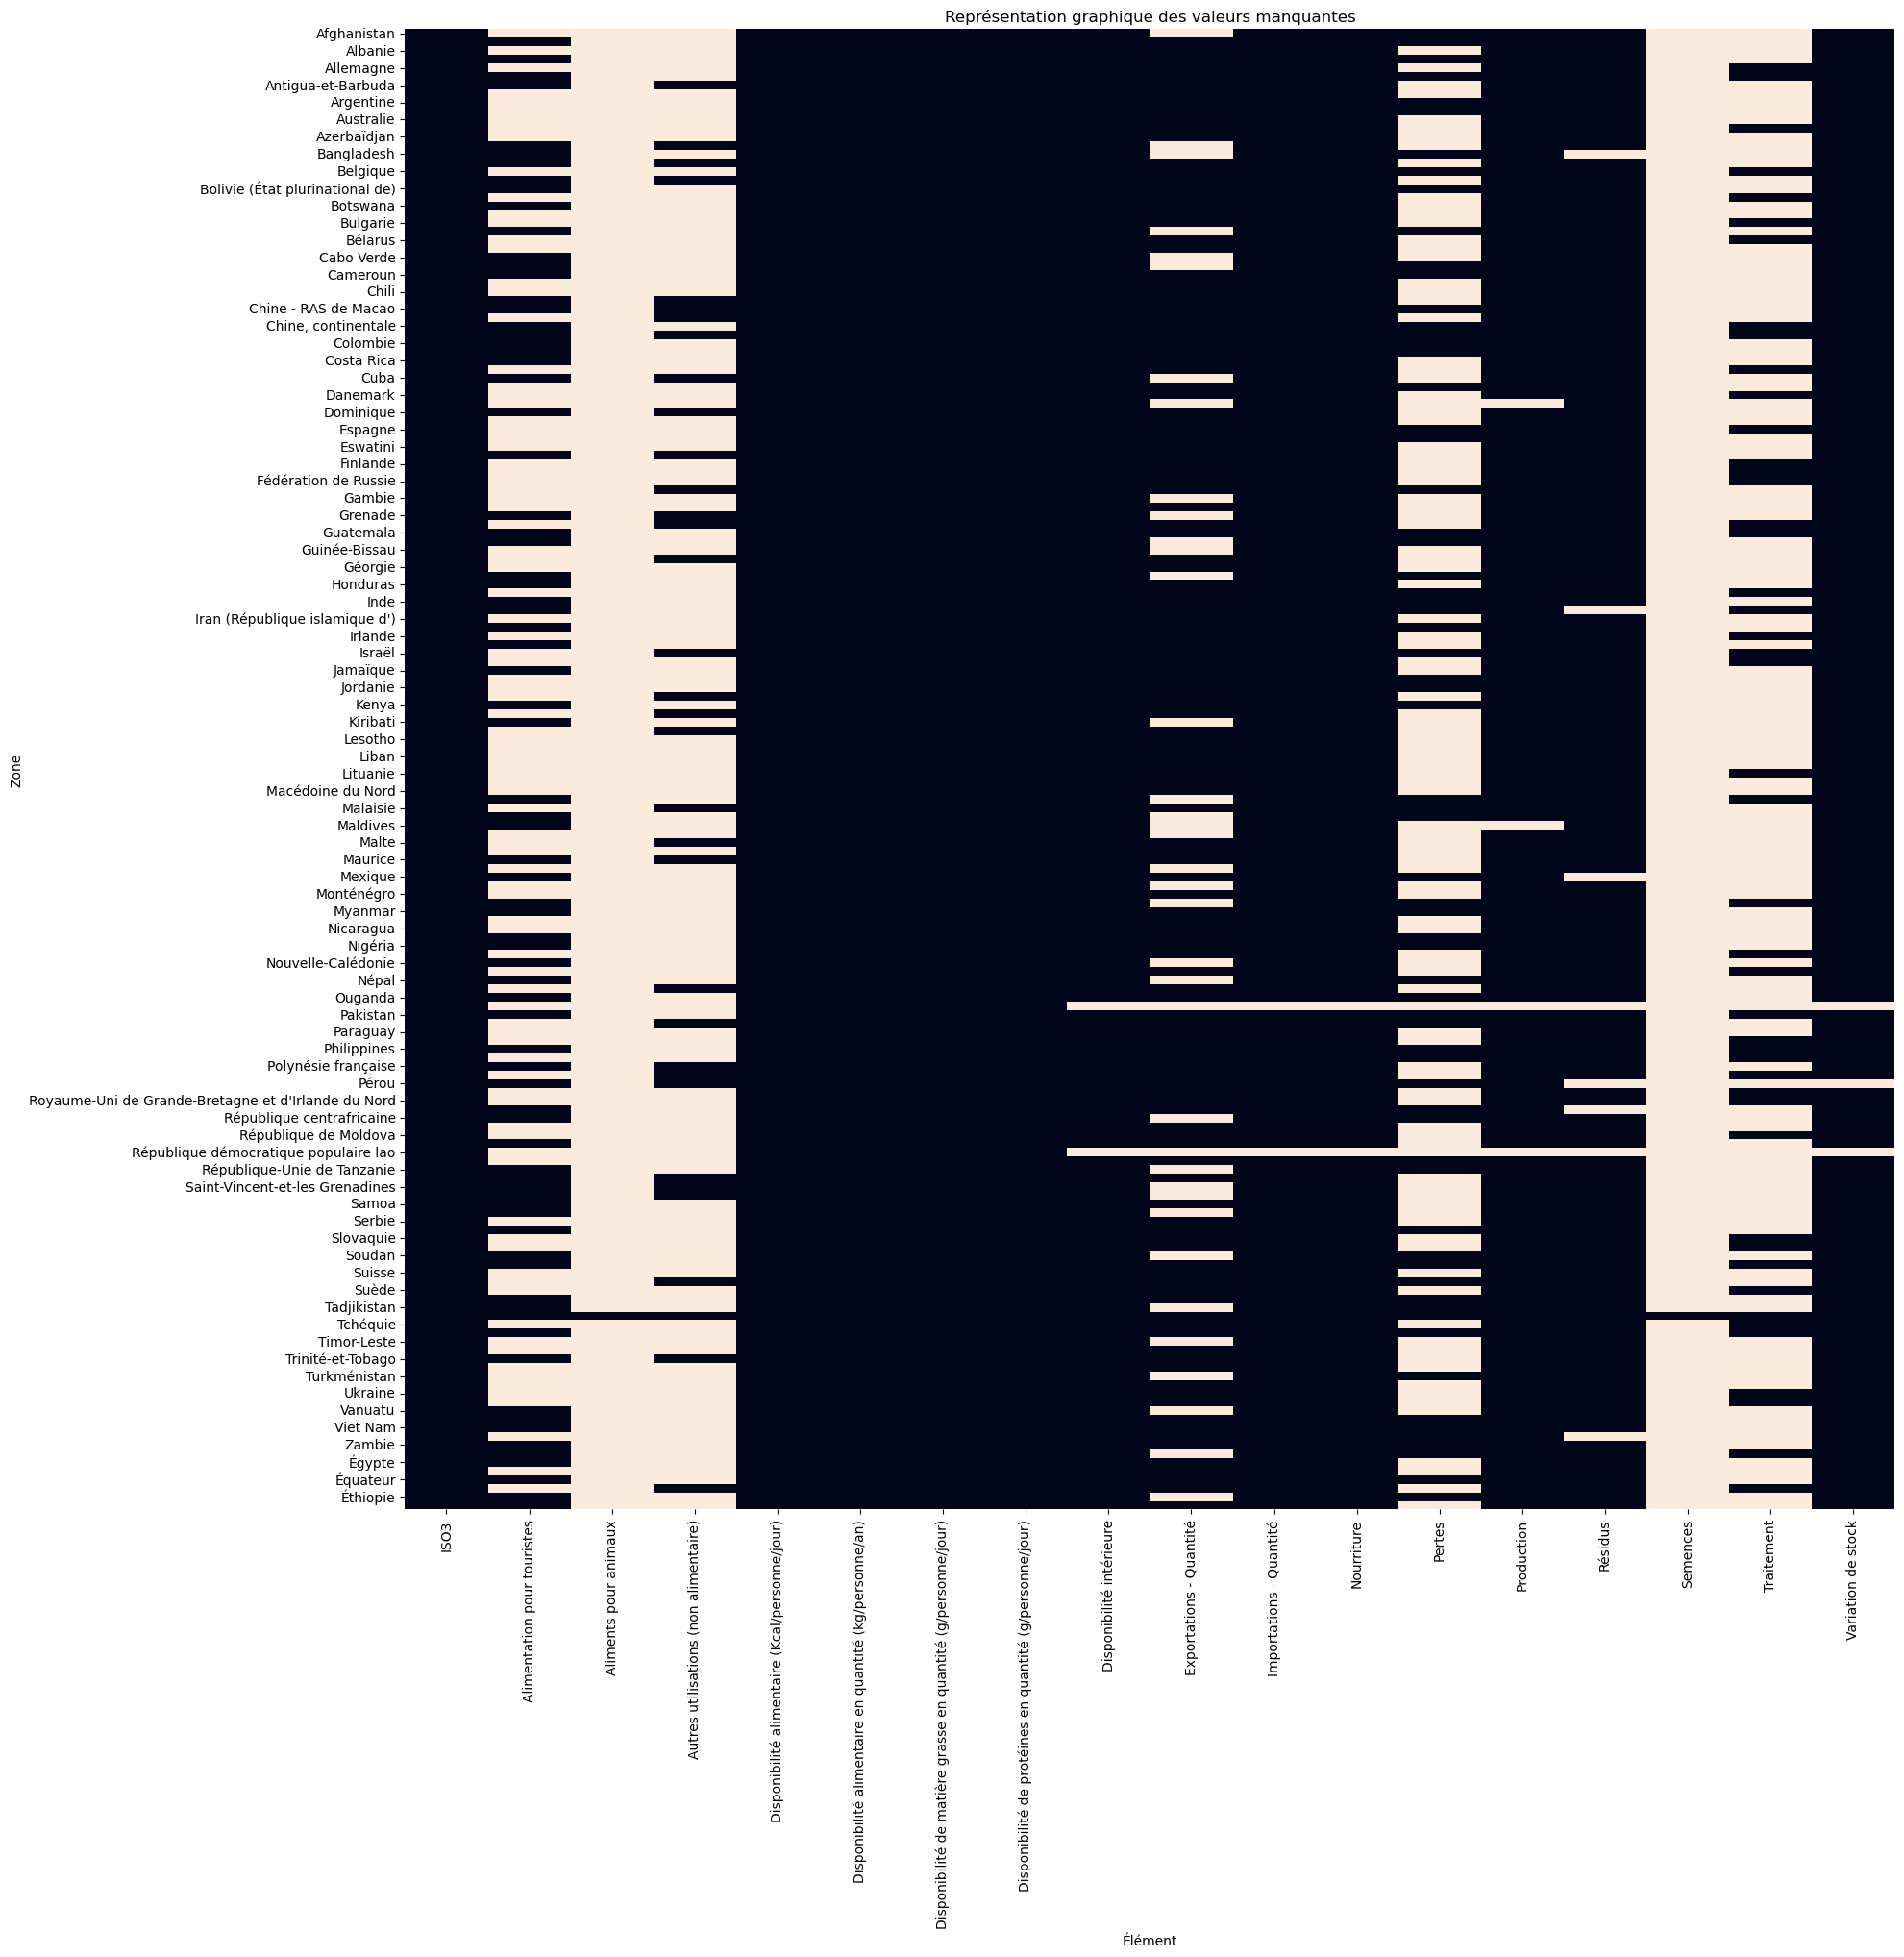

observations  variables  \
Élément                                                                       
Aliments pour animaux                                        172         18   
Semences                                                     172         18   
Autres utilisations (non alimentaire)                        172         18   
Traitement                                                   172         18   
Pertes                                                       172         18   
Alimentation pour touristes                                  172         18   
Exportations - Quantité                                      172         18   
Résidus                                                      172         18   
Production                                                   172         18   
Variation de stock                                           172         18   
Importations - Quantité                                      172         18   
Nourriture                                                   172         18   
Disponibilité intérieure                                     172         18   
Disponibilité de protéines en quantité (g/perso...           172         18   
Disponibilité de matière grasse en quantité (g/...           172         18   
Disponibilité alimentaire en quantité (kg/perso...           172         18   
Disponibilité alimentaire (Kcal/personne/jour)               172         18   
ISO3                                                         172         18   

                                                      moyennes  medianes  \
Élément                                                                    
Aliments pour animaux                                 0.000000     0.000   
Semences                                              0.000000     0.000   
Autres utilisations (non alimentaire)                44.117647     2.000   
Traitement                                           26.282609     4.000   
Pertes                                               43.582090     4.000   
Alimentation pour touristes                           0.217949     0.000   
Exportations - Quantité                             132.185185     3.000   
Résidus                                              -2.835366     0.000   
Production                                          725.190476    70.000   
Variation de stock                                   13.668639     0.000   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Disponibilité intérieure                            687.594118   100.000   
Disponibilité de protéines en quantité (g/perso...    7.121279     6.505   
Disponibilité de matière grasse en quantité (g/...    4.898430     3.745   
Disponibilité alimentaire en quantité (kg/perso...   20.213372    18.090   
Disponibilité alimentaire (Kcal/personne/jour)       74.558140    64.000   
ISO3                                                       NaN       NaN   

                                                    ecart_types    min  \
Élément                                                                  
Aliments pour animaux                                       NaN    0.0   
Semences                                                    NaN    0.0   
Autres utilisations (non alimentaire)                142.433135    0.0   
Traitement                                            55.020668    0.0   
Pertes                                               120.818816    0.0   
Alimentation pour touristes                            2.399391  -18.0   
Exportations - Quantité                              513.784440    0.0   
Résidus                                               13.579702 -125.0   
Production                                          2501.457125    0.0   
Variation de stock                                    75.364884 -119.0   
Importations - Quantité                              186.66998

In [12]:
# On utilise la fonction my_first_analyse()
my_first_analyse(df).sort_values("%_valeurs_manquantes", ascending=False)

On découvre qu'il y a plusieurs variables dont les valeurs sont manquantes. Je décide de supprimer les variables :
- Aliments pour animaux
- Semences
- Autres utilisations (non alimentaire)
- Traitement

On supprime également des colonnes qui ne nous seront pas utile dans notre analyse:
- Disponibilité alimentaire (Kcal/personne/jour)
- Disponibilité alimentaire en quantité (kg/personne/an)
- Disponibilité de matière grasse en quantité (g/personne/jour)
- Disponibilité de protéines en quantité (g/personne/jour)

In [13]:
# On supprime les colonnes souhaitées
df = df.drop(["Aliments pour animaux","Semences","Autres utilisations (non alimentaire)","Traitement","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Alimentation pour touristes","Résidus","Variation de stock"], axis=1)
df

Élément               ISO3  \
Zone                         
Afghanistan            AFG   
Afrique du Sud         ZAF   
Albanie                ALB   
Algérie                DZA   
Allemagne              DEU   
...                    ...   
Émirats arabes unis    ARE   
Équateur               ECU   
États-Unis d'Amérique  USA   
Éthiopie               ETH   
Îles Salomon           SLB   

Élément                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

Élément                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                                57.0                      NaN   
Afrique du Sud                           2118.0                     63.0   
Albanie                                    47.0                      0.0   
Algérie                                   277.0                      0.0   
Allemagne                                1739.0                    646.0   
...                                         ...                      ...   
Émirats arabes unis                       412.0                     94.0   
Équateur                                  341.0                      0.0   
États-Unis d'Amérique                   18266.0                   3692.0   
Éthiopie                                   14.0                      NaN   
Îles Salomon                                3.0                      0.0   

Élément                Importations - Quantité  Nourriture  Pertes  Production  
Zone                                                                            
Afghanistan                               29.0        55.0     2.0        28.0  
Afrique du Sud                           514.0      2035.0    83.0      1667.0  
Albanie                                   38.0        47.0     NaN        13.0  
Algérie                                    2.0       264.0    13.0       275.0  
Allemagne                                842.0      1609.0     NaN      1514.0  
...                                        ...         ...     ...         ...  
Émirats arabes unis                      433.0       412.0     NaN        48.0  
Équateur                                   0.0       324.0    17.0       340.0  
États-Unis d'Amérique                    123.0     18100.0     NaN     21914.0  
Éthiopie                                   1.0        14.0     1.0        14.0  
Îles Salomon                               6.0         3.0     NaN         0.0  

[172 rows x 8 columns]

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


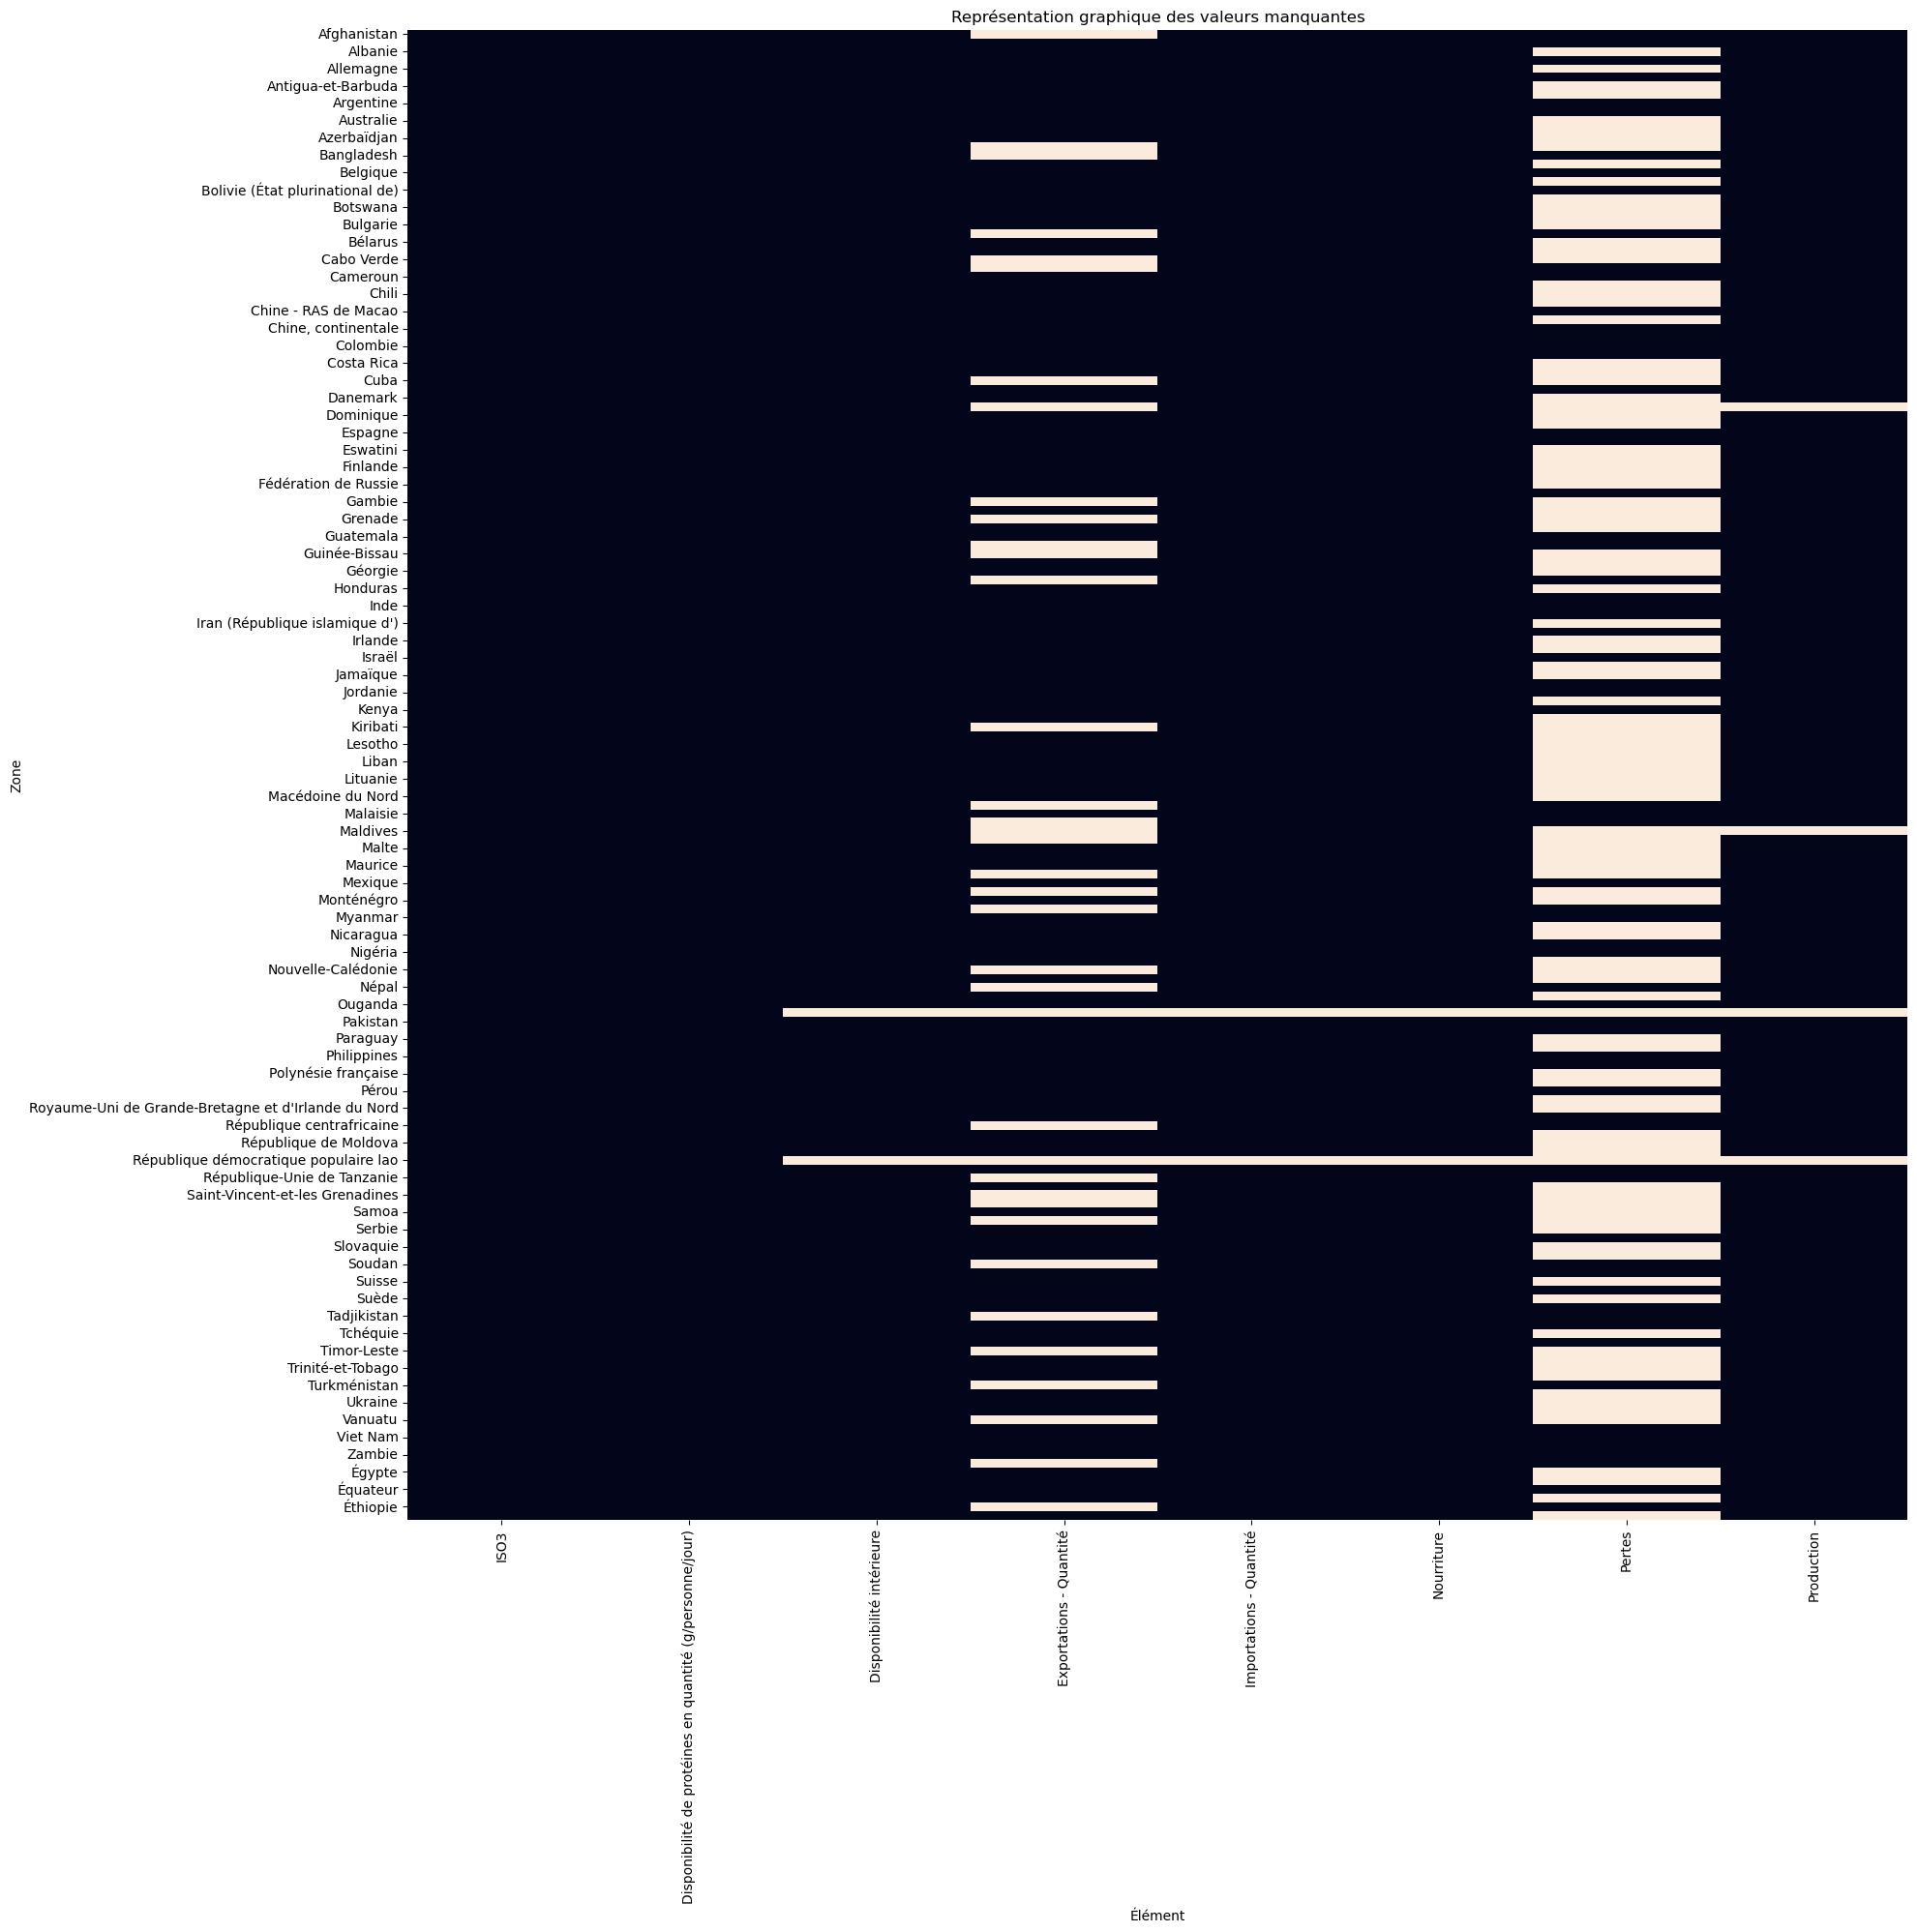

observations  variables  \
Élément                                                                       
Pertes                                                       172          8   
Exportations - Quantité                                      172          8   
Production                                                   172          8   
Disponibilité intérieure                                     172          8   
Importations - Quantité                                      172          8   
Nourriture                                                   172          8   
Disponibilité de protéines en quantité (g/perso...           172          8   
ISO3                                                         172          8   

                                                      moyennes  medianes  \
Élément                                                                    
Pertes                                               43.582090     4.000   
Exportations - Quantité                             132.185185     3.000   
Production                                          725.190476    70.000   
Disponibilité intérieure                            687.594118   100.000   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Disponibilité de protéines en quantité (g/perso...    7.121279     6.505   
ISO3                                                       NaN       NaN   

                                                    ecart_types   min  \
Élément                                                                 
Pertes                                               120.818816   0.0   
Exportations - Quantité                              513.784440   0.0   
Production                                          2501.457125   0.0   
Disponibilité intérieure                            2187.184747   2.0   
Importations - Quantité                              186.669983   0.0   
Nourriture                                          2136.545796   2.0   
Disponibilité de protéines en quantité (g/perso...     5.603464  0.04   
ISO3                                                        NaN   AFG   

                                                        max  \
Élément                                                       
Pertes                                                695.0   
Exportations - Quantité                              4223.0   
Production                                          21914.0   
Disponibilité intérieure                            18266.0   
Importations - Quantité                              1069.0   
Nourriture                                          18100.0   
Disponibilité de protéines en quantité (g/perso...    27.87   
ISO3                                                    ZWE   

                                                    nb_valeurs_manquantes  \
Élément                                                                     
Pertes                                                                105   
Exportations - Quantité                                                37   
Production                                                              4   
Disponibilité intérieure                                                2   
Importations - Quantité                                                 2   
Nourriture                                                              2   
Disponibilité de protéines en quantité (g/perso...                      0   
ISO3                                                                    0   

                                                    %_valeurs_manquantes  
Élément                                                                   
Pertes                                                             61.05  
Exportations - Quantité                                            21.51  
Production                                                         

In [14]:
my_first_analyse(df).sort_values("%_valeurs_manquantes", ascending=False)

On constate graphiquement qu'il y a deux pays qui semblent ne pas avoir beaucoup de données. Nous allons vérifier. 

In [15]:
df.loc[df["Disponibilité intérieure"].isna()]

Élément                               ISO3  \
Zone                                         
Ouzbékistan                            UZB   
République démocratique populaire lao  LAO   

Élément                                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                                              
Ouzbékistan                                                                         0.63          
République démocratique populaire lao                                               3.59          

Élément                                Disponibilité intérieure  \
Zone                                                              
Ouzbékistan                                                 NaN   
République démocratique populaire lao                       NaN   

Élément                                Exportations - Quantité  \
Zone                                                             
Ouzbékistan                                                NaN   
République démocratique populaire lao                      NaN   

Élément                                Importations - Quantité  Nourriture  \
Zone                                                                         
Ouzbékistan                                                NaN         NaN   
République démocratique populaire lao                      NaN         NaN   

Élément                                Pertes  Production  
Zone                                                       
Ouzbékistan                               NaN         NaN  
République démocratique populaire lao     NaN         NaN

Au vue du peu de données que nous avons, je décide de supprimer ces deux pays. 

In [16]:
df = df.drop(["Ouzbékistan","République démocratique populaire lao"], axis=0)

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()


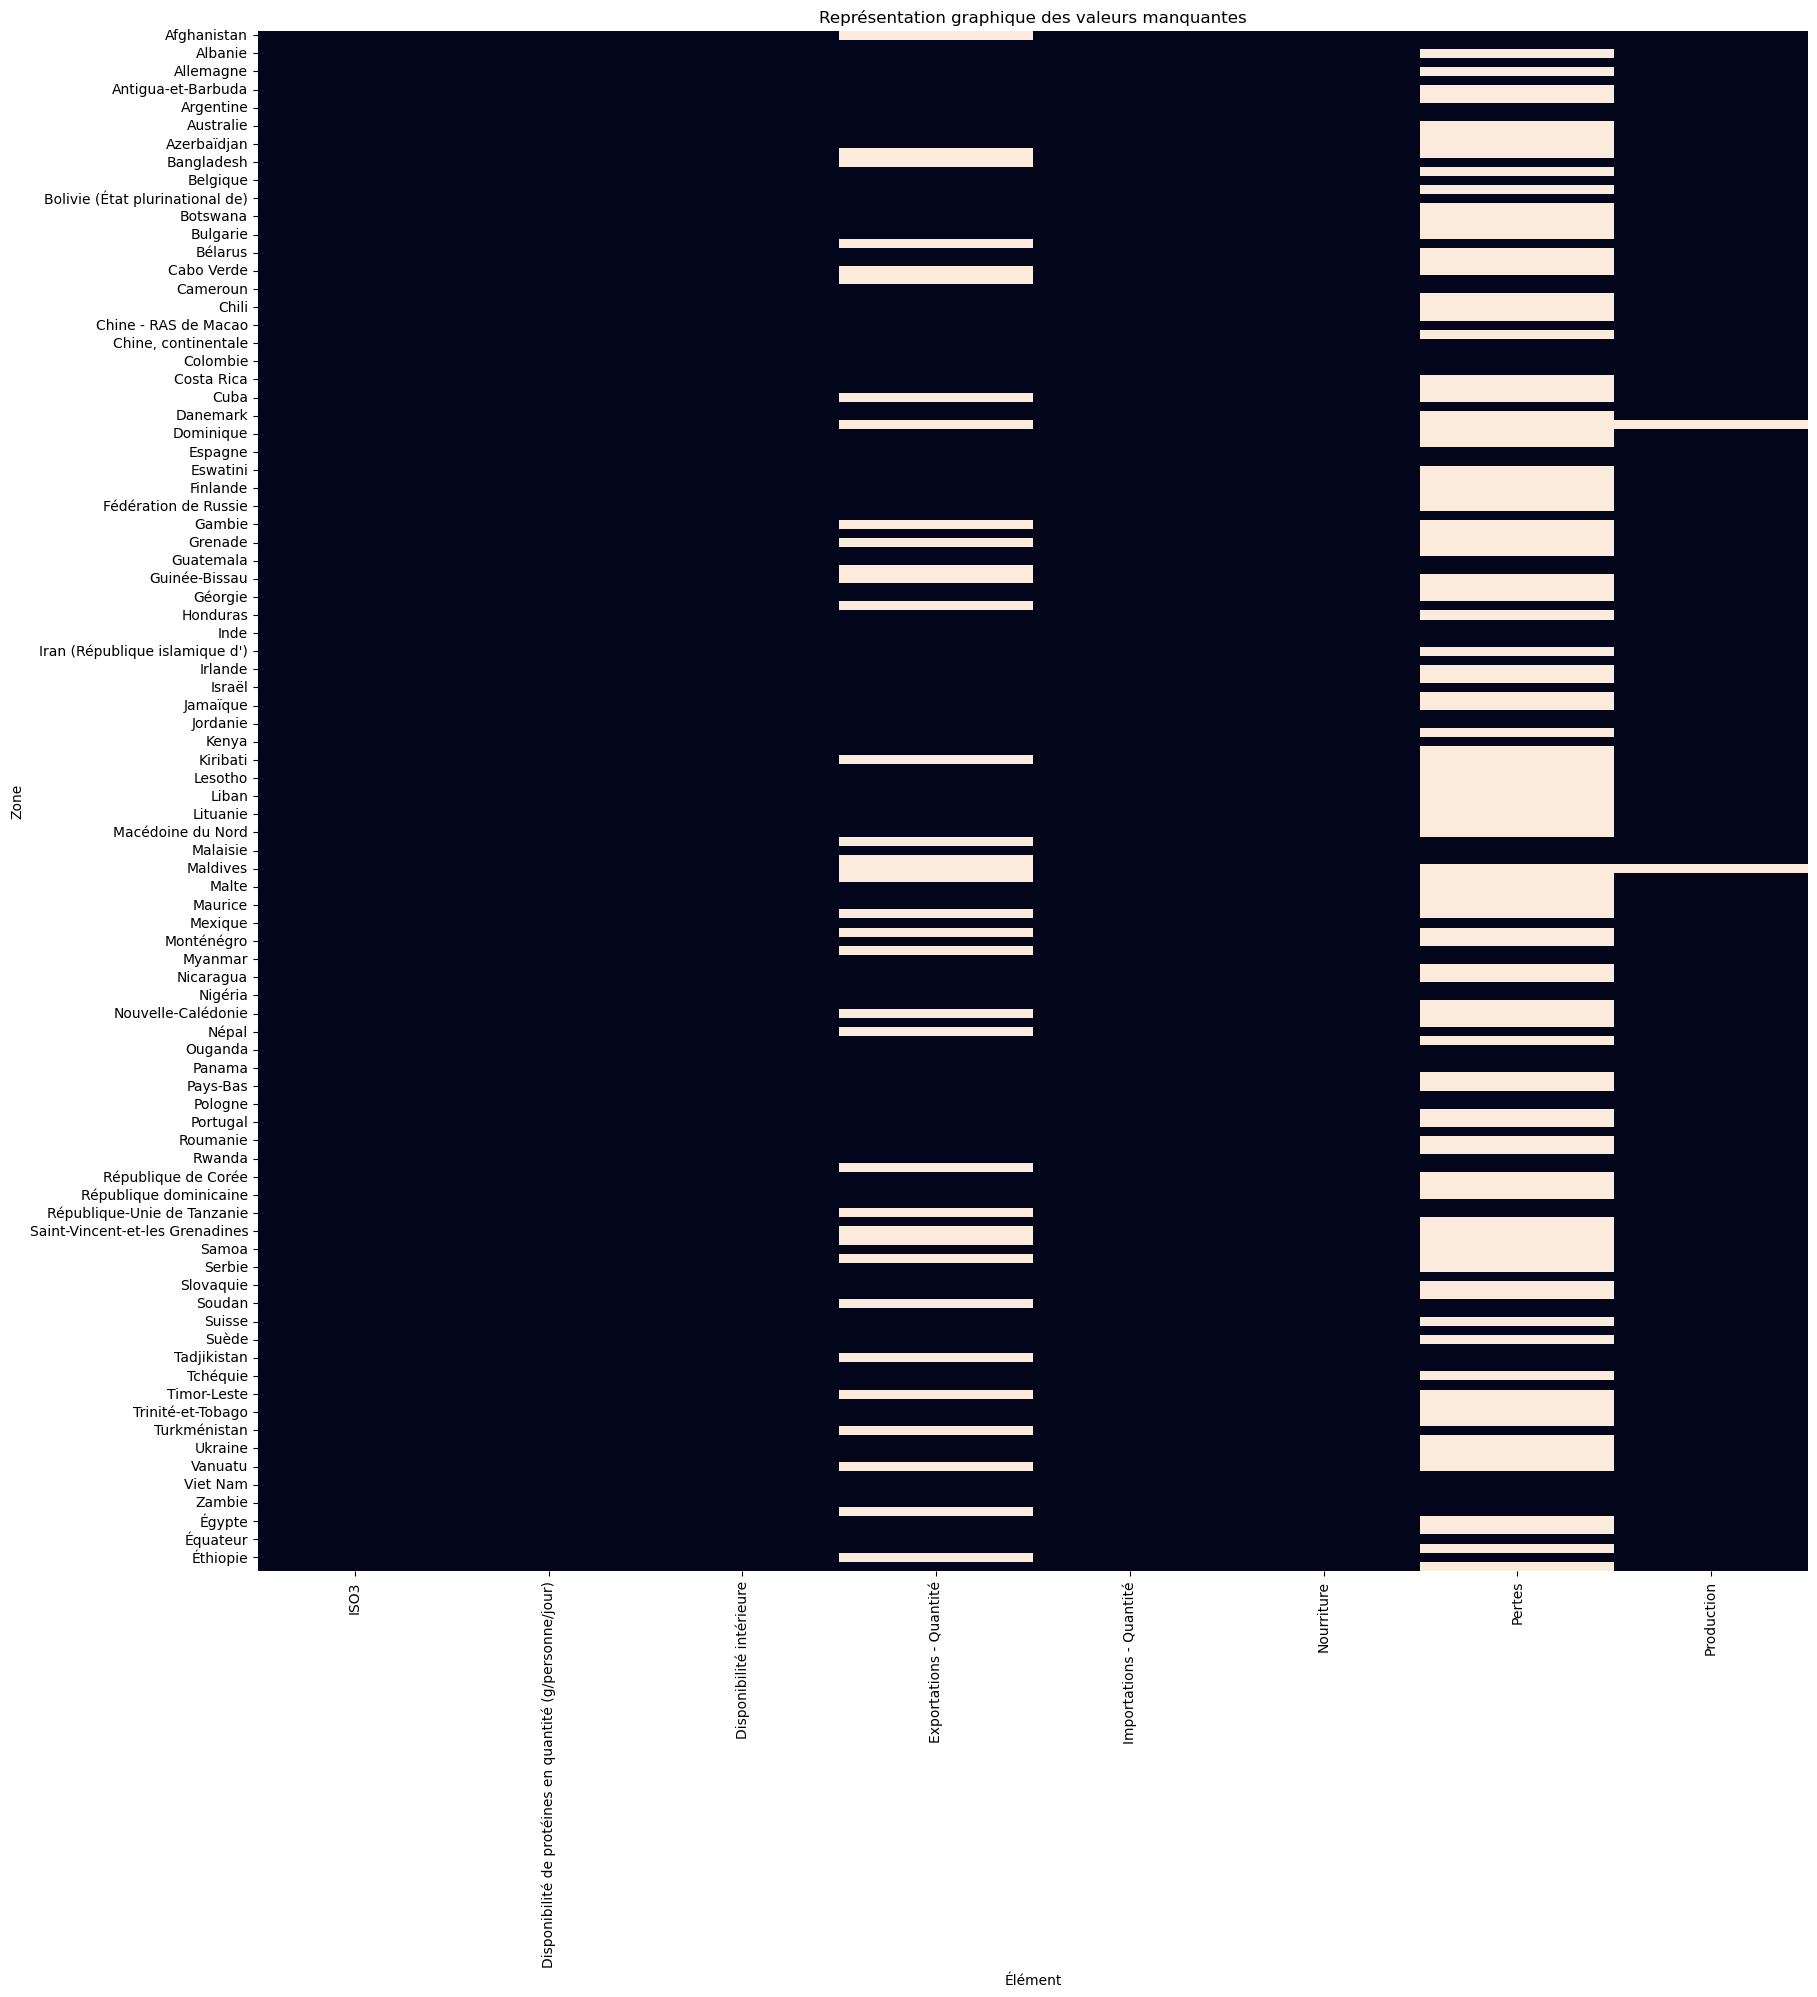

observations  variables  \
Élément                                                                       
Disponibilité de protéines en quantité (g/perso...           170          8   
Disponibilité intérieure                                     170          8   
Exportations - Quantité                                      170          8   
ISO3                                                         170          8   
Importations - Quantité                                      170          8   
Nourriture                                                   170          8   
Pertes                                                       170          8   
Production                                                   170          8   

                                                      moyennes  medianes  \
Élément                                                                    
Disponibilité de protéines en quantité (g/perso...    7.180235     6.585   
Disponibilité intérieure                            687.594118   100.000   
Exportations - Quantité                             132.185185     3.000   
ISO3                                                       NaN       NaN   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Pertes                                               43.582090     4.000   
Production                                          725.190476    70.000   

                                                    ecart_types   min  \
Élément                                                                 
Disponibilité de protéines en quantité (g/perso...     5.607475  0.04   
Disponibilité intérieure                            2187.184747   2.0   
Exportations - Quantité                              513.784440   0.0   
ISO3                                                        NaN   AFG   
Importations - Quantité                              186.669983   0.0   
Nourriture                                          2136.545796   2.0   
Pertes                                               120.818816   0.0   
Production                                          2501.457125   0.0   

                                                        max  \
Élément                                                       
Disponibilité de protéines en quantité (g/perso...    27.87   
Disponibilité intérieure                            18266.0   
Exportations - Quantité                              4223.0   
ISO3                                                    ZWE   
Importations - Quantité                              1069.0   
Nourriture                                          18100.0   
Pertes                                                695.0   
Production                                          21914.0   

                                                    nb_valeurs_manquantes  \
Élément                                                                     
Disponibilité de protéines en quantité (g/perso...                      0   
Disponibilité intérieure                                                0   
Exportations - Quantité                                                35   
ISO3                                                                    0   
Importations - Quantité                                                 0   
Nourriture                                                              0   
Pertes                                                                103   
Production                                                              2   

                                                    %_valeurs_manquantes  
Élément                                                                   
Disponibilité de protéines en quantité (g/perso...                  0.00  
Disponibilité intérieure                                            0.00  
Exportations - Quantité                                            

In [17]:
my_first_analyse(df)

On peut désormais s'attaquer aux valeurs manquantes 

In [18]:
df = my_missing_values(df, apply_all=True, strategie="valeur_constante")

Entrez une valeur constante pour remplacer les données manquantes : 0


On vérifie que les données manquantes ont bien été complétée

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5

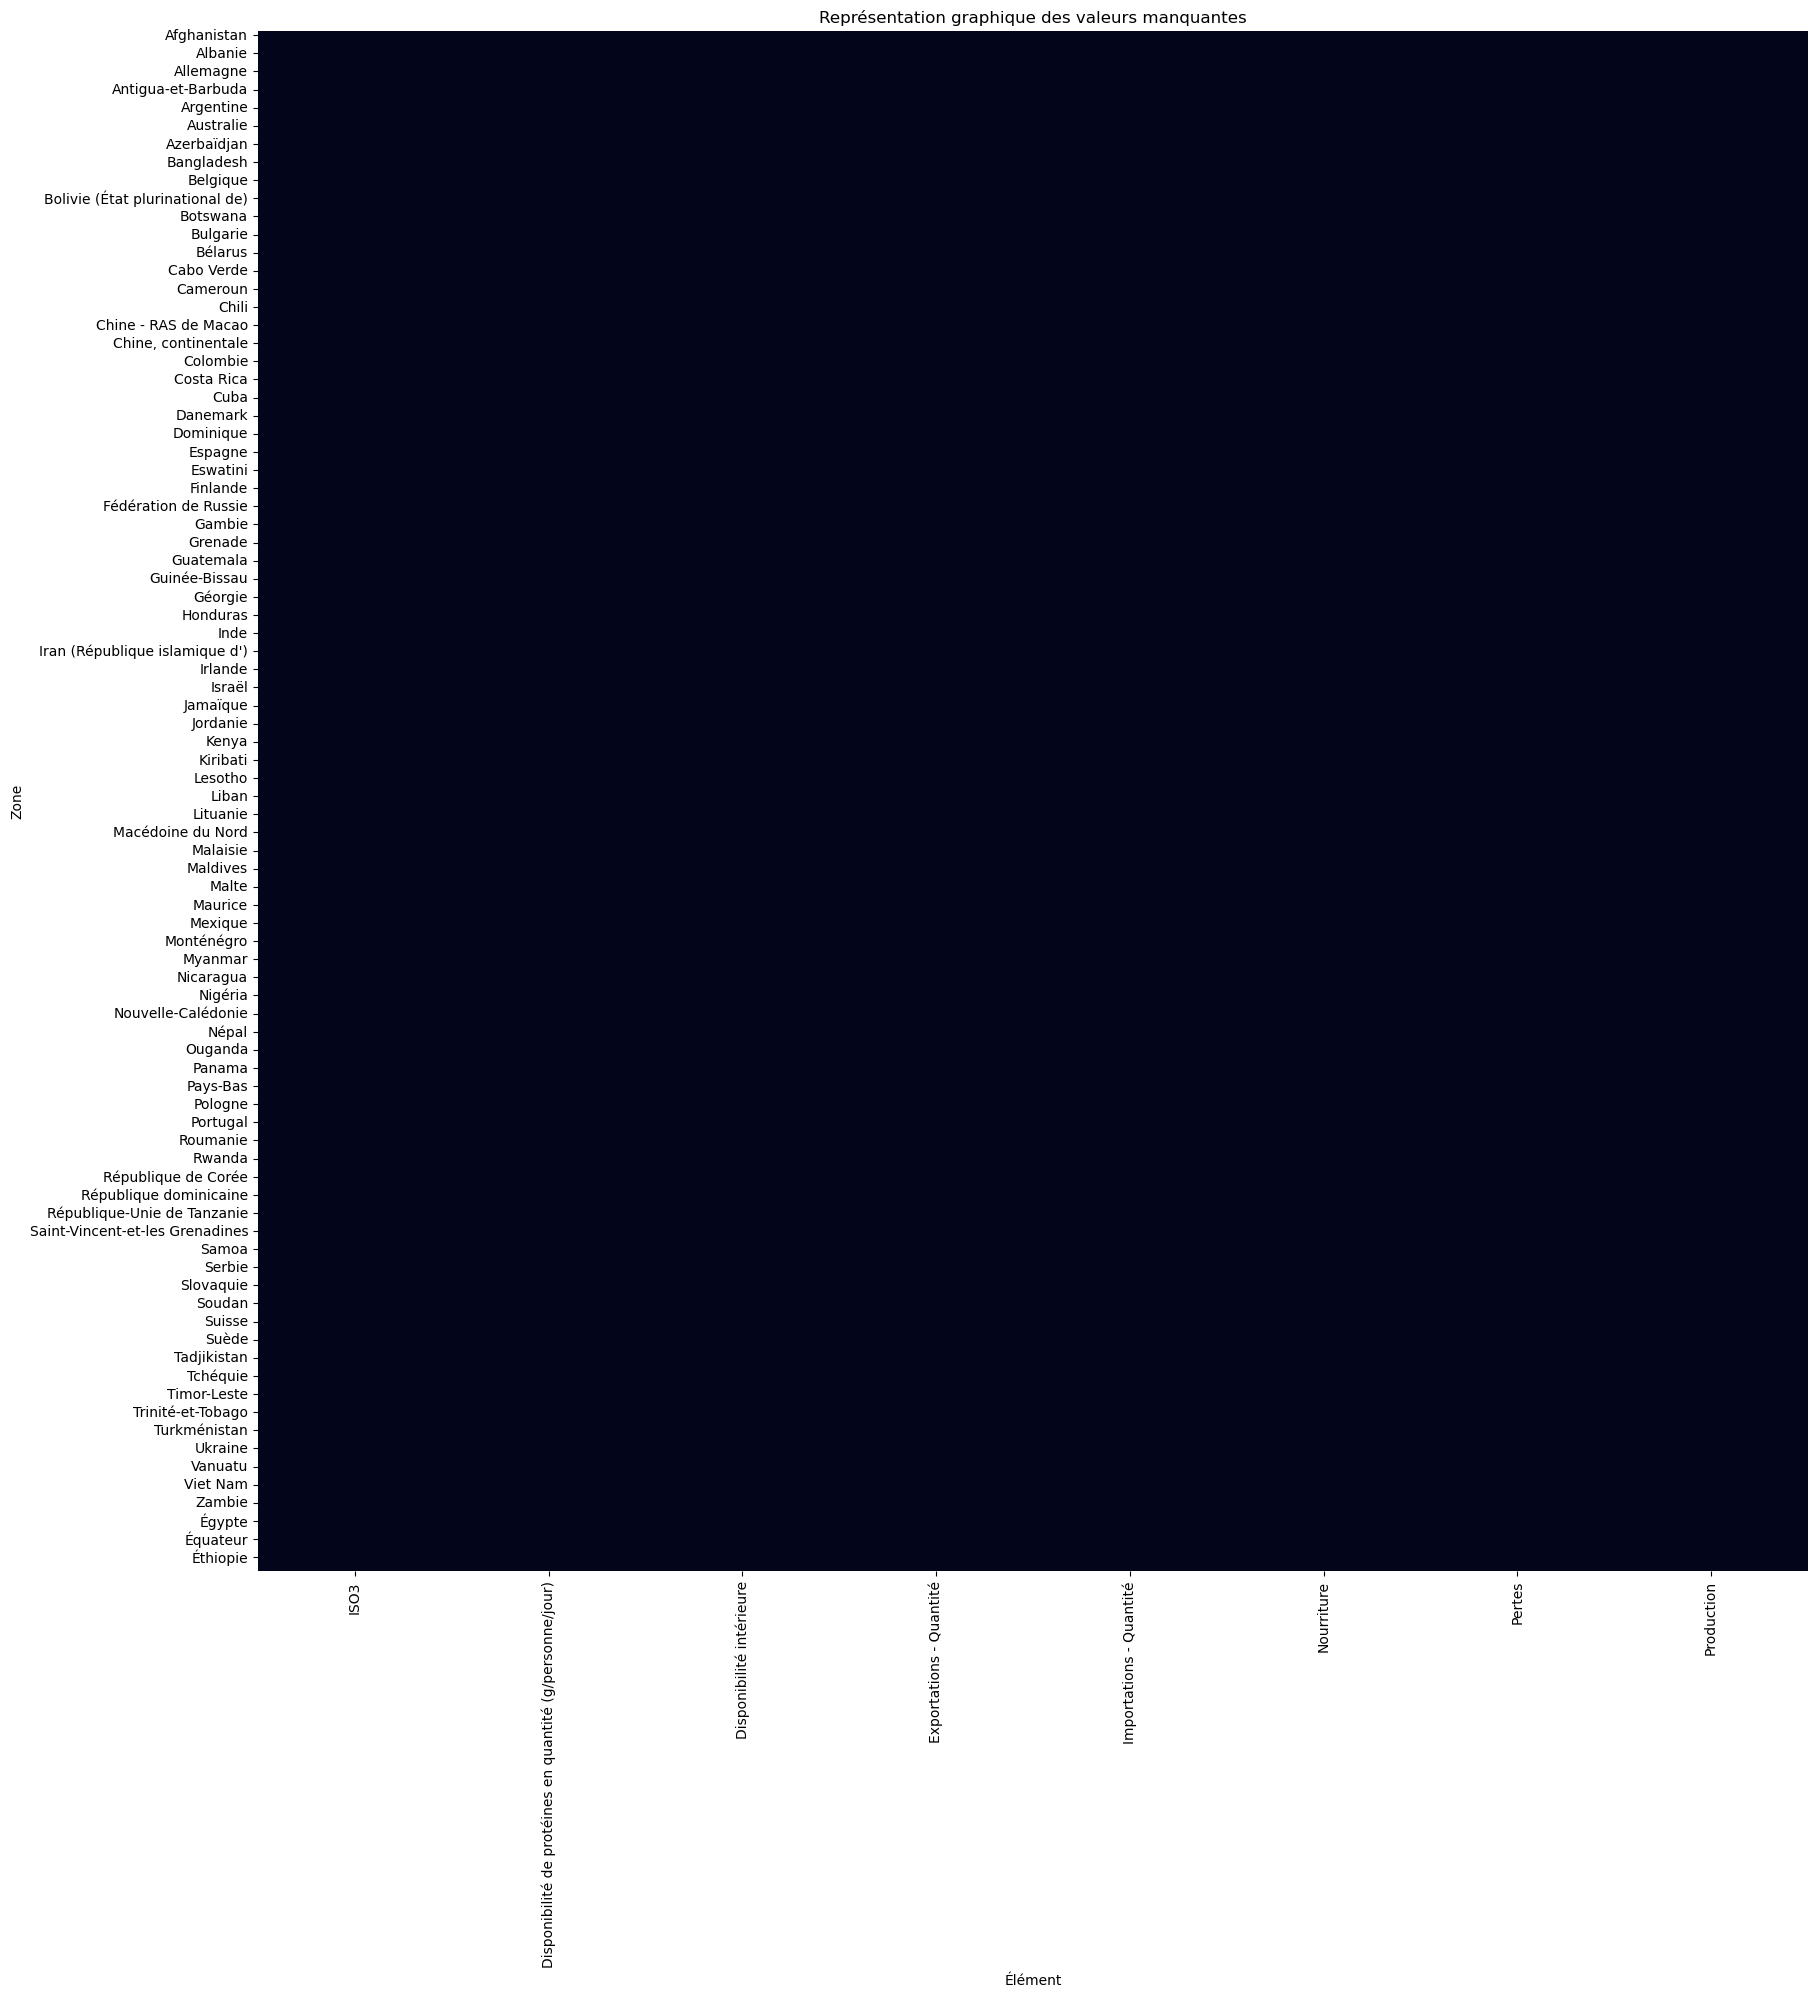

observations  variables  \
Élément                                                                       
Disponibilité de protéines en quantité (g/perso...           170          8   
Disponibilité intérieure                                     170          8   
Exportations - Quantité                                      170          8   
ISO3                                                         170          8   
Importations - Quantité                                      170          8   
Nourriture                                                   170          8   
Pertes                                                       170          8   
Production                                                   170          8   

                                                      moyennes  medianes  \
Élément                                                                    
Disponibilité de protéines en quantité (g/perso...    7.180235     6.585   
Disponibilité intérieure                            687.594118   100.000   
Exportations - Quantité                                    NaN     0.000   
ISO3                                                       NaN       NaN   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Pertes                                                     NaN     0.000   
Production                                                 NaN    68.000   

                                                    ecart_types   min  \
Élément                                                                 
Disponibilité de protéines en quantité (g/perso...     5.607475  0.04   
Disponibilité intérieure                            2187.184747   2.0   
Exportations - Quantité                                     NaN   NaN   
ISO3                                                        NaN   AFG   
Importations - Quantité                              186.669983   0.0   
Nourriture                                          2136.545796   2.0   
Pertes                                                      NaN   NaN   
Production                                                  NaN   NaN   

                                                        max  \
Élément                                                       
Disponibilité de protéines en quantité (g/perso...    27.87   
Disponibilité intérieure                            18266.0   
Exportations - Quantité                                 NaN   
ISO3                                                    ZWE   
Importations - Quantité                              1069.0   
Nourriture                                          18100.0   
Pertes                                                  NaN   
Production                                              NaN   

                                                    nb_valeurs_manquantes  \
Élément                                                                     
Disponibilité de protéines en quantité (g/perso...                      0   
Disponibilité intérieure                                                0   
Exportations - Quantité                                                 0   
ISO3                                                                    0   
Importations - Quantité                                                 0   
Nourriture                                                              0   
Pertes                                                                  0   
Production                                                              0   

                                                    %_valeurs_manquantes  
Élément                                                                   
Disponibilité de protéines en quantité (g/perso...                   0.0  
Disponibilité intérieure                                             0.0  
Exportations - Quantité                                            

In [19]:
my_first_analyse(df)

Notre table n'a désormais plus de valeurs manquantes. Nous pouvons donc passer à la table Population

On procède de la même façon pour notre table population que pour notre table Disponibilité Intérieure :
- On procéde à un filtre pour l'année 2017
- On réalise un pivot :
    - Index : Zone
    - Colonne : Element
    - Values : Valeur

## Table Indicateur Macro (PIB/PNB)

In [20]:
indic_macro2017 = indic_macro.loc[indic_macro["Année"]==2017]
indic_macro2017 = indic_macro2017[["Zone","Élément","Produit","Année","Unité","Valeur"]]
indic_macro2017

Zone                                     Élément  \
60      Afghanistan                     Valeur en devise locale   
61      Afghanistan                                 Valeur US $   
62      Afghanistan                    Valeur US $ par habitant   
63      Afghanistan   Valeur en devise locale, aux prix de 2015   
64      Afghanistan  Valeur US $ par habitant, aux prix du 2015   
...             ...                                         ...   
121299     Zimbabwe                                 Valeur US $   
121300     Zimbabwe                    Valeur US $ par habitant   
121301     Zimbabwe        Croissance annuelle en devise locale   
121302     Zimbabwe                     Croissance annuelle US$   
121303     Zimbabwe        Croissance annuelle US$ par habitant   

                       Produit  Année     Unité        Valeur  
60      Produit Intérieur Brut   2017  millions  1.285460e+06  
61      Produit Intérieur Brut   2017  millions  1.889635e+04  
62      Produit Intérieur Brut   2017       US$  5.206164e+02  
63      Produit Intérieur Brut   2017  millions  1.192655e+06  
64      Produit Intérieur Brut   2017       US$  5.370000e+02  
...                        ...    ...       ...           ...  
121299    Revenu national brut   2017  millions  2.007960e+04  
121300    Revenu national brut   2017       US$  1.410421e+03  
121301    Revenu national brut   2017         %  6.960250e+00  
121302    Revenu national brut   2017         %  6.960250e+00  
121303    Revenu national brut   2017         %  5.410578e+00  

[13711 rows x 6 columns]

In [21]:
indic_macro2017 = indic_macro2017.loc[(indic_macro2017["Élément"]=="Valeur US $ par habitant") & (indic_macro2017["Produit"]=="Produit Intérieur Brut")]
indic_macro2017

Zone                   Élément  \
62                                 Afghanistan  Valeur US $ par habitant   
566                             Afrique du Sud  Valeur US $ par habitant   
1262                                   Albanie  Valeur US $ par habitant   
2008                                   Algérie  Valeur US $ par habitant   
2512                                 Allemagne  Valeur US $ par habitant   
...                                        ...                       ...   
118684  Venezuela (République bolivarienne du)  Valeur US $ par habitant   
119188                                Viet Nam  Valeur US $ par habitant   
119692                                   Yémen  Valeur US $ par habitant   
120196                                  Zambie  Valeur US $ par habitant   
120812                                Zimbabwe  Valeur US $ par habitant   

                       Produit  Année Unité        Valeur  
62      Produit Intérieur Brut   2017   US$    520.616409  
566     Produit Intérieur Brut   2017   US$   6121.876572  
1262    Produit Intérieur Brut   2017   US$   4514.204908  
2008    Produit Intérieur Brut   2017   US$   4109.696001  
2512    Produit Intérieur Brut   2017   US$  44651.829102  
...                        ...    ...   ...           ...  
118684  Produit Intérieur Brut   2017   US$   8432.288335  
119188  Produit Intérieur Brut   2017   US$   2365.521494  
119692  Produit Intérieur Brut   2017   US$    745.087677  
120196  Produit Intérieur Brut   2017   US$   1534.874627  
120812  Produit Intérieur Brut   2017   US$   1548.186368  

[211 rows x 6 columns]

In [22]:
indic_macro2017 = indic_macro2017.pivot(index="Zone", columns=["Élément","Produit","Unité"], values="Valeur")

In [23]:
indic_macro2017

Élément                   Valeur US $ par habitant
Produit                     Produit Intérieur Brut
Unité                                          US$
Zone                                              
Afghanistan                             520.616409
Afrique du Sud                         6121.876572
Albanie                                4514.204908
Algérie                                4109.696001
Allemagne                             44651.829102
...                                            ...
Îles Cook                             19741.188968
Îles Marshall                          3669.806573
Îles Salomon                           2332.873855
Îles Turques-et-Caïques               27545.870942
Îles Vierges britanniques             44181.965717

[211 rows x 1 columns]

In [24]:
indic_macro2017 = indic_macro2017.droplevel(["Unité","Élément"], axis=1)

In [25]:
indic_macro2017

Produit                    Produit Intérieur Brut
Zone                                             
Afghanistan                            520.616409
Afrique du Sud                        6121.876572
Albanie                               4514.204908
Algérie                               4109.696001
Allemagne                            44651.829102
...                                           ...
Îles Cook                            19741.188968
Îles Marshall                         3669.806573
Îles Salomon                          2332.873855
Îles Turques-et-Caïques              27545.870942
Îles Vierges britanniques            44181.965717

[211 rows x 1 columns]

In [26]:
indic_macro2017.columns.values[0]='Valeur US $ du PIB par habitant'
indic_macro2017

Produit                    Valeur US $ du PIB par habitant
Zone                                                      
Afghanistan                                     520.616409
Afrique du Sud                                 6121.876572
Albanie                                        4514.204908
Algérie                                        4109.696001
Allemagne                                     44651.829102
...                                                    ...
Îles Cook                                     19741.188968
Îles Marshall                                  3669.806573
Îles Salomon                                   2332.873855
Îles Turques-et-Caïques                       27545.870942
Îles Vierges britanniques                     44181.965717

[211 rows x 1 columns]

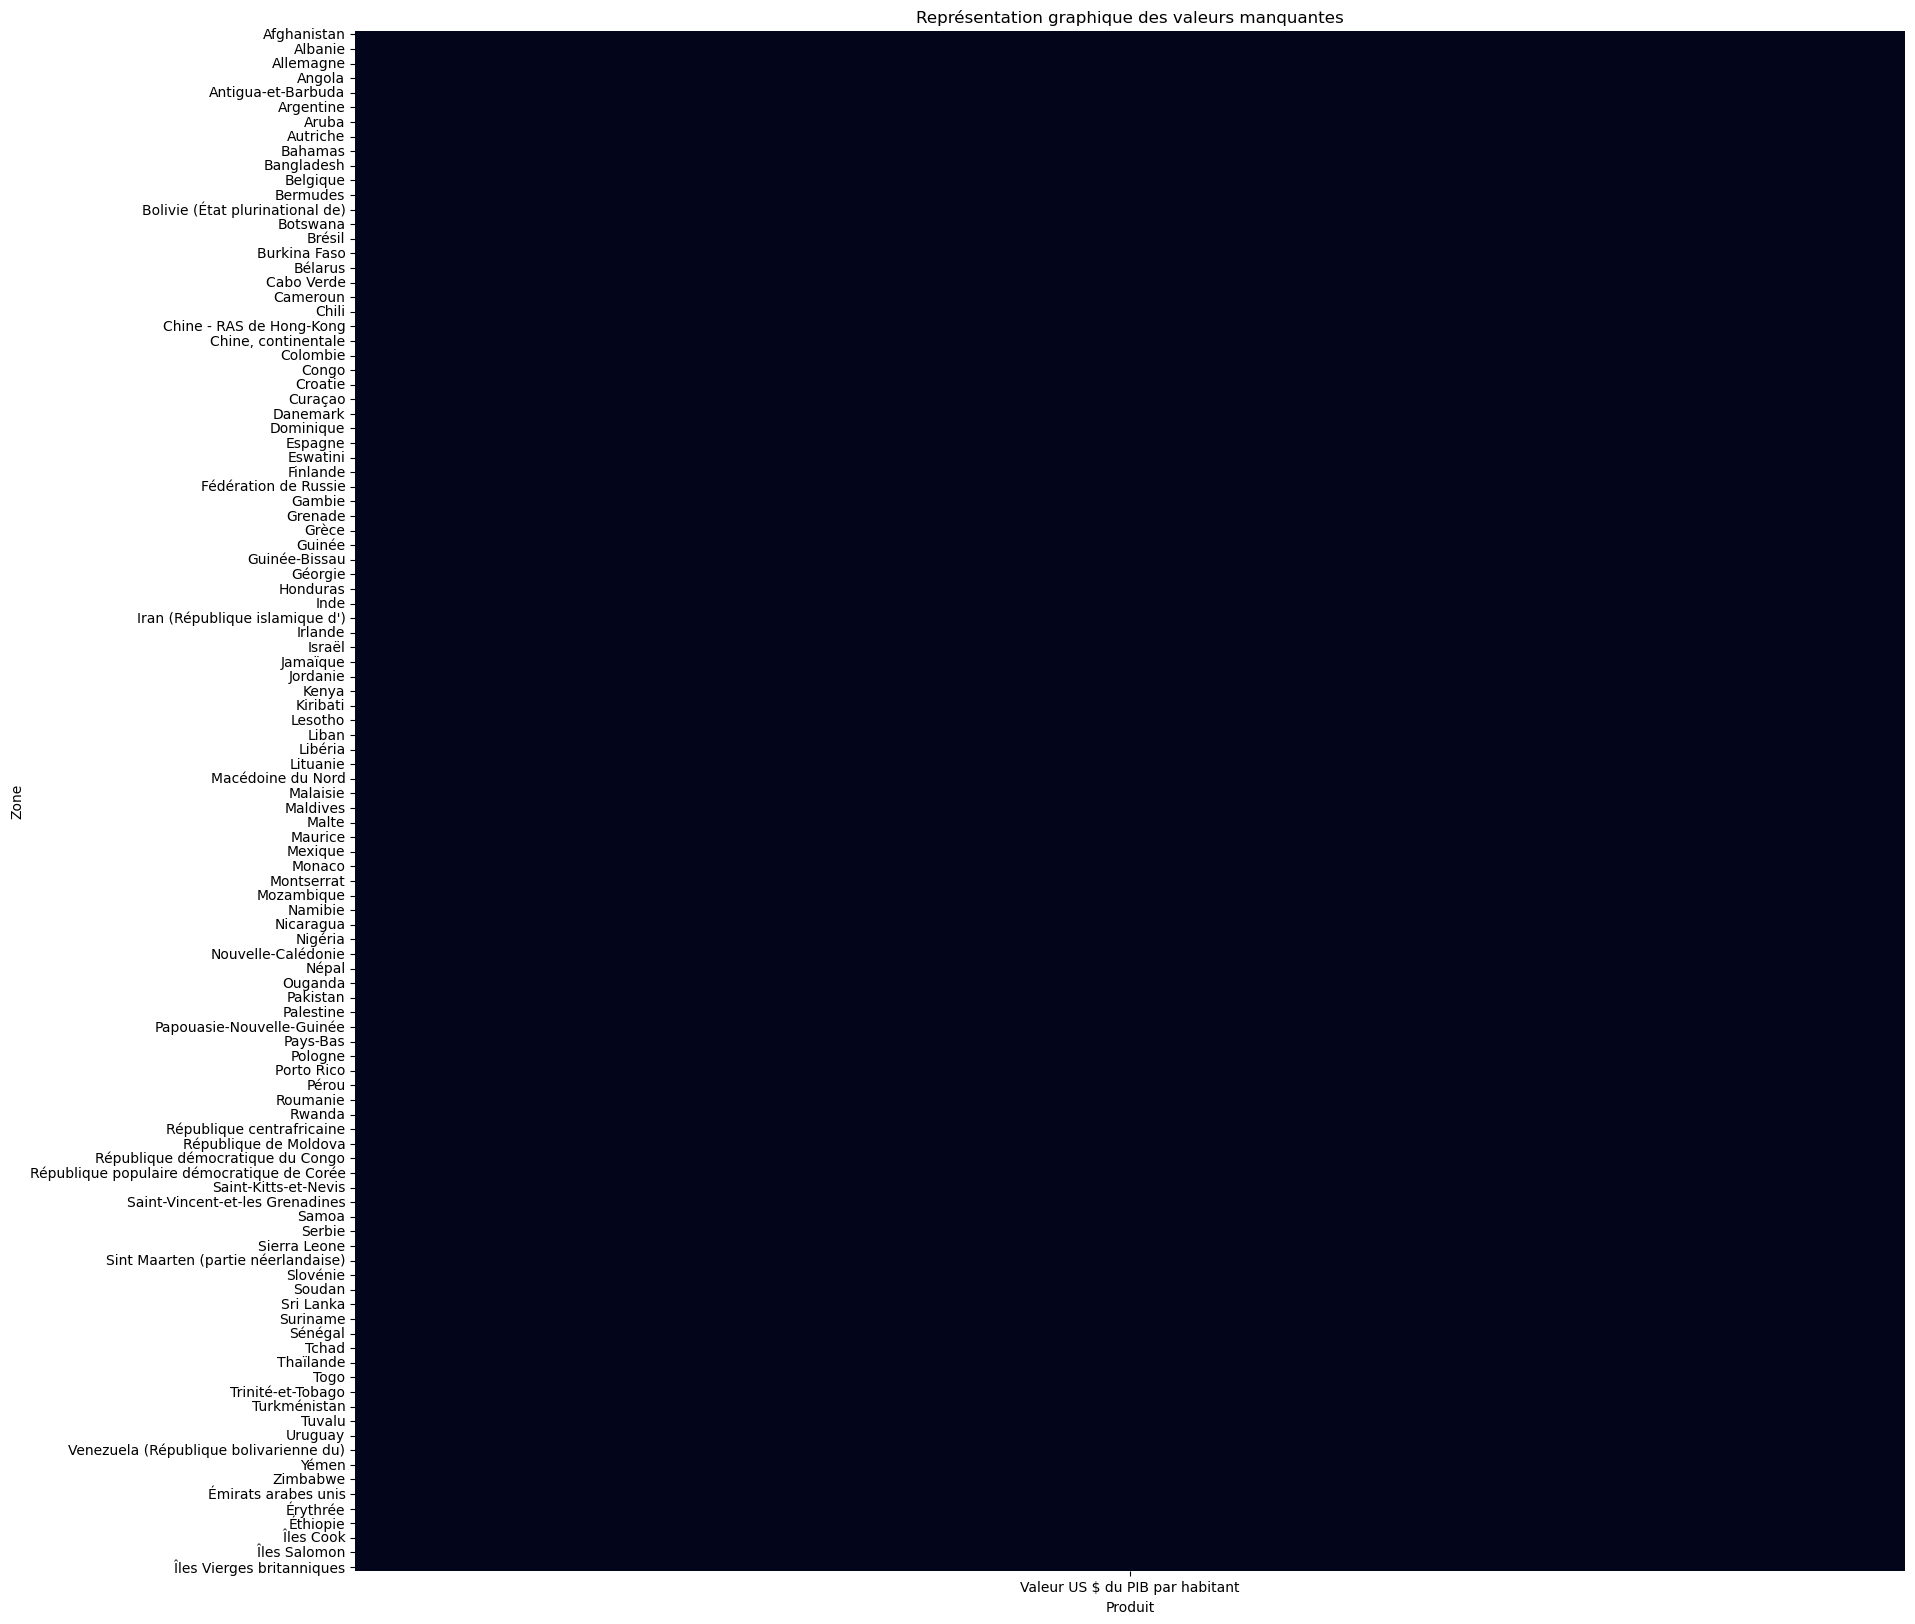

observations  variables      moyennes  \
Produit                                                                  
Valeur US $ du PIB par habitant           211          1  16934.384856   

                                    medianes   ecart_types         min  \
Produit                                                                  
Valeur US $ du PIB par habitant  6376.707362  25494.984628  111.048078   

                                           max  nb_valeurs_manquantes  \
Produit                                                                 
Valeur US $ du PIB par habitant  171278.066389                      0   

                                 %_valeurs_manquantes  
Produit                                                
Valeur US $ du PIB par habitant                   0.0

In [27]:
my_first_analyse(indic_macro2017)

In [28]:
indic_macro2017

Produit                    Valeur US $ du PIB par habitant
Zone                                                      
Afghanistan                                     520.616409
Afrique du Sud                                 6121.876572
Albanie                                        4514.204908
Algérie                                        4109.696001
Allemagne                                     44651.829102
...                                                    ...
Îles Cook                                     19741.188968
Îles Marshall                                  3669.806573
Îles Salomon                                   2332.873855
Îles Turques-et-Caïques                       27545.870942
Îles Vierges britanniques                     44181.965717

[211 rows x 1 columns]

In [29]:
indic_macro2017.reset_index()

Produit                       Zone  Valeur US $ du PIB par habitant
0                      Afghanistan                       520.616409
1                   Afrique du Sud                      6121.876572
2                          Albanie                      4514.204908
3                          Algérie                      4109.696001
4                        Allemagne                     44651.829102
..                             ...                              ...
206                      Îles Cook                     19741.188968
207                  Îles Marshall                      3669.806573
208                   Îles Salomon                      2332.873855
209        Îles Turques-et-Caïques                     27545.870942
210      Îles Vierges britanniques                     44181.965717

[211 rows x 2 columns]

## Table Vie Saine

In [30]:
vie_saine.head()

Code Domaine                                            Domaine  \
0         CAHD  Coût et abordabilité d’une alimentation saine\...   
1         CAHD  Coût et abordabilité d’une alimentation saine\...   
2         CAHD  Coût et abordabilité d’une alimentation saine\...   
3         CAHD  Coût et abordabilité d’une alimentation saine\...   
4         CAHD  Coût et abordabilité d’une alimentation saine\...   

   Code zone (M49)            Zone  Code Élément Élément  Code Produit  \
0              710  Afrique du Sud          6226  Valeur          7004   
1              710  Afrique du Sud          6226  Valeur          7004   
2              710  Afrique du Sud          6226  Valeur          7004   
3              710  Afrique du Sud          6226  Valeur          7004   
4              710  Afrique du Sud          6226  Valeur          7007   

                                             Produit  Code année  Année  \
0  Cost of a healthy diet (PPP dollar per person ...        2017   2017   
1  Cost of a healthy diet (PPP dollar per person ...        2018   2018   
2  Cost of a healthy diet (PPP dollar per person ...        2019   2019   
3  Cost of a healthy diet (PPP dollar per person ...        2020   2020   
4                            Cost of starchy staples        2017   2017   

                           Unité  Valeur Symbole Description du Symbole  
0  PPP dollar per person per day   4.102       E         Valeur estimée  
1  PPP dollar per person per day   4.146       E         Valeur estimée  
2  PPP dollar per person per day   4.198       E         Valeur estimée  
3  PPP dollar per person per day   4.298       E         Valeur estimée  
4  PPP dollar per person per day   0.633       E         Valeur estimée

In [31]:
vie_saine.shape

(3042, 14)

In [32]:
# On filtre sur l'année 2017
vie_saine_2017 = vie_saine.loc[vie_saine["Année"]==2017]
display(vie_saine_2017.head())
print(vie_saine.shape)

Code Domaine                                            Domaine  \
0         CAHD  Coût et abordabilité d’une alimentation saine\...   
4         CAHD  Coût et abordabilité d’une alimentation saine\...   
5         CAHD  Coût et abordabilité d’une alimentation saine\...   
6         CAHD  Coût et abordabilité d’une alimentation saine\...   
7         CAHD  Coût et abordabilité d’une alimentation saine\...   

   Code zone (M49)            Zone  Code Élément Élément  Code Produit  \
0              710  Afrique du Sud          6226  Valeur          7004   
4              710  Afrique du Sud          6226  Valeur          7007   
5              710  Afrique du Sud          6226  Valeur          7008   
6              710  Afrique du Sud          6226  Valeur          7009   
7              710  Afrique du Sud          6226  Valeur          7010   

                                             Produit  Code année  Année  \
0  Cost of a healthy diet (PPP dollar per person ...        2017   2017   
4                            Cost of starchy staples        2017   2017   
5                        Cost of animal source foods        2017   2017   
6                    Cost of legumes, nuts and seeds        2017   2017   
7                                 Cost of vegetables        2017   2017   

                           Unité  Valeur Symbole Description du Symbole  
0  PPP dollar per person per day   4.102       E         Valeur estimée  
4  PPP dollar per person per day   0.633       E         Valeur estimée  
5  PPP dollar per person per day   1.059       E         Valeur estimée  
6  PPP dollar per person per day   0.852       E         Valeur estimée  
7  PPP dollar per person per day   0.702       E         Valeur estimée

(3042, 14)


In [33]:
vie_saine_2017["Domaine"].unique()

array(['Coût et abordabilité d’une alimentation saine\r\n (CoAHD)'],
      dtype=object)

In [34]:
vie_saine_2017["Produit"].unique()

array(['Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats',
       'Percentage of the population unable to afford a healthy diet (percent)',
       'Number of people unable to afford a healthy diet (million)'],
      dtype=object)

In [35]:
vie_saine_2017["Unité"].unique()

array(['PPP dollar per person per day', '%', 'millions'], dtype=object)

In [36]:
# On selectionne les variables qui nous interessent
vie_saine_2017 = vie_saine_2017[["Zone","Produit","Unité","Valeur"]]
display(vie_saine_2017.head())
print(vie_saine_2017.shape)

Zone                                            Produit  \
0  Afrique du Sud  Cost of a healthy diet (PPP dollar per person ...   
4  Afrique du Sud                            Cost of starchy staples   
5  Afrique du Sud                        Cost of animal source foods   
6  Afrique du Sud                    Cost of legumes, nuts and seeds   
7  Afrique du Sud                                 Cost of vegetables   

                           Unité  Valeur  
0  PPP dollar per person per day   4.102  
4  PPP dollar per person per day   0.633  
5  PPP dollar per person per day   1.059  
6  PPP dollar per person per day   0.852  
7  PPP dollar per person per day   0.702

(1521, 4)


In [37]:
# On pivot notre table
vie_saine_2017 = vie_saine_2017.pivot(index="Zone", columns=["Produit"], values="Valeur")
vie_saine_2017.head()

Produit         Cost of a healthy diet (PPP dollar per person per day)  \
Zone                                                                     
Afrique du Sud                                              4.102        
Albanie                                                     3.952        
Algérie                                                     3.763        
Allemagne                                                   2.786        
Angola                                                      4.327        

Produit         Cost of animal source foods  Cost of fruits  \
Zone                                                          
Afrique du Sud                        1.059           0.727   
Albanie                               1.204           0.911   
Algérie                               0.964           0.979   
Allemagne                             0.666           0.714   
Angola                                1.011           0.717   

Produit         Cost of legumes, nuts and seeds  Cost of oils and fats  \
Zone                                                                     
Afrique du Sud                            0.852                  0.129   
Albanie                                   0.441                  0.089   
Algérie                                   0.493                  0.132   
Allemagne                                 0.301                  0.052   
Angola                                    0.395                  0.166   

Produit         Cost of starchy staples  Cost of vegetables  \
Zone                                                          
Afrique du Sud                    0.633               0.702   
Albanie                           0.599               0.707   
Algérie                           0.496               0.699   
Allemagne                         0.235               0.816   
Angola                            0.839               1.199   

Produit         Number of people unable to afford a healthy diet (million)  \
Zone                                                                         
Afrique du Sud                                               37.2            
Albanie                                                       1.1            
Algérie                                                      14.6            
Allemagne                                                     0.2            
Angola                                                       27.7            

Produit         Percentage of the population unable to afford a healthy diet (percent)  
Zone                                                                                    
Afrique du Sud                                               65.2                       
Albanie                                                      37.8                       
Algérie                                                      35.2                       
Allemagne                                                     0.2                       
Angola                                                       92.9

In [38]:
# On supprime les colonnes qui ne nous interessent pas
vie_saine_2017 = vie_saine_2017.drop(["Cost of fruits","Cost of legumes, nuts and seeds","Cost of oils and fats","Cost of starchy staples","Cost of vegetables","Number of people unable to afford a healthy diet (million)","Percentage of the population unable to afford a healthy diet (percent)"], axis=1)

In [39]:
vie_saine_2017.rename(columns={
    "Cost of a healthy diet (PPP dollar per person per day)":"Coût d'une alimentation équilibré (PPP dollar par personne par jour)",
    "Cost of animal source foods" : "Coût des aliments d'origine animale"
}, inplace=True)

In [40]:
vie_saine_2017

Produit                    Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                              
Afrique du Sud                                                         4.102                      
Albanie                                                                3.952                      
Algérie                                                                3.763                      
Allemagne                                                              2.786                      
Angola                                                                 4.327                      
...                                                                      ...                      
États-Unis d'Amérique                                                  3.225                      
Éthiopie                                                               3.108                      
Îles Caïmanes                                                          2.928                      
Îles Turques-et-Caïques                                                2.809                      
Îles Vierges britanniques                                              3.235                      

Produit                    Coût des aliments d'origine animale  
Zone                                                            
Afrique du Sud                                           1.059  
Albanie                                                  1.204  
Algérie                                                  0.964  
Allemagne                                                0.666  
Angola                                                   1.011  
...                                                        ...  
États-Unis d'Amérique                                    0.557  
Éthiopie                                                 0.882  
Îles Caïmanes                                            0.585  
Îles Turques-et-Caïques                                  0.645  
Îles Vierges britanniques                                0.828  

[169 rows x 2 columns]

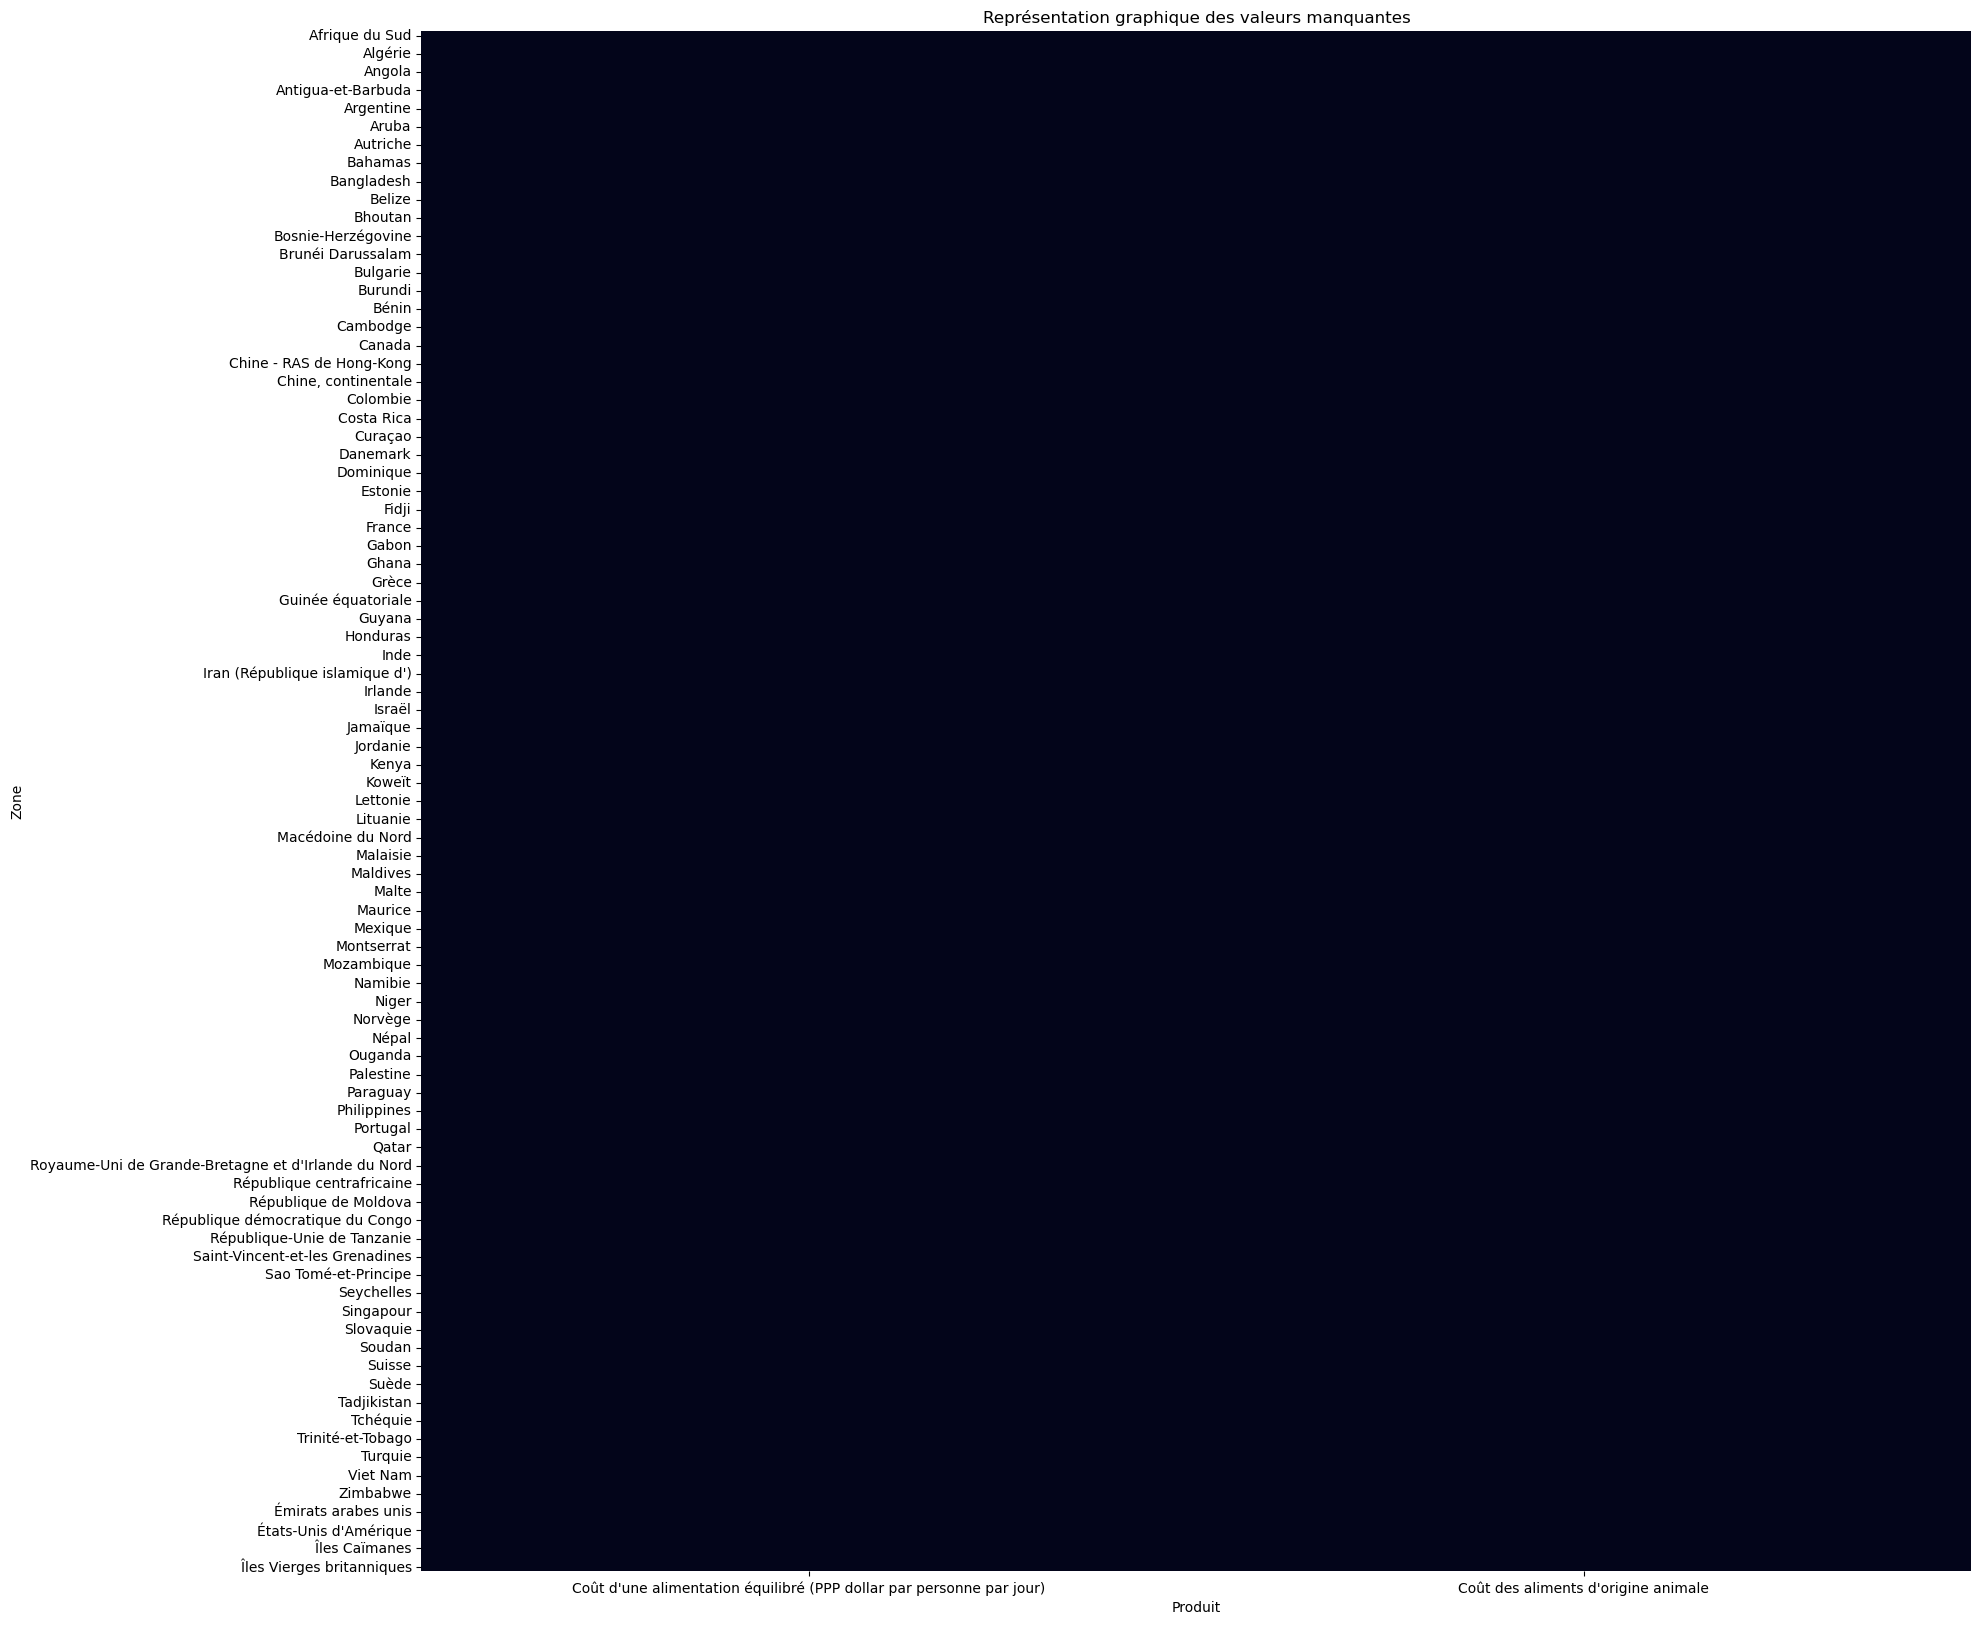

observations  variables  \
Produit                                                                       
Coût d'une alimentation équilibré (PPP dollar p...           169          2   
Coût des aliments d'origine animale                          169          2   

                                                    moyennes  medianes  \
Produit                                                                  
Coût d'une alimentation équilibré (PPP dollar p...  3.313834     3.235   
Coût des aliments d'origine animale                 0.873213     0.848   

                                                    ecart_types    min    max  \
Produit                                                                         
Coût d'une alimentation équilibré (PPP dollar p...     0.656710  1.822  5.975   
Coût des aliments d'origine animale                    0.214233  0.377  1.583   

                                                    nb_valeurs_manquantes  \
Produit                                                                     
Coût d'une alimentation équilibré (PPP dollar p...                      0   
Coût des aliments d'origine animale                                     0   

                                                    %_valeurs_manquantes  
Produit                                                                   
Coût d'une alimentation équilibré (PPP dollar p...                   0.0  
Coût des aliments d'origine animale                                  0.0

In [41]:
my_first_analyse(vie_saine_2017)

## Table Série Temporelle

In [42]:
series_temp

Code Domaine                       Domaine  Code zone (M49)         Zone  \
0              OA  Séries temporelles annuelles                4  Afghanistan   
1              OA  Séries temporelles annuelles                4  Afghanistan   
2              OA  Séries temporelles annuelles                4  Afghanistan   
3              OA  Séries temporelles annuelles                4  Afghanistan   
4              OA  Séries temporelles annuelles                4  Afghanistan   
...           ...                           ...              ...          ...   
1168           OA  Séries temporelles annuelles              716     Zimbabwe   
1169           OA  Séries temporelles annuelles              716     Zimbabwe   
1170           OA  Séries temporelles annuelles              716     Zimbabwe   
1171           OA  Séries temporelles annuelles              716     Zimbabwe   
1172           OA  Séries temporelles annuelles              716     Zimbabwe   

      Code Élément             Élément  Code Produit                 Produit  \
0              511   Population totale          3010  Population-Estimations   
1              512              Hommes          3010  Population-Estimations   
2              513              Femmes          3010  Population-Estimations   
3              551   Population rurale          3010  Population-Estimations   
4              561  Population urbaine          3010  Population-Estimations   
...            ...                 ...           ...                     ...   
1168           511   Population totale          3010  Population-Estimations   
1169           512              Hommes          3010  Population-Estimations   
1170           513              Femmes          3010  Population-Estimations   
1171           551   Population rurale          3010  Population-Estimations   
1172           561  Population urbaine          3010  Population-Estimations   

      Code année  Année           Unité     Valeur Symbole  \
0           2017   2017  1000 personnes  35643.418       X   
1           2017   2017  1000 personnes  18028.696       X   
2           2017   2017  1000 personnes  17614.722       X   
3           2017   2017  1000 personnes  26558.609       X   
4           2017   2017  1000 personnes   8971.472       X   
...          ...    ...             ...        ...     ...   
1168        2017   2017  1000 personnes  14751.101       X   
1169        2017   2017  1000 personnes   6940.631       X   
1170        2017   2017  1000 personnes   7810.471       X   
1171        2017   2017  1000 personnes  11201.138       X   
1172        2017   2017  1000 personnes   5328.766       X   

                 Description du Symbole  Note  
0     Ciffre de sources internationales   NaN  
1     Ciffre de sources internationales   NaN  
2     Ciffre de sources internationales   NaN  
3     Ciffre de sources internationales   NaN  
4     Ciffre de sources internationales   NaN  
...                                 ...   ...  
1168  Ciffre de sources internationales   NaN  
1169  Ciffre de sources internationales   NaN  
1170  Ciffre de sources internationales   NaN  
1171  Ciffre de sources internationales   NaN  
1172  Ciffre de sources internationales   NaN  

[1173 rows x 15 columns]

In [43]:
series_temp = series_temp.pivot(index="Zone", columns="Élément", values="Valeur")

In [44]:
series_temp = series_temp.drop(["Femmes","Hommes","Population rurale"], axis=1)

In [45]:
series_temp

Élément                    Population totale  Population urbaine
Zone                                                            
Afghanistan                        35643.418            8971.472
Afrique du Sud                     56641.209           37348.154
Albanie                             2879.355            1740.032
Algérie                            41136.546           29770.610
Allemagne                          82624.374           63442.124
...                                      ...                 ...
Îles Salomon                         643.634             142.360
Îles Turques-et-Caïques               39.844              32.900
Îles Vierges américaines             101.851             100.289
Îles Vierges britanniques             30.060              14.767
Îles Wallis-et-Futuna                 11.936               0.000

[236 rows x 2 columns]

## Elevage poulet

In [46]:
display(elevage_poulet.head())
print(elevage_poulet.shape)

Code Domaine                   Domaine  Code zone (M49)         Zone  \
0           EK  Tendances dans l’élevage                4  Afghanistan   
1           EK  Tendances dans l’élevage                4  Afghanistan   
2           EK  Tendances dans l’élevage                4  Afghanistan   
3           EK  Tendances dans l’élevage                4  Afghanistan   
4           EK  Tendances dans l’élevage                4  Afghanistan   

   Code Élément                                          Élément  \
0          7213  Densité des animaux dans la superficie agricole   
1          7213  Densité des animaux dans la superficie agricole   
2          7213  Densité des animaux dans la superficie agricole   
3          7213  Densité des animaux dans la superficie agricole   
4          7213  Densité des animaux dans la superficie agricole   

   Code Produit (CPC)  Produit  Code année  Année   Unité  Valeur Symbole  \
0                2151  Poulets        2014   2014  UGB/ha     0.0       E   
1                2151  Poulets        2015   2015  UGB/ha     0.0       E   
2                2151  Poulets        2016   2016  UGB/ha     0.0       E   
3                2151  Poulets        2017   2017  UGB/ha     0.0       E   
4                2151  Poulets        2018   2018  UGB/ha     0.0       E   

  Description du Symbole  
0         Valeur estimée  
1         Valeur estimée  
2         Valeur estimée  
3         Valeur estimée  
4         Valeur estimée

(2653, 14)


In [47]:
elevage_poulet_2017 = elevage_poulet.loc[(elevage_poulet["Année"]==2017)&(elevage_poulet["Élément"]=="Part du total des animaux")]
display(elevage_poulet_2017.head())
print(elevage_poulet_2017.shape)

Code Domaine                   Domaine  Code zone (M49)            Zone  \
10           EK  Tendances dans l’élevage                4     Afghanistan   
24           EK  Tendances dans l’élevage              710  Afrique du Sud   
38           EK  Tendances dans l’élevage                8         Albanie   
52           EK  Tendances dans l’élevage               12         Algérie   
63           EK  Tendances dans l’élevage              276       Allemagne   

    Code Élément                    Élément  Code Produit (CPC)  Produit  \
10          7211  Part du total des animaux                2151  Poulets   
24          7211  Part du total des animaux                2151  Poulets   
38          7211  Part du total des animaux                2151  Poulets   
52          7211  Part du total des animaux                2151  Poulets   
63          7211  Part du total des animaux                2151  Poulets   

    Code année  Année               Unité  Valeur Symbole  \
10        2017   2017  % du total des UGB    2.04       E   
24        2017   2017  % du total des UGB   12.53       E   
38        2017   2017  % du total des UGB   10.54       E   
52        2017   2017  % du total des UGB   21.35       E   
63        2017   2017  % du total des UGB    7.99       E   

   Description du Symbole  
10         Valeur estimée  
24         Valeur estimée  
38         Valeur estimée  
52         Valeur estimée  
63         Valeur estimée

(195, 14)


In [48]:
elevage_poulet_2017 = elevage_poulet_2017.pivot(index="Zone", columns=["Élément","Unité"], values="Valeur")

In [49]:
elevage_poulet_2017 = elevage_poulet_2017.droplevel(["Unité"], axis=1)

In [50]:
elevage_poulet_2017.rename(columns={
    "Part du total des animaux":"Part de l'élevage de poulet (%)"
}, inplace=True)

In [51]:
elevage_poulet_2017

Élément         Part de l'élevage de poulet (%)
Zone                                           
Afghanistan                                2.04
Afrique du Sud                            12.53
Albanie                                   10.54
Algérie                                   21.35
Allemagne                                  7.99
...                                         ...
Équateur                                  31.67
Érythrée                                   0.72
Éthiopie                                   1.33
Îles Cook                                  2.88
Îles Salomon                              10.74

[195 rows x 1 columns]

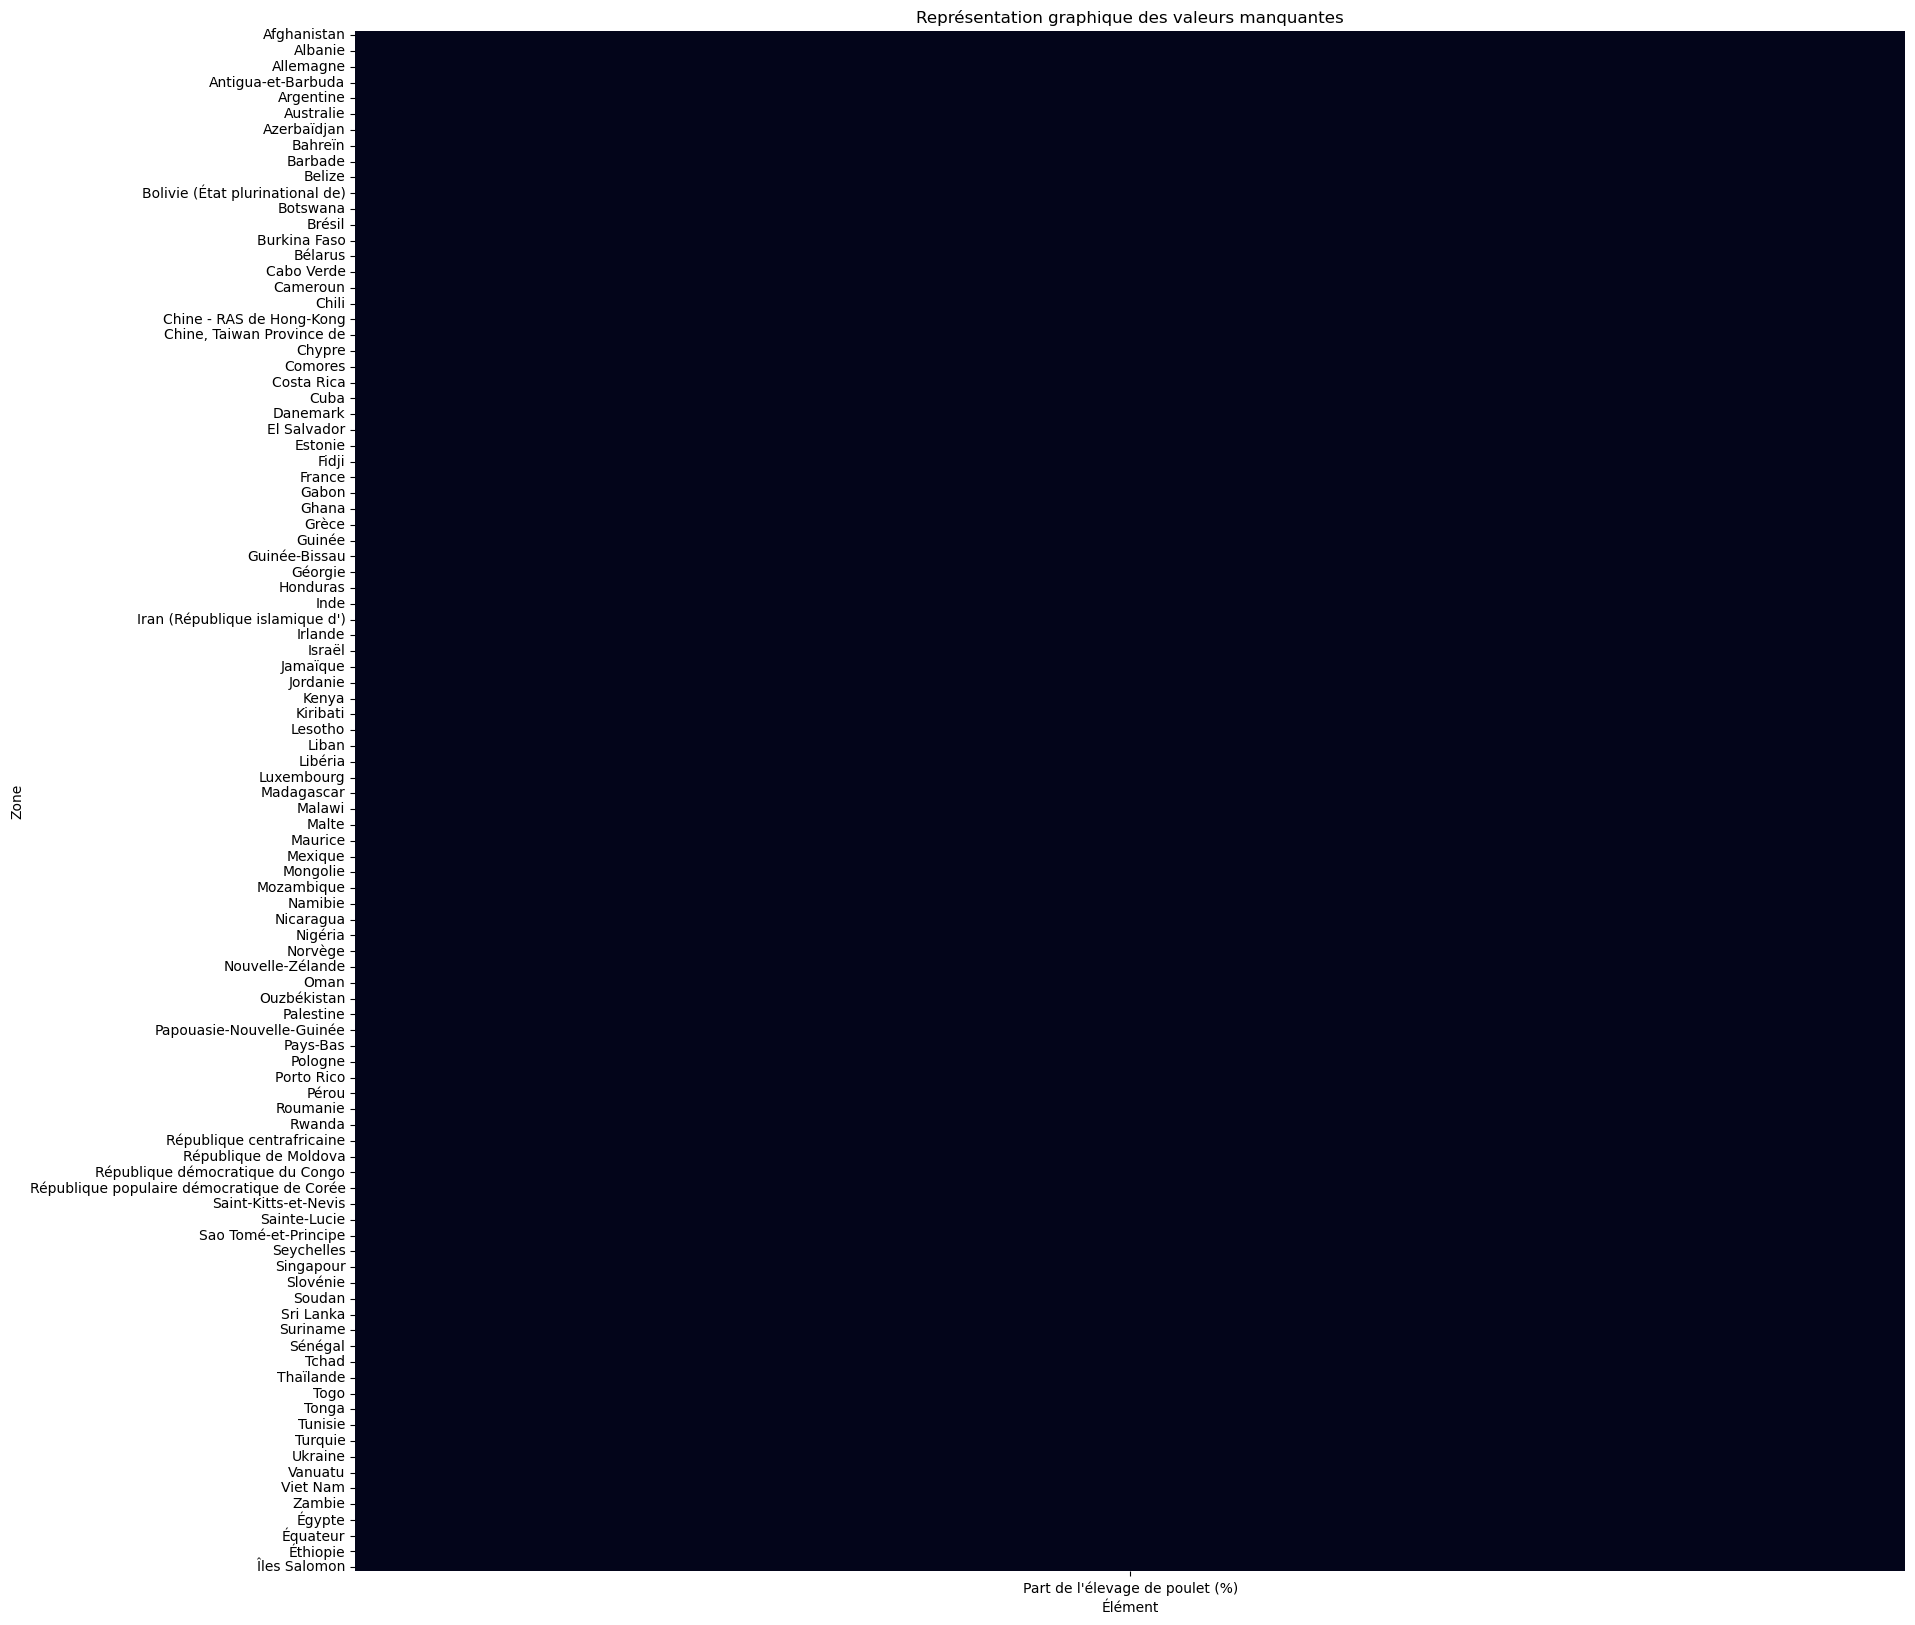

observations  variables   moyennes  medianes  \
Élément                                                                         
Part de l'élevage de poulet (%)           195          1  19.458615     12.26   

                                 ecart_types   min    max  \
Élément                                                     
Part de l'élevage de poulet (%)    21.739646  0.06  100.0   

                                 nb_valeurs_manquantes  %_valeurs_manquantes  
Élément                                                                       
Part de l'élevage de poulet (%)                      0                   0.0

In [52]:
my_first_analyse(elevage_poulet_2017)

## Stabilité Politique

In [53]:
display(stabilité_politique.head())
print(stabilité_politique.shape)

Unnamed: 0  Year  Political_Stability Granularity Unnamed: 4
0  Afghanistan  2000                -2.44       Total        NaN
1  Afghanistan  2002                -2.04       Total        NaN
2  Afghanistan  2003                -2.20       Total        NaN
3  Afghanistan  2004                -2.30       Total        NaN
4  Afghanistan  2005                -2.07       Total        NaN

(3150, 5)


In [54]:
stabilité_politique_2017 = stabilité_politique.loc[stabilité_politique["Year"]=="2017"]
stabilité_politique_2017 = stabilité_politique_2017.drop(["Granularity","Unnamed: 4","Year"], axis=1)

In [55]:
display(stabilité_politique_2017.head())
print(stabilité_politique_2017.shape)

Unnamed: 0  Political_Stability
16        Afghanistan                -2.80
34            Albanie                 0.38
52            Algérie                -0.92
67  Samoa américaines                 1.22
85            Andorre                 1.42

(173, 2)


In [56]:
stabilité_politique_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 16 to 3148
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           173 non-null    object 
 1   Political_Stability  173 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [57]:
stabilité_politique_2017.rename(columns={
    "Unnamed: 0":"Zone"
}, inplace=True)

In [58]:
stabilité_politique_2017 = stabilité_politique_2017.set_index("Zone")

## Distance France-Monde

In [59]:
distance_fr_monde

ISO3   distance_km
0    ABW   7677.486897
1    AFG   5594.223377
2    AGO   6478.953877
3    AIA   6710.883702
4    ALB   1603.944535
..   ...           ...
230  WSM  16083.468550
231  YEM   5311.607947
232  ZAF   9306.638530
233  ZMB   7565.182929
234  ZWE   7914.128381

[235 rows x 2 columns]

In [60]:
distance_fr_monde.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ISO3         235 non-null    object 
 1   distance_km  235 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.8+ KB


## Jointure

In [61]:
df = df.merge(indic_macro2017, how="left", on="Zone").reset_index()
df

Zone ISO3  \
0              Afghanistan  AFG   
1           Afrique du Sud  ZAF   
2                  Albanie  ALB   
3                  Algérie  DZA   
4                Allemagne  DEU   
..                     ...  ...   
165    Émirats arabes unis  ARE   
166               Équateur  ECU   
167  États-Unis d'Amérique  USA   
168               Éthiopie  ETH   
169           Îles Salomon  SLB   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
165                                              14.80          
166                                               6.15          
167                                              19.93          
168                                               0.04          
169                                               1.51          

     Disponibilité intérieure Exportations - Quantité  \
0                        57.0                       0   
1                      2118.0                    63.0   
2                        47.0                     0.0   
3                       277.0                     0.0   
4                      1739.0                   646.0   
..                        ...                     ...   
165                     412.0                    94.0   
166                     341.0                     0.0   
167                   18266.0                  3692.0   
168                      14.0                       0   
169                       3.0                     0.0   

     Importations - Quantité  Nourriture Pertes Production  \
0                       29.0        55.0    2.0       28.0   
1                      514.0      2035.0   83.0     1667.0   
2                       38.0        47.0      0       13.0   
3                        2.0       264.0   13.0      275.0   
4                      842.0      1609.0      0     1514.0   
..                       ...         ...    ...        ...   
165                    433.0       412.0      0       48.0   
166                      0.0       324.0   17.0      340.0   
167                    123.0     18100.0      0    21914.0   
168                      1.0        14.0    1.0       14.0   
169                      6.0         3.0      0        0.0   

     Valeur US $ du PIB par habitant  
0                         520.616409  
1                        6121.876572  
2                        4514.204908  
3                        4109.696001  
4                       44651.829102  
..                               ...  
165                     40644.804043  
166                      6213.501276  
167                     59921.674703  
168                       721.753494  
169                      2332.873855  

[170 rows x 10 columns]

In [62]:
df = df.merge(vie_saine_2017, how="left", on="Zone")
df

Zone ISO3  \
0              Afghanistan  AFG   
1           Afrique du Sud  ZAF   
2                  Albanie  ALB   
3                  Algérie  DZA   
4                Allemagne  DEU   
..                     ...  ...   
165    Émirats arabes unis  ARE   
166               Équateur  ECU   
167  États-Unis d'Amérique  USA   
168               Éthiopie  ETH   
169           Îles Salomon  SLB   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
165                                              14.80          
166                                               6.15          
167                                              19.93          
168                                               0.04          
169                                               1.51          

     Disponibilité intérieure Exportations - Quantité  \
0                        57.0                       0   
1                      2118.0                    63.0   
2                        47.0                     0.0   
3                       277.0                     0.0   
4                      1739.0                   646.0   
..                        ...                     ...   
165                     412.0                    94.0   
166                     341.0                     0.0   
167                   18266.0                  3692.0   
168                      14.0                       0   
169                       3.0                     0.0   

     Importations - Quantité  Nourriture Pertes Production  \
0                       29.0        55.0    2.0       28.0   
1                      514.0      2035.0   83.0     1667.0   
2                       38.0        47.0      0       13.0   
3                        2.0       264.0   13.0      275.0   
4                      842.0      1609.0      0     1514.0   
..                       ...         ...    ...        ...   
165                    433.0       412.0      0       48.0   
166                      0.0       324.0   17.0      340.0   
167                    123.0     18100.0      0    21914.0   
168                      1.0        14.0    1.0       14.0   
169                      6.0         3.0      0        0.0   

     Valeur US $ du PIB par habitant  \
0                         520.616409   
1                        6121.876572   
2                        4514.204908   
3                        4109.696001   
4                       44651.829102   
..                               ...   
165                     40644.804043   
166                      6213.501276   
167                     59921.674703   
168                       721.753494   
169                      2332.873855   

     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                  NaN                      
1                                                4.102                      
2                                                3.952                      
3                                                3.763                      
4                                                2.786                      
..                                                 ...                      
165                                              2.755                      
166                                              2.788                      
167                                              3.225                      
168                                              3.108                      
169                                                NaN        

In [63]:
df = df.merge(series_temp, how="left", on="Zone")
df

Zone ISO3  \
0              Afghanistan  AFG   
1           Afrique du Sud  ZAF   
2                  Albanie  ALB   
3                  Algérie  DZA   
4                Allemagne  DEU   
..                     ...  ...   
165    Émirats arabes unis  ARE   
166               Équateur  ECU   
167  États-Unis d'Amérique  USA   
168               Éthiopie  ETH   
169           Îles Salomon  SLB   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
165                                              14.80          
166                                               6.15          
167                                              19.93          
168                                               0.04          
169                                               1.51          

     Disponibilité intérieure Exportations - Quantité  \
0                        57.0                       0   
1                      2118.0                    63.0   
2                        47.0                     0.0   
3                       277.0                     0.0   
4                      1739.0                   646.0   
..                        ...                     ...   
165                     412.0                    94.0   
166                     341.0                     0.0   
167                   18266.0                  3692.0   
168                      14.0                       0   
169                       3.0                     0.0   

     Importations - Quantité  Nourriture Pertes Production  \
0                       29.0        55.0    2.0       28.0   
1                      514.0      2035.0   83.0     1667.0   
2                       38.0        47.0      0       13.0   
3                        2.0       264.0   13.0      275.0   
4                      842.0      1609.0      0     1514.0   
..                       ...         ...    ...        ...   
165                    433.0       412.0      0       48.0   
166                      0.0       324.0   17.0      340.0   
167                    123.0     18100.0      0    21914.0   
168                      1.0        14.0    1.0       14.0   
169                      6.0         3.0      0        0.0   

     Valeur US $ du PIB par habitant  \
0                         520.616409   
1                        6121.876572   
2                        4514.204908   
3                        4109.696001   
4                       44651.829102   
..                               ...   
165                     40644.804043   
166                      6213.501276   
167                     59921.674703   
168                       721.753494   
169                      2332.873855   

     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                  NaN                      
1                                                4.102                      
2                                                3.952                      
3                                                3.763                      
4                                                2.786                      
..                                                 ...                      
165                                              2.755                      
166                                              2.788                      
167                                              3.225                      
168                                              3.108                      
169                                                NaN        

In [64]:
df = df.merge(elevage_poulet_2017, how="left", on="Zone")
df

Zone ISO3  \
0              Afghanistan  AFG   
1           Afrique du Sud  ZAF   
2                  Albanie  ALB   
3                  Algérie  DZA   
4                Allemagne  DEU   
..                     ...  ...   
165    Émirats arabes unis  ARE   
166               Équateur  ECU   
167  États-Unis d'Amérique  USA   
168               Éthiopie  ETH   
169           Îles Salomon  SLB   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
165                                              14.80          
166                                               6.15          
167                                              19.93          
168                                               0.04          
169                                               1.51          

     Disponibilité intérieure Exportations - Quantité  \
0                        57.0                       0   
1                      2118.0                    63.0   
2                        47.0                     0.0   
3                       277.0                     0.0   
4                      1739.0                   646.0   
..                        ...                     ...   
165                     412.0                    94.0   
166                     341.0                     0.0   
167                   18266.0                  3692.0   
168                      14.0                       0   
169                       3.0                     0.0   

     Importations - Quantité  Nourriture Pertes Production  \
0                       29.0        55.0    2.0       28.0   
1                      514.0      2035.0   83.0     1667.0   
2                       38.0        47.0      0       13.0   
3                        2.0       264.0   13.0      275.0   
4                      842.0      1609.0      0     1514.0   
..                       ...         ...    ...        ...   
165                    433.0       412.0      0       48.0   
166                      0.0       324.0   17.0      340.0   
167                    123.0     18100.0      0    21914.0   
168                      1.0        14.0    1.0       14.0   
169                      6.0         3.0      0        0.0   

     Valeur US $ du PIB par habitant  \
0                         520.616409   
1                        6121.876572   
2                        4514.204908   
3                        4109.696001   
4                       44651.829102   
..                               ...   
165                     40644.804043   
166                      6213.501276   
167                     59921.674703   
168                       721.753494   
169                      2332.873855   

     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                  NaN                      
1                                                4.102                      
2                                                3.952                      
3                                                3.763                      
4                                                2.786                      
..                                                 ...                      
165                                              2.755                      
166                                              2.788                      
167                                              3.225                      
168                                              3.108                      
169                                                NaN        

In [65]:
df = df.merge(stabilité_politique_2017, how="left", on="Zone")
df

Zone ISO3  \
0              Afghanistan  AFG   
1           Afrique du Sud  ZAF   
2                  Albanie  ALB   
3                  Algérie  DZA   
4                Allemagne  DEU   
..                     ...  ...   
165    Émirats arabes unis  ARE   
166               Équateur  ECU   
167  États-Unis d'Amérique  USA   
168               Éthiopie  ETH   
169           Îles Salomon  SLB   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
165                                              14.80          
166                                               6.15          
167                                              19.93          
168                                               0.04          
169                                               1.51          

     Disponibilité intérieure Exportations - Quantité  \
0                        57.0                       0   
1                      2118.0                    63.0   
2                        47.0                     0.0   
3                       277.0                     0.0   
4                      1739.0                   646.0   
..                        ...                     ...   
165                     412.0                    94.0   
166                     341.0                     0.0   
167                   18266.0                  3692.0   
168                      14.0                       0   
169                       3.0                     0.0   

     Importations - Quantité  Nourriture Pertes Production  \
0                       29.0        55.0    2.0       28.0   
1                      514.0      2035.0   83.0     1667.0   
2                       38.0        47.0      0       13.0   
3                        2.0       264.0   13.0      275.0   
4                      842.0      1609.0      0     1514.0   
..                       ...         ...    ...        ...   
165                    433.0       412.0      0       48.0   
166                      0.0       324.0   17.0      340.0   
167                    123.0     18100.0      0    21914.0   
168                      1.0        14.0    1.0       14.0   
169                      6.0         3.0      0        0.0   

     Valeur US $ du PIB par habitant  \
0                         520.616409   
1                        6121.876572   
2                        4514.204908   
3                        4109.696001   
4                       44651.829102   
..                               ...   
165                     40644.804043   
166                      6213.501276   
167                     59921.674703   
168                       721.753494   
169                      2332.873855   

     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                  NaN                      
1                                                4.102                      
2                                                3.952                      
3                                                3.763                      
4                                                2.786                      
..                                                 ...                      
165                                              2.755                      
166                                              2.788                      
167                                              3.225                      
168                                              3.108                      
169                                                NaN        

In [66]:
df = df.merge(distance_fr_monde, on="ISO3")
df

Zone ISO3  \
0              Afghanistan  AFG   
1           Afrique du Sud  ZAF   
2                  Albanie  ALB   
3                  Algérie  DZA   
4                Allemagne  DEU   
..                     ...  ...   
163    Émirats arabes unis  ARE   
164               Équateur  ECU   
165  États-Unis d'Amérique  USA   
166               Éthiopie  ETH   
167           Îles Salomon  SLB   

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                 0.54          
1                                                14.11          
2                                                 6.26          
3                                                 1.97          
4                                                 7.96          
..                                                 ...          
163                                              14.80          
164                                               6.15          
165                                              19.93          
166                                               0.04          
167                                               1.51          

     Disponibilité intérieure Exportations - Quantité  \
0                        57.0                       0   
1                      2118.0                    63.0   
2                        47.0                     0.0   
3                       277.0                     0.0   
4                      1739.0                   646.0   
..                        ...                     ...   
163                     412.0                    94.0   
164                     341.0                     0.0   
165                   18266.0                  3692.0   
166                      14.0                       0   
167                       3.0                     0.0   

     Importations - Quantité  Nourriture Pertes Production  \
0                       29.0        55.0    2.0       28.0   
1                      514.0      2035.0   83.0     1667.0   
2                       38.0        47.0      0       13.0   
3                        2.0       264.0   13.0      275.0   
4                      842.0      1609.0      0     1514.0   
..                       ...         ...    ...        ...   
163                    433.0       412.0      0       48.0   
164                      0.0       324.0   17.0      340.0   
165                    123.0     18100.0      0    21914.0   
166                      1.0        14.0    1.0       14.0   
167                      6.0         3.0      0        0.0   

     Valeur US $ du PIB par habitant  \
0                         520.616409   
1                        6121.876572   
2                        4514.204908   
3                        4109.696001   
4                       44651.829102   
..                               ...   
163                     40644.804043   
164                      6213.501276   
165                     59921.674703   
166                       721.753494   
167                      2332.873855   

     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
0                                                  NaN                      
1                                                4.102                      
2                                                3.952                      
3                                                3.763                      
4                                                2.786                      
..                                                 ...                      
163                                              2.755                      
164                                              2.788                      
165                                              3.225                      
166                                              3.108                      
167                                                NaN        

In [67]:
df = df.drop("ISO3", axis=1)

In [68]:
df = df.set_index("Zone")

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mini = data.min()
/var/folders/hy/g05wz4ln30z1r5z3mv1rw

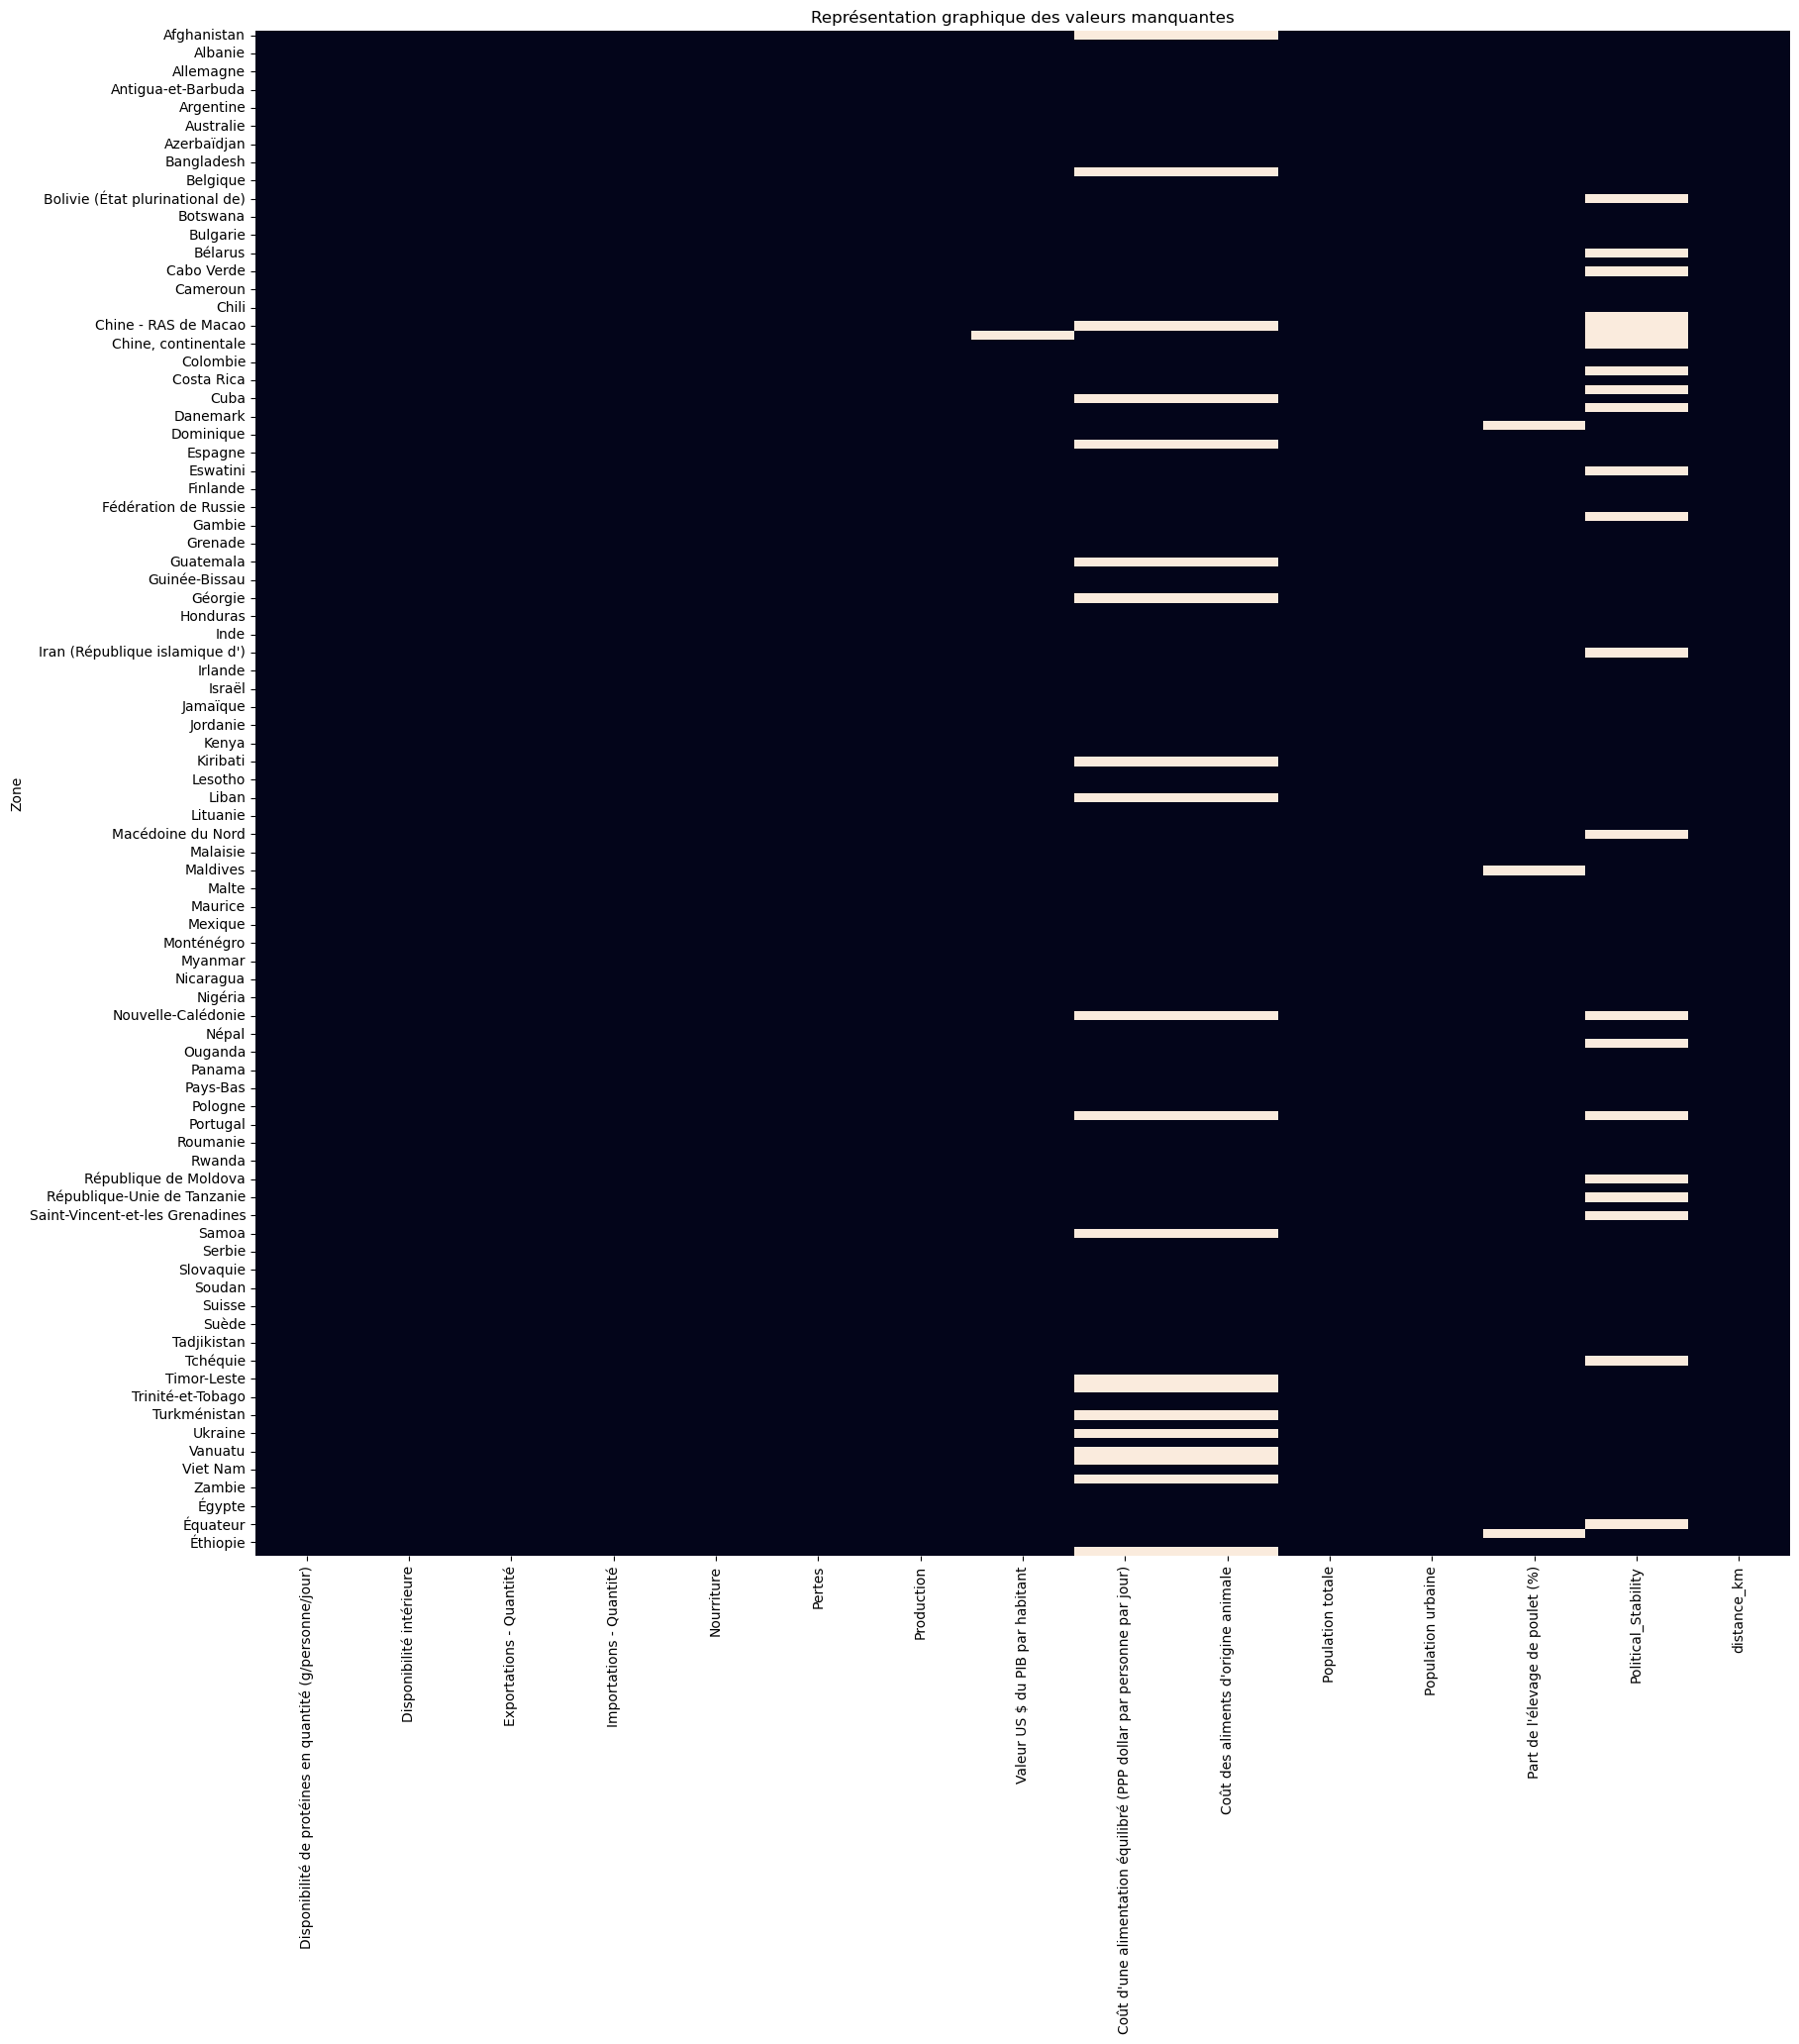

observations  variables  \
Coût d'une alimentation équilibré (PPP dollar p...           168         15   
Coût des aliments d'origine animale                          168         15   
Disponibilité de protéines en quantité (g/perso...           168         15   
Disponibilité intérieure                                     168         15   
Exportations - Quantité                                      168         15   
Importations - Quantité                                      168         15   
Nourriture                                                   168         15   
Part de l'élevage de poulet (%)                              168         15   
Pertes                                                       168         15   
Political_Stability                                          168         15   
Population totale                                            168         15   
Population urbaine                                           168         15   
Production                                                   168         15   
Valeur US $ du PIB par habitant                              168         15   
distance_km                                                  168         15   

                                                        moyennes     medianes  \
Coût d'une alimentation équilibré (PPP dollar p...      3.279291     3.184000   
Coût des aliments d'origine animale                     0.872101     0.850500   
Disponibilité de protéines en quantité (g/perso...      7.228988     6.680000   
Disponibilité intérieure                              690.440476   100.000000   
Exportations - Quantité                                      NaN     0.000000   
Importations - Quantité                                89.779762    16.000000   
Nourriture                                            659.541667    99.500000   
Part de l'élevage de poulet (%)                        18.848121    12.260000   
Pertes                                                       NaN     0.000000   
Political_Stability                                    -0.092808     0.035000   
Population totale                                   43435.235774  9748.408500   
Population urbaine                                  23678.498250  5228.701500   
Production                                                   NaN    68.000000   
Valeur US $ du PIB par habitant                     14160.367615  6121.876572   
distance_km                                          6008.019124  5577.584331   

                                                      ecart_types         min  \
Coût d'une alimentation équilibré (PPP dollar p...       0.645228    1.822000   
Coût des aliments d'origine animale                      0.211736    0.377000   
Disponibilité de protéines en quantité (g/perso...       5.615733    0.040000   
Disponibilité intérieure                              2199.637667    2.000000   
Exportations - Quantité                                       NaN         NaN   
Importations - Quantité                                187.620474    0.000000   
Nourriture                                            2148.717166    2.000000   
Part de l'élevage de poulet (%)                         20.714545    0.060000   
Pertes                                                        NaN         NaN   
Political_Stability                                      0.929144   -2.940000   
Population totale                                   155205.812533   47.785000   
Population urbaine                                   77312.998926   17.031000   
Production                                                    NaN         NaN   
Valeur US $ du PIB par habitant                      19518.855239  450.900697   
distance_km                                           3955.311040    0.000000   

                                                             max  \
Coût d'une alimentation équilibré (PPP dollar p...  5.975000e+00   
Coût des aliments d'origine animale                 1.583

In [69]:
my_first_analyse(df)

Notre jointure est réalisée et nous n'avons pas de valeurs manquantes.

In [70]:
# On supprime la France de notre table. En effet, l'objectif est d'exporter nos produits à l'international.
df.drop(df.loc[df.index=="France"].index, inplace=True)

In [71]:
my_missing_values(df, apply_all=True, strategie="remplacer_par_moyenne")

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3828195215.py:26: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

                       Disponibilité intérieure Exportations - Quantité  \
Zone                                                                      
Afghanistan                                57.0                       0   
Afrique du Sud                           2118.0                    63.0   
Albanie                                    47.0                     0.0   
Algérie                                   277.0                     0.0   
Allemagne                                1739.0                   646.0   
...                                         ...                     ...   
Émirats arabes unis                       412.0                    94.0   
Équateur                                  341.0                     0.0   
États-Unis d'Amérique                   18266.0                  3692.0   
Éthiopie                                   14.0                       0   
Îles Salomon                                3.0                     0.0   

                       Importations - Quantité  Nourriture Pertes Production  \
Zone                                                                           
Afghanistan                               29.0        55.0    2.0       28.0   
Afrique du Sud                           514.0      2035.0   83.0     1667.0   
Albanie                                   38.0        47.0      0       13.0   
Algérie                                    2.0       264.0   13.0      275.0   
Allemagne                                842.0      1609.0      0     1514.0   
...                                        ...         ...    ...        ...   
Émirats arabes unis                      433.0       412.0      0       48.0   
Équateur                                   0.0       324.0   17.0      340.0   
États-Unis d'Amérique                    123.0     18100.0      0    21914.0   
Éthiopie                                   1.0        14.0    1.0       14.0   
Îles Salomon                               6.0         3.0      0        0.0   

                       Valeur US $ du PIB par habitant  \
Zone                                                     
Afghanistan                                 520.616409   
Afrique du Sud                             6121.876572   
Albanie                                    4514.204908   
Algérie                                    4109.696001   
Allemagne                                 44651.829102   
...                                                ...   
Émirats arabes unis                       40644.804043   
Équateur                                   6213.501276   
États-Unis d'Amérique                     59921.674703   
Éthiopie                                    721.753494   
Îles Salomon                               2332.873855   

                       Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                        

# Analyse Univarié

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_55383/3125733484.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mini = data.min()
/var/folders/hy/g05wz4ln30z1r5z3mv1rw

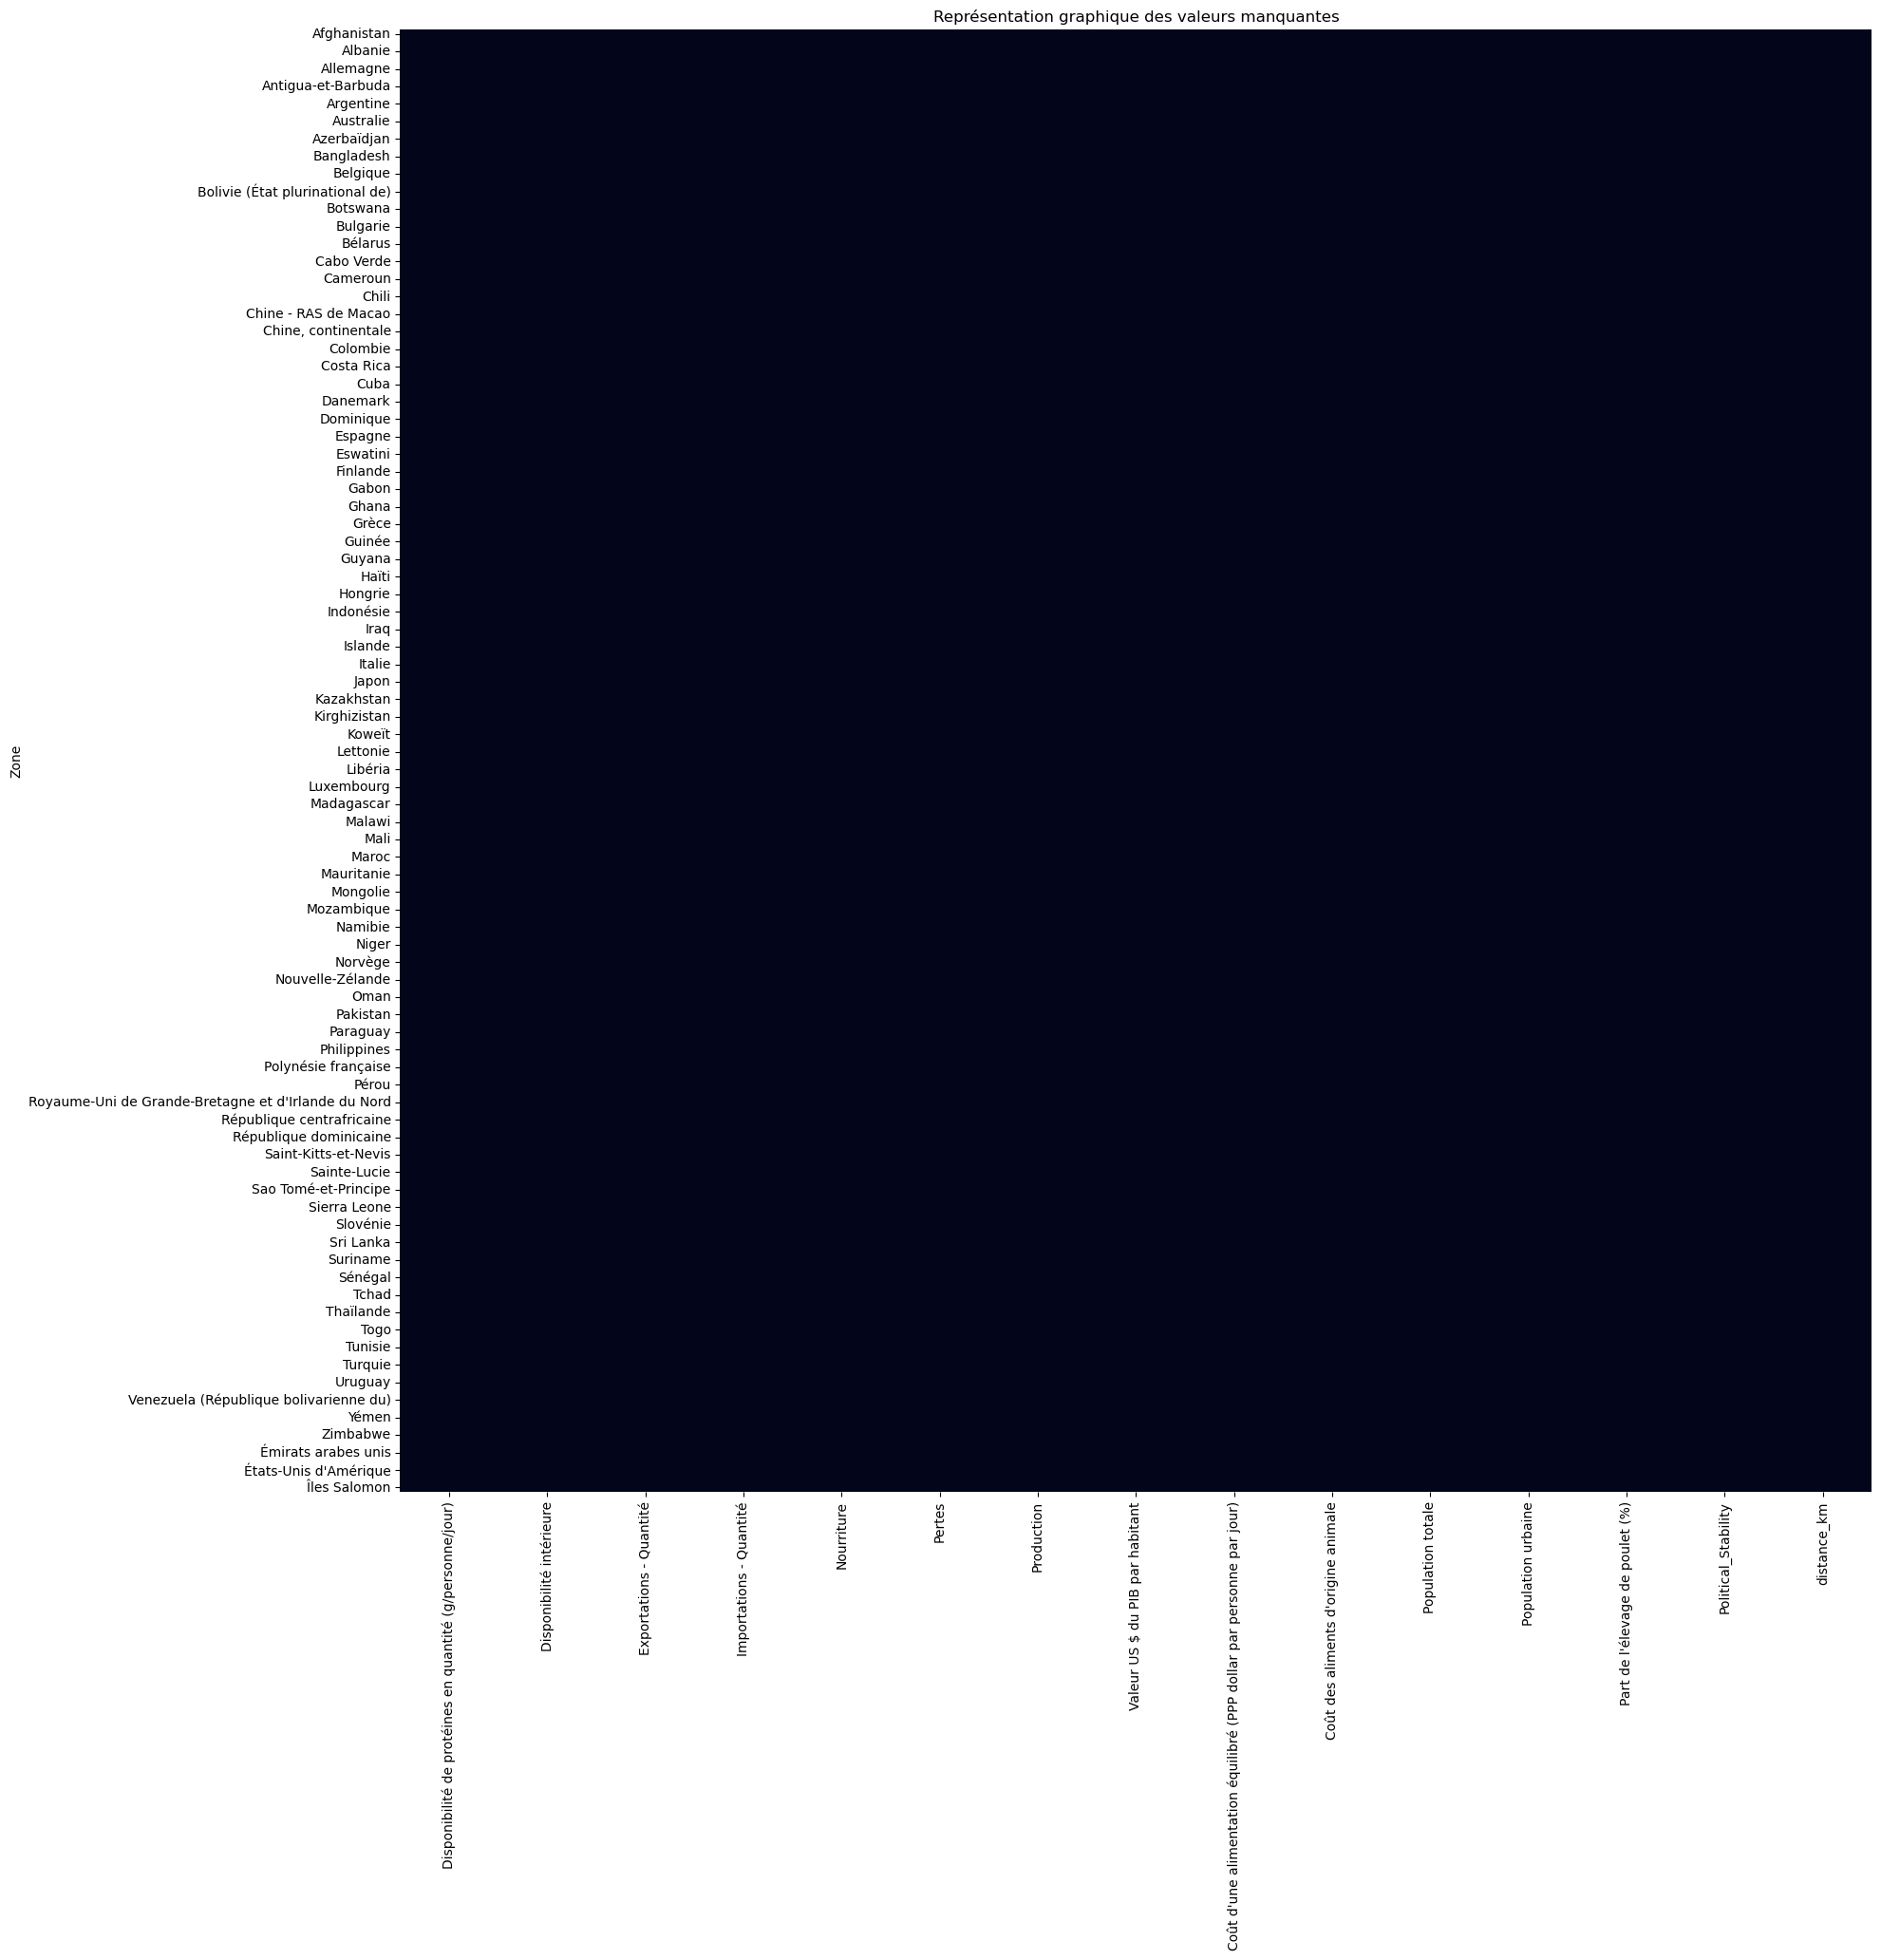

observations  variables  \
Coût d'une alimentation équilibré (PPP dollar p...           167         15   
Coût des aliments d'origine animale                          167         15   
Disponibilité de protéines en quantité (g/perso...           167         15   
Disponibilité intérieure                                     167         15   
Exportations - Quantité                                      167         15   
Importations - Quantité                                      167         15   
Nourriture                                                   167         15   
Part de l'élevage de poulet (%)                              167         15   
Pertes                                                       167         15   
Political_Stability                                          167         15   
Population totale                                            167         15   
Population urbaine                                           167         15   
Production                                                   167         15   
Valeur US $ du PIB par habitant                              167         15   
distance_km                                                  167         15   

                                                        moyennes     medianes  \
Coût d'une alimentation équilibré (PPP dollar p...      3.281626     3.281626   
Coût des aliments d'origine animale                     0.873680     0.873680   
Disponibilité de protéines en quantité (g/perso...      7.218683     6.650000   
Disponibilité intérieure                              685.155689    98.000000   
Exportations - Quantité                                      NaN     0.000000   
Importations - Quantité                                87.287425    16.000000   
Nourriture                                            654.598802    98.000000   
Part de l'élevage de poulet (%)                        18.900427    12.900000   
Pertes                                                       NaN     0.000000   
Political_Stability                                    -0.095379    -0.095379   
Population totale                                   43311.230683  9707.876000   
Population urbaine                                  23508.306407  5226.646000   
Production                                                   NaN    67.000000   
Valeur US $ du PIB par habitant                     14012.414131  6121.876572   
distance_km                                          6043.995287  5585.295235   

                                                      ecart_types         min  \
Coût d'une alimentation équilibré (PPP dollar p...       0.606592    1.822000   
Coût des aliments d'origine animale                      0.198429    0.377000   
Disponibilité de protéines en quantité (g/perso...       5.631029    0.040000   
Disponibilité intérieure                              2205.183111    2.000000   
Exportations - Quantité                                       NaN         NaN   
Importations - Quantité                                185.374323    0.000000   
Nourriture                                            2154.221283    2.000000   
Part de l'élevage de poulet (%)                         20.578547    0.060000   
Pertes                                                        NaN         NaN   
Political_Stability                                      0.867901   -2.940000   
Population totale                                   155664.250298   47.785000   
Population urbaine                                   77513.948129   17.031000   
Production                                                    NaN         NaN   
Valeur US $ du PIB par habitant                      19424.984964  450.900697   
distance_km                                           3939.540541  264.600808   

                                                             max  \
Coût d'une alimentation équilibré (PPP dollar p...  5.975000e+00   
Coût des aliments d'origine animale                 1.583

In [72]:
my_first_analyse(df, graphique=True)

# Scaling des données

Nous allons pouvoir normaliser nos données

In [73]:
df_sans_scale = df

In [74]:
df_sans_scale = df_sans_scale.astype(float)

In [75]:
df = my_data_scaler(df,scaler_all=True, method="robust")
display(df.head())
print(df.shape)

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                             -0.738815          
Afrique du Sud                                           0.902056          
Albanie                                                 -0.047158          
Algérie                                                 -0.565901          
Allemagne                                                0.158404          

                Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                
Afghanistan                    -0.128125                 0.000000   
Afrique du Sud                  6.312500                 5.250000   
Albanie                        -0.159375                 0.000000   
Algérie                         0.559375                 0.000000   
Allemagne                       5.128125                53.833333   

                Importations - Quantité  Nourriture  Pertes  Production  \
Zone                                                                      
Afghanistan                    0.172185   -0.134796     1.0   -0.115214   
Afrique du Sud                 6.596026    6.072100    41.5    4.726736   
Albanie                        0.291391   -0.159875     0.0   -0.159527   
Algérie                       -0.185430    0.520376     6.5    0.614476   
Allemagne                     10.940397    4.736677     0.0    4.274742   

                Valeur US $ du PIB par habitant  \
Zone                                              
Afghanistan                           -0.396208   
Afrique du Sud                         0.000000   
Albanie                               -0.113719   
Algérie                               -0.142333   
Allemagne                              2.725436   

                Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                   
Afghanistan                                              0.000000                      
Afrique du Sud                                           1.202013                      
Albanie                                                  0.982233                      
Algérie                                                  0.705310                      
Allemagne                                               -0.726192                      

                Coût des aliments d'origine animale  Population totale  \
Zone                                                                     
Afghanistan                                0.000000           0.939342   
Afrique du Sud                             0.739799           1.699846   
Albanie                                    1.318642          -0.247318   
Algérie                                    0.360558           1.138294   
Allemagne                                 -0.829063           2.640913   

                Population urbaine  Part de l'élevage de poulet (%)  \
Zone                                                                  
Afghanistan               0.267179                        -0.674744   
Afrique du Sud            2.291744                        -0.022989   
Albanie                  -0.248756                        -0.146629   
Algérie                   1.751116                         0.525008   
Allemagne                 4.153446                        -0.305064   

                Political_Stability  distance_km  
Zone                                              
Afghanistan               -2.393470     0.001494  
Afrique du Sud            -0.163381     0.622520  
Albanie                    0.420690    -0.666015  
Algérie                   -0.729753    -0.709255  
Allemagne                  0.606530    -0.787013

(167, 15)


# Analyse Bivraié

In [76]:
#sns.pairplot(df, corner=True)

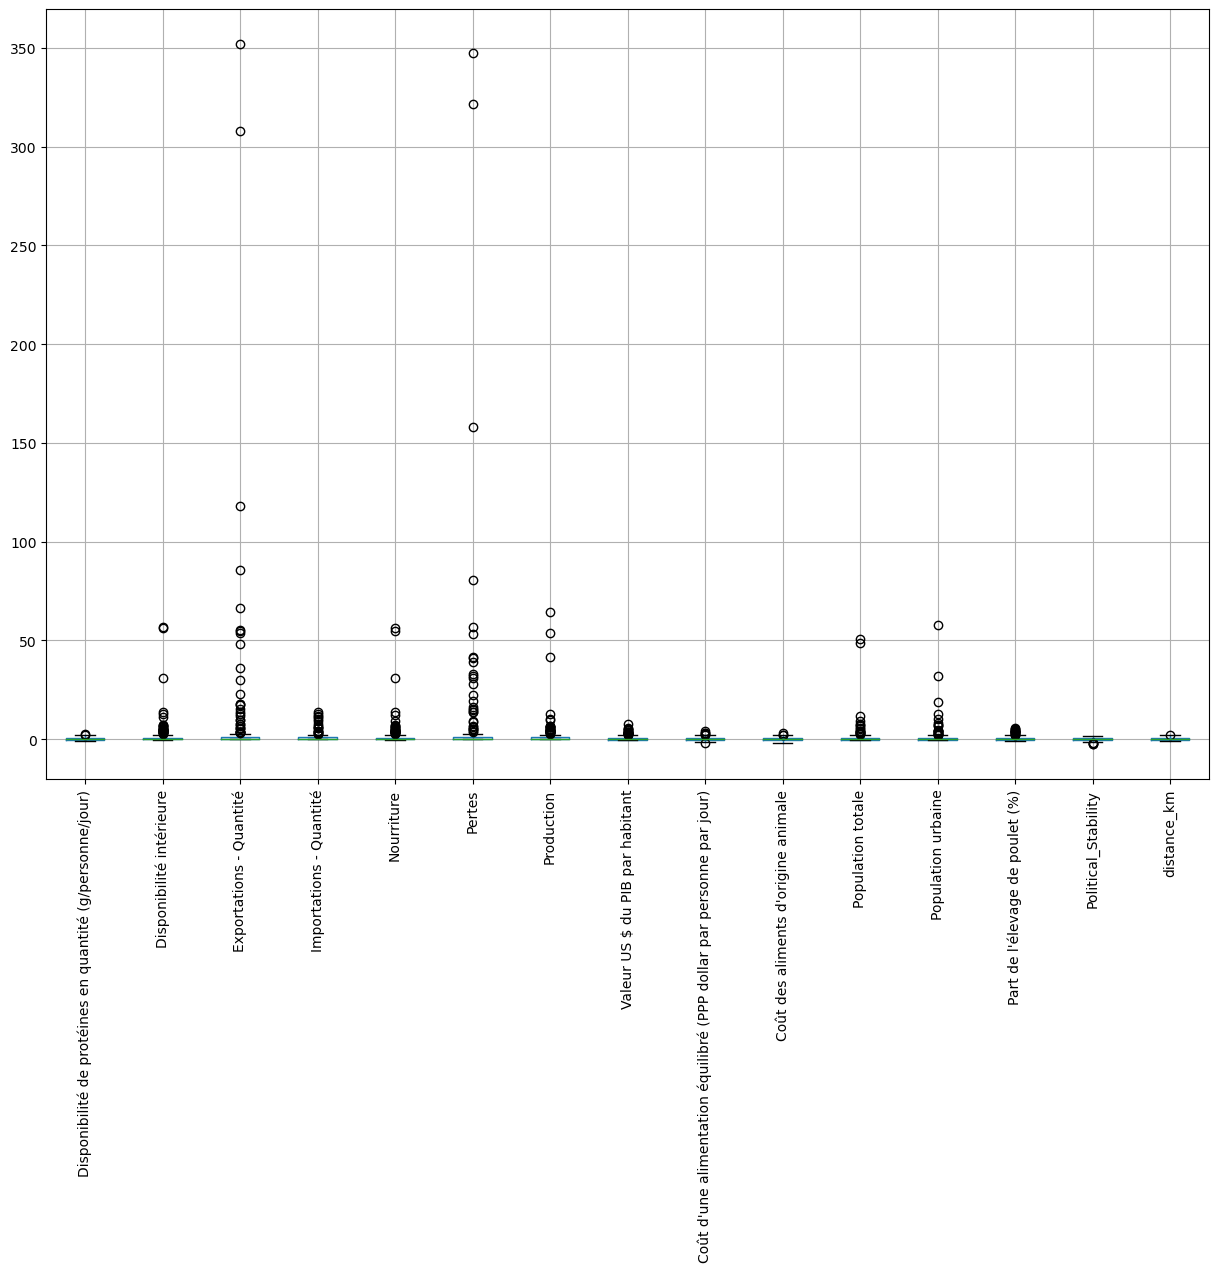

In [77]:
my_boxplots(df)

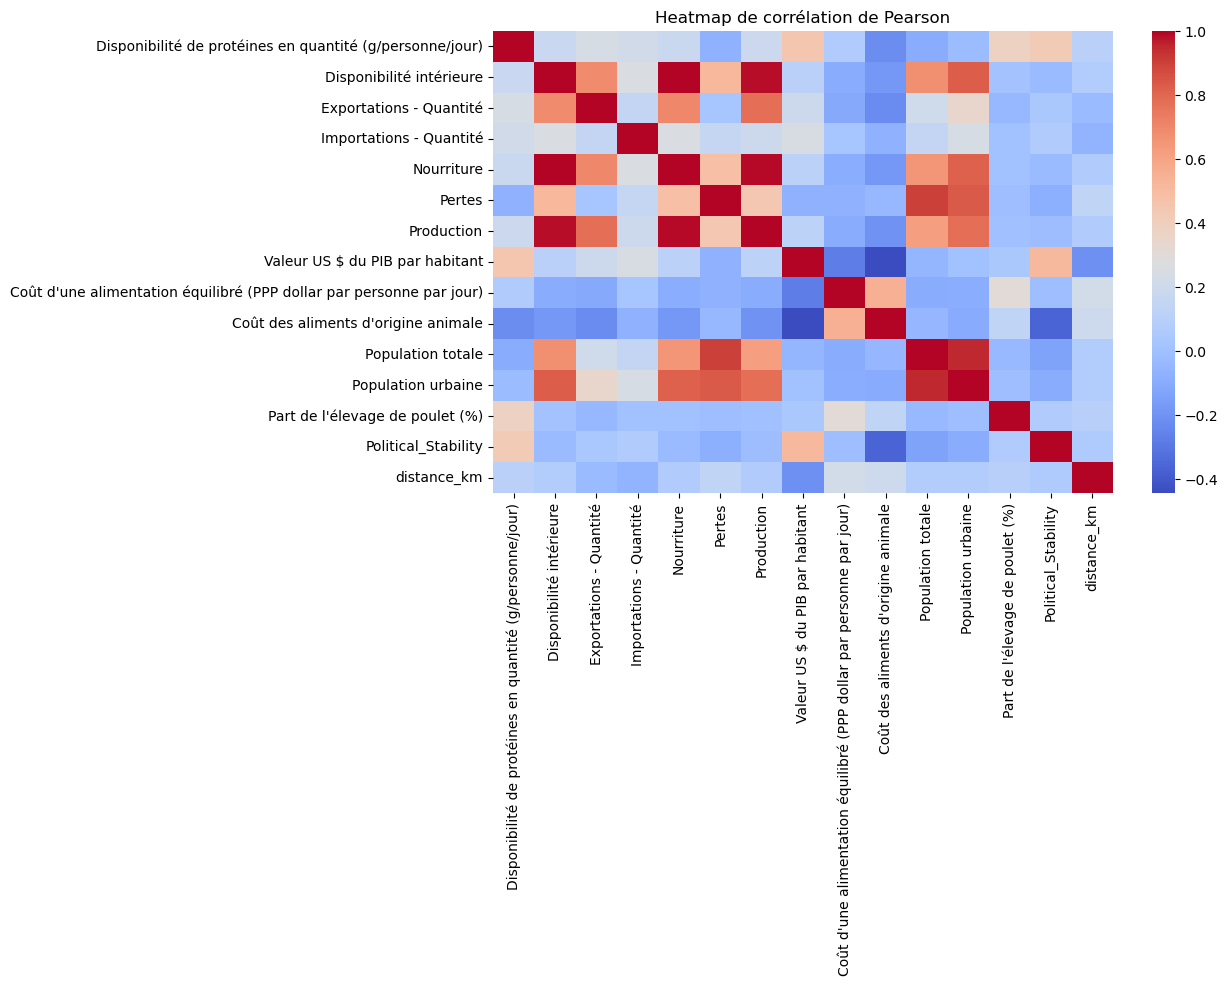

In [78]:
my_corr_heatmap(df, annot=False)

On constate des corrélations importantes entre les variables : 
- Nourriture et Disponibilité intérieure et Production
- Population totale et Pertes
- Production et Exportation - Quantité
- Exportation - Quantité et Disponibilité Intérieures
- Valeur US dol du PIB (en millions) et Disponibilité intérieure
- Valeur US dol du PIB (en millions) et Nourriture
- ...

# Clustering

Pour nos tests, nous allons utiliser plusieurs DataFrame : 
- Les données sans scaling, avec les outliers
- Les données avec scaling, sans les outliers
- Les données sans scaling, sans les outliers
- Les données avec scaling, avec les outliers

In [79]:
# On recherche les outliers avec le Z-Score
outliers = my_outliers_zscore(df)
df_avec_scaling_sans_outliers = df.drop(outliers.index, axis=0)

In [80]:
df_avec_scaling_sans_outliers

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                            
Afrique du Sud                                                0.902056          
Albanie                                                      -0.047158          
Algérie                                                      -0.565901          
Angola                                                       -0.368803          
Antigua-et-Barbuda                                            1.344619          
...                                                                ...          
Égypte                                                       -0.258767          
Émirats arabes unis                                           0.985490          
Équateur                                                     -0.060459          
Éthiopie                                                     -0.799274          
Îles Salomon                                                 -0.621524          

                     Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                     
Afrique du Sud                       6.312500                 5.250000   
Albanie                             -0.159375                 0.000000   
Algérie                              0.559375                 0.000000   
Angola                               0.690625                 0.000000   
Antigua-et-Barbuda                  -0.284375                 0.000000   
...                                       ...                      ...   
Égypte                               3.600000                 0.083333   
Émirats arabes unis                  0.981250                 7.833333   
Équateur                             0.759375                 0.000000   
Éthiopie                            -0.262500                 0.000000   
Îles Salomon                        -0.296875                 0.000000   

                     Importations - Quantité  Nourriture  Pertes  Production  \
Zone                                                                           
Afrique du Sud                      6.596026    6.072100    41.5    4.726736   
Albanie                             0.291391   -0.159875     0.0   -0.159527   
Algérie                            -0.185430    0.520376     6.5    0.614476   
Angola                              3.456954    0.680251     1.0   -0.073855   
Antigua-et-Barbuda                 -0.119205   -0.291536     0.0   -0.197932   
...                                      ...         ...     ...         ...   
Égypte                              1.245033    3.611285     0.0    3.104874   
Émirats arabes unis                 5.523179    0.984326     0.0   -0.056130   
Équateur                           -0.211921    0.708464     8.5    0.806499   
Éthiopie                           -0.198675   -0.263323     0.5   -0.156573   
Îles Salomon                       -0.132450   -0.297806     0.0   -0.197932   

                     Valeur US $ du PIB par habitant  \
Zone                                                   
Afrique du Sud                              0.000000   
Albanie                                    -0.113719   
Algérie                                    -0.142333   
Angola                                     -0.143315   
Antigua-et-Barbuda                          0.655120   
...                                              ...   
Égypte                                     -0.289913   
Émirats arabes unis                         2.441997   
Équateur                                    0.006481   
Éthiopie                                   -0.381980   
Îles Salomon                               -0.268017   

                     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                        
Afrique du Sud                                  

## Avec scaling, sans les outliers

In [81]:
# Colonne à supprimer pour le choix des variables
df_avec_scaling_sans_outliers = df_avec_scaling_sans_outliers.drop(["Population urbaine","Production","Exportations - Quantité","Pertes","distance_km"], axis=1)

### K-means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

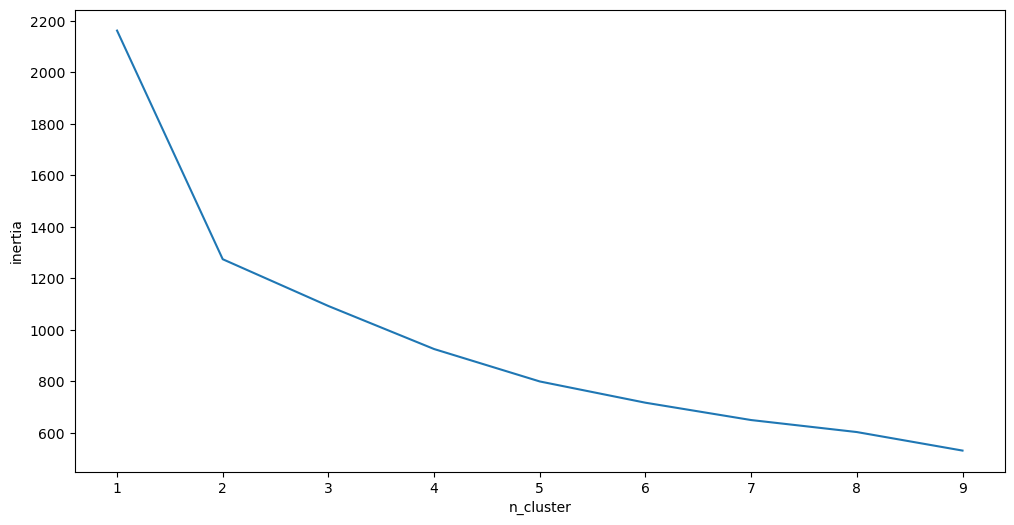

In [82]:
my_kmeans_coude(df_avec_scaling_sans_outliers)

### Silhouette

Le nombre optimal de cluster est : 2


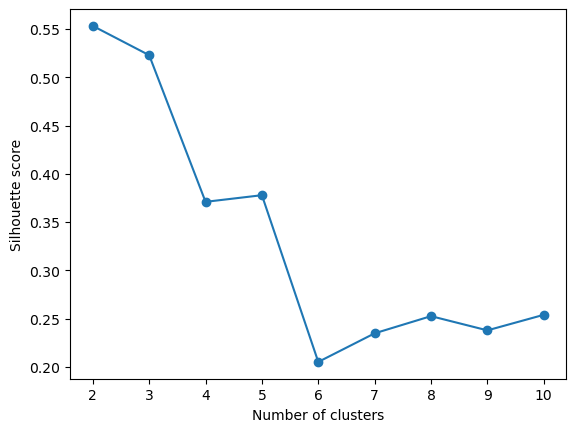

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [83]:
my_silhouette_method(df_avec_scaling_sans_outliers, 10)

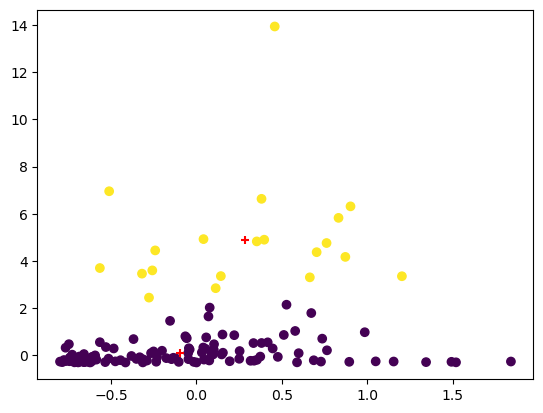

In [84]:
my_kmeans(df_avec_scaling_sans_outliers, 2, graphique=False)

In [85]:
df_avec_scaling_sans_outliers

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                            
Afrique du Sud                                                0.902056          
Albanie                                                      -0.047158          
Algérie                                                      -0.565901          
Angola                                                       -0.368803          
Antigua-et-Barbuda                                            1.344619          
...                                                                ...          
Égypte                                                       -0.258767          
Émirats arabes unis                                           0.985490          
Équateur                                                     -0.060459          
Éthiopie                                                     -0.799274          
Îles Salomon                                                 -0.621524          

                     Disponibilité intérieure  Importations - Quantité  \
Zone                                                                     
Afrique du Sud                       6.312500                 6.596026   
Albanie                             -0.159375                 0.291391   
Algérie                              0.559375                -0.185430   
Angola                               0.690625                 3.456954   
Antigua-et-Barbuda                  -0.284375                -0.119205   
...                                       ...                      ...   
Égypte                               3.600000                 1.245033   
Émirats arabes unis                  0.981250                 5.523179   
Équateur                             0.759375                -0.211921   
Éthiopie                            -0.262500                -0.198675   
Îles Salomon                        -0.296875                -0.132450   

                     Nourriture  Valeur US $ du PIB par habitant  \
Zone                                                               
Afrique du Sud         6.072100                         0.000000   
Albanie               -0.159875                        -0.113719   
Algérie                0.520376                        -0.142333   
Angola                 0.680251                        -0.143315   
Antigua-et-Barbuda    -0.291536                         0.655120   
...                         ...                              ...   
Égypte                 3.611285                        -0.289913   
Émirats arabes unis    0.984326                         2.441997   
Équateur               0.708464                         0.006481   
Éthiopie              -0.263323                        -0.381980   
Îles Salomon          -0.297806                        -0.268017   

                     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                        
Afrique du Sud                                                1.202013                      
Albanie                                                       0.982233                      
Algérie                                                       0.705310                      
Angola                                                        1.531684                      
Antigua-et-Barbuda                                            1.216665                      
...                                                                ...                      
Égypte                                                        0.256958                      
Émirats arabes unis                                          -0.771613                      
Équateur                                                     -0.723261                      
Éthiopie                                                     -0.254397                      
Île

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

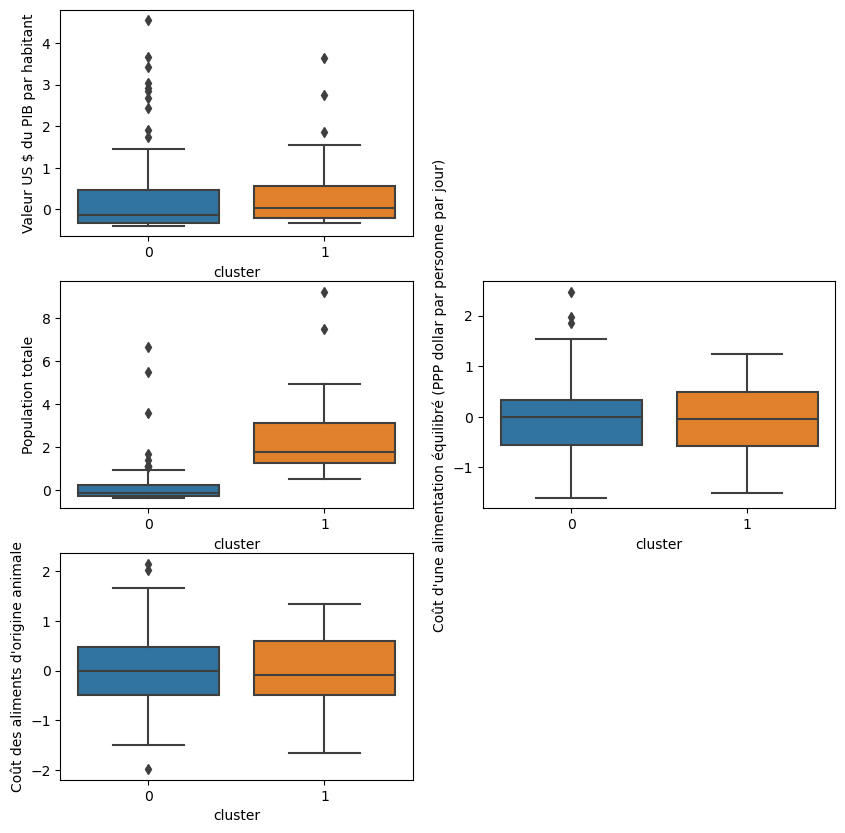

In [86]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Valeur US $ du PIB par habitant")

plt.subplot(323)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [57. 72. 80. 88.]


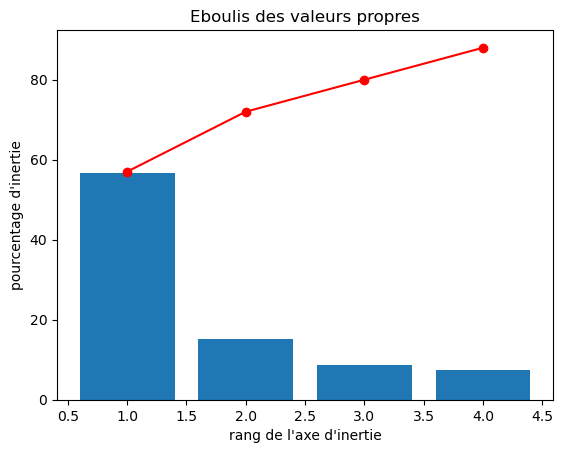

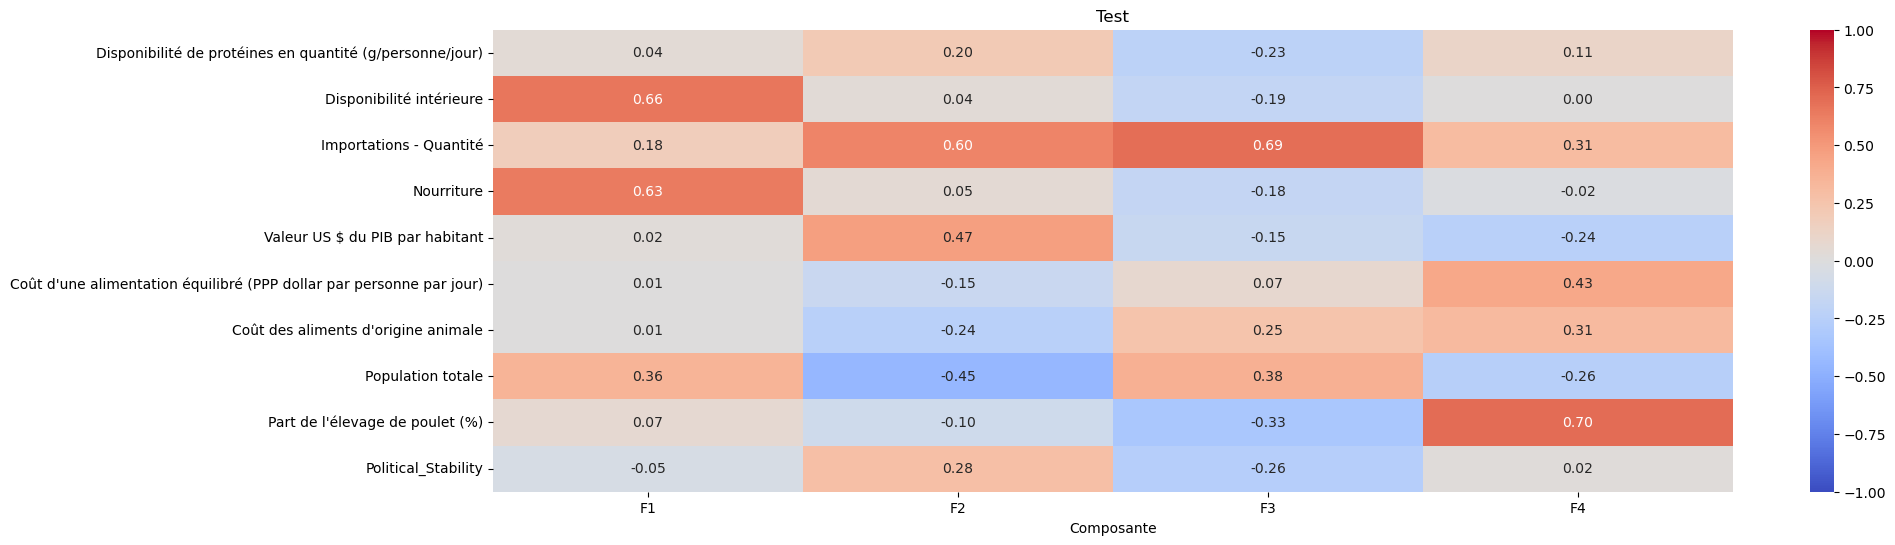

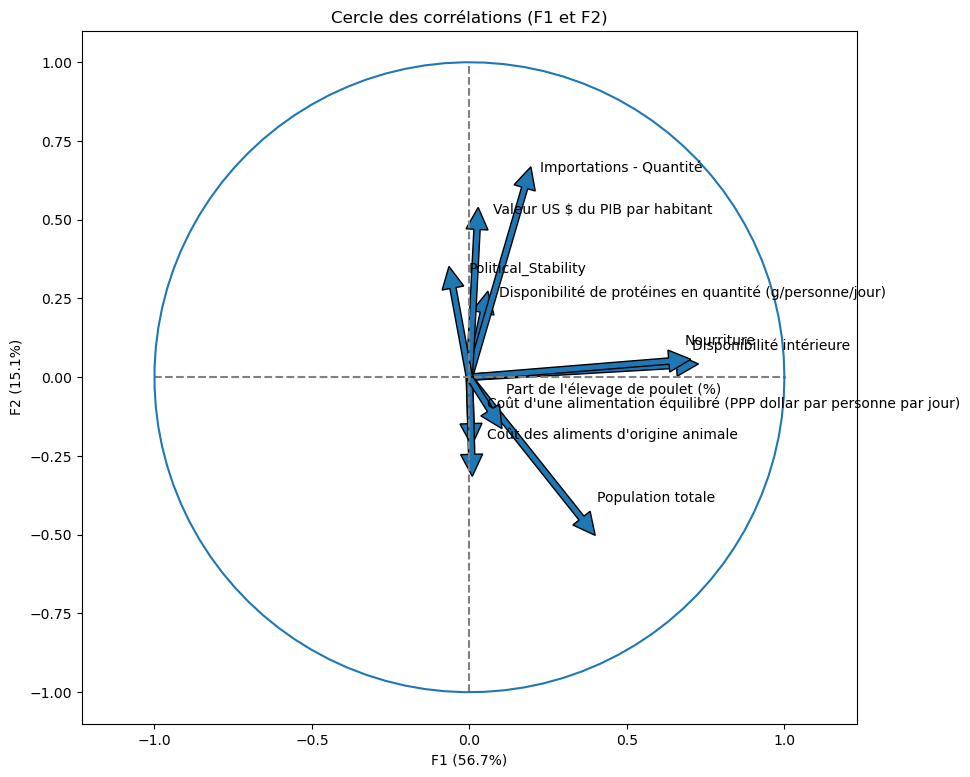

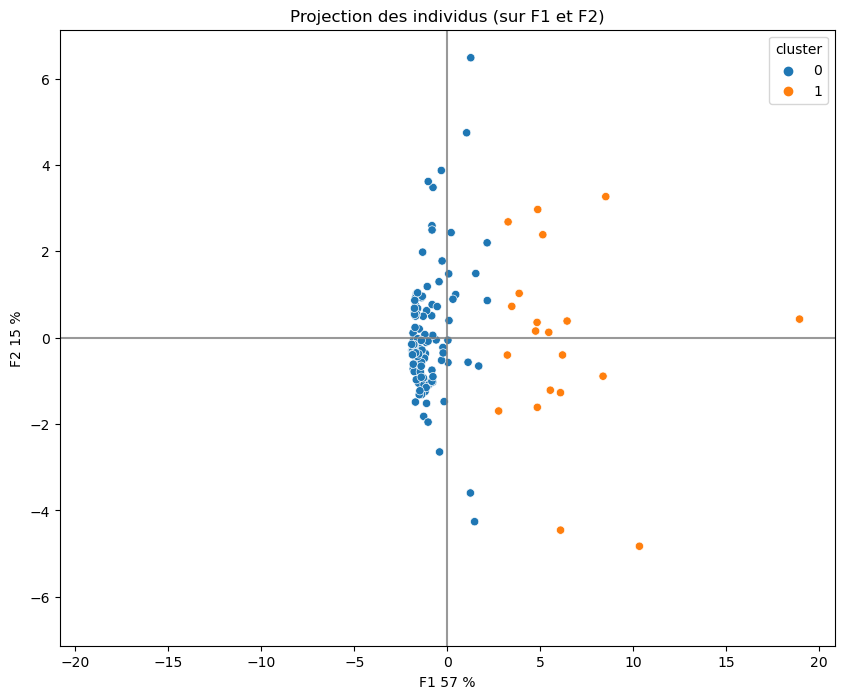

In [87]:
my_pca_proj(df_avec_scaling_sans_outliers, 4, (0,1), clusters=df_avec_scaling_sans_outliers["cluster"], sup_columns=["cluster"])

Cluster 1: ['Albanie', 'Algérie', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Chypre', 'Congo', 'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Djibouti', 'Dominique', 'El Salvador', 'Estonie', 'Eswatini', 'Fidji', 'Gabon', 'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Honduras', 'Hongrie', 'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Lituanie', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Malte', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique', 'Namibie', 'Nicaragua', 'Niger', 'Nouvelle-Calédonie', 'Népal', 'Oman', 'Ouganda', 'Panama', 'Paraguay', 'Polynésie française', 'Portugal', 'Roumanie', 'Rwanda', 'République centrafricaine', 'République de Moldova', 'République dominicaine', 

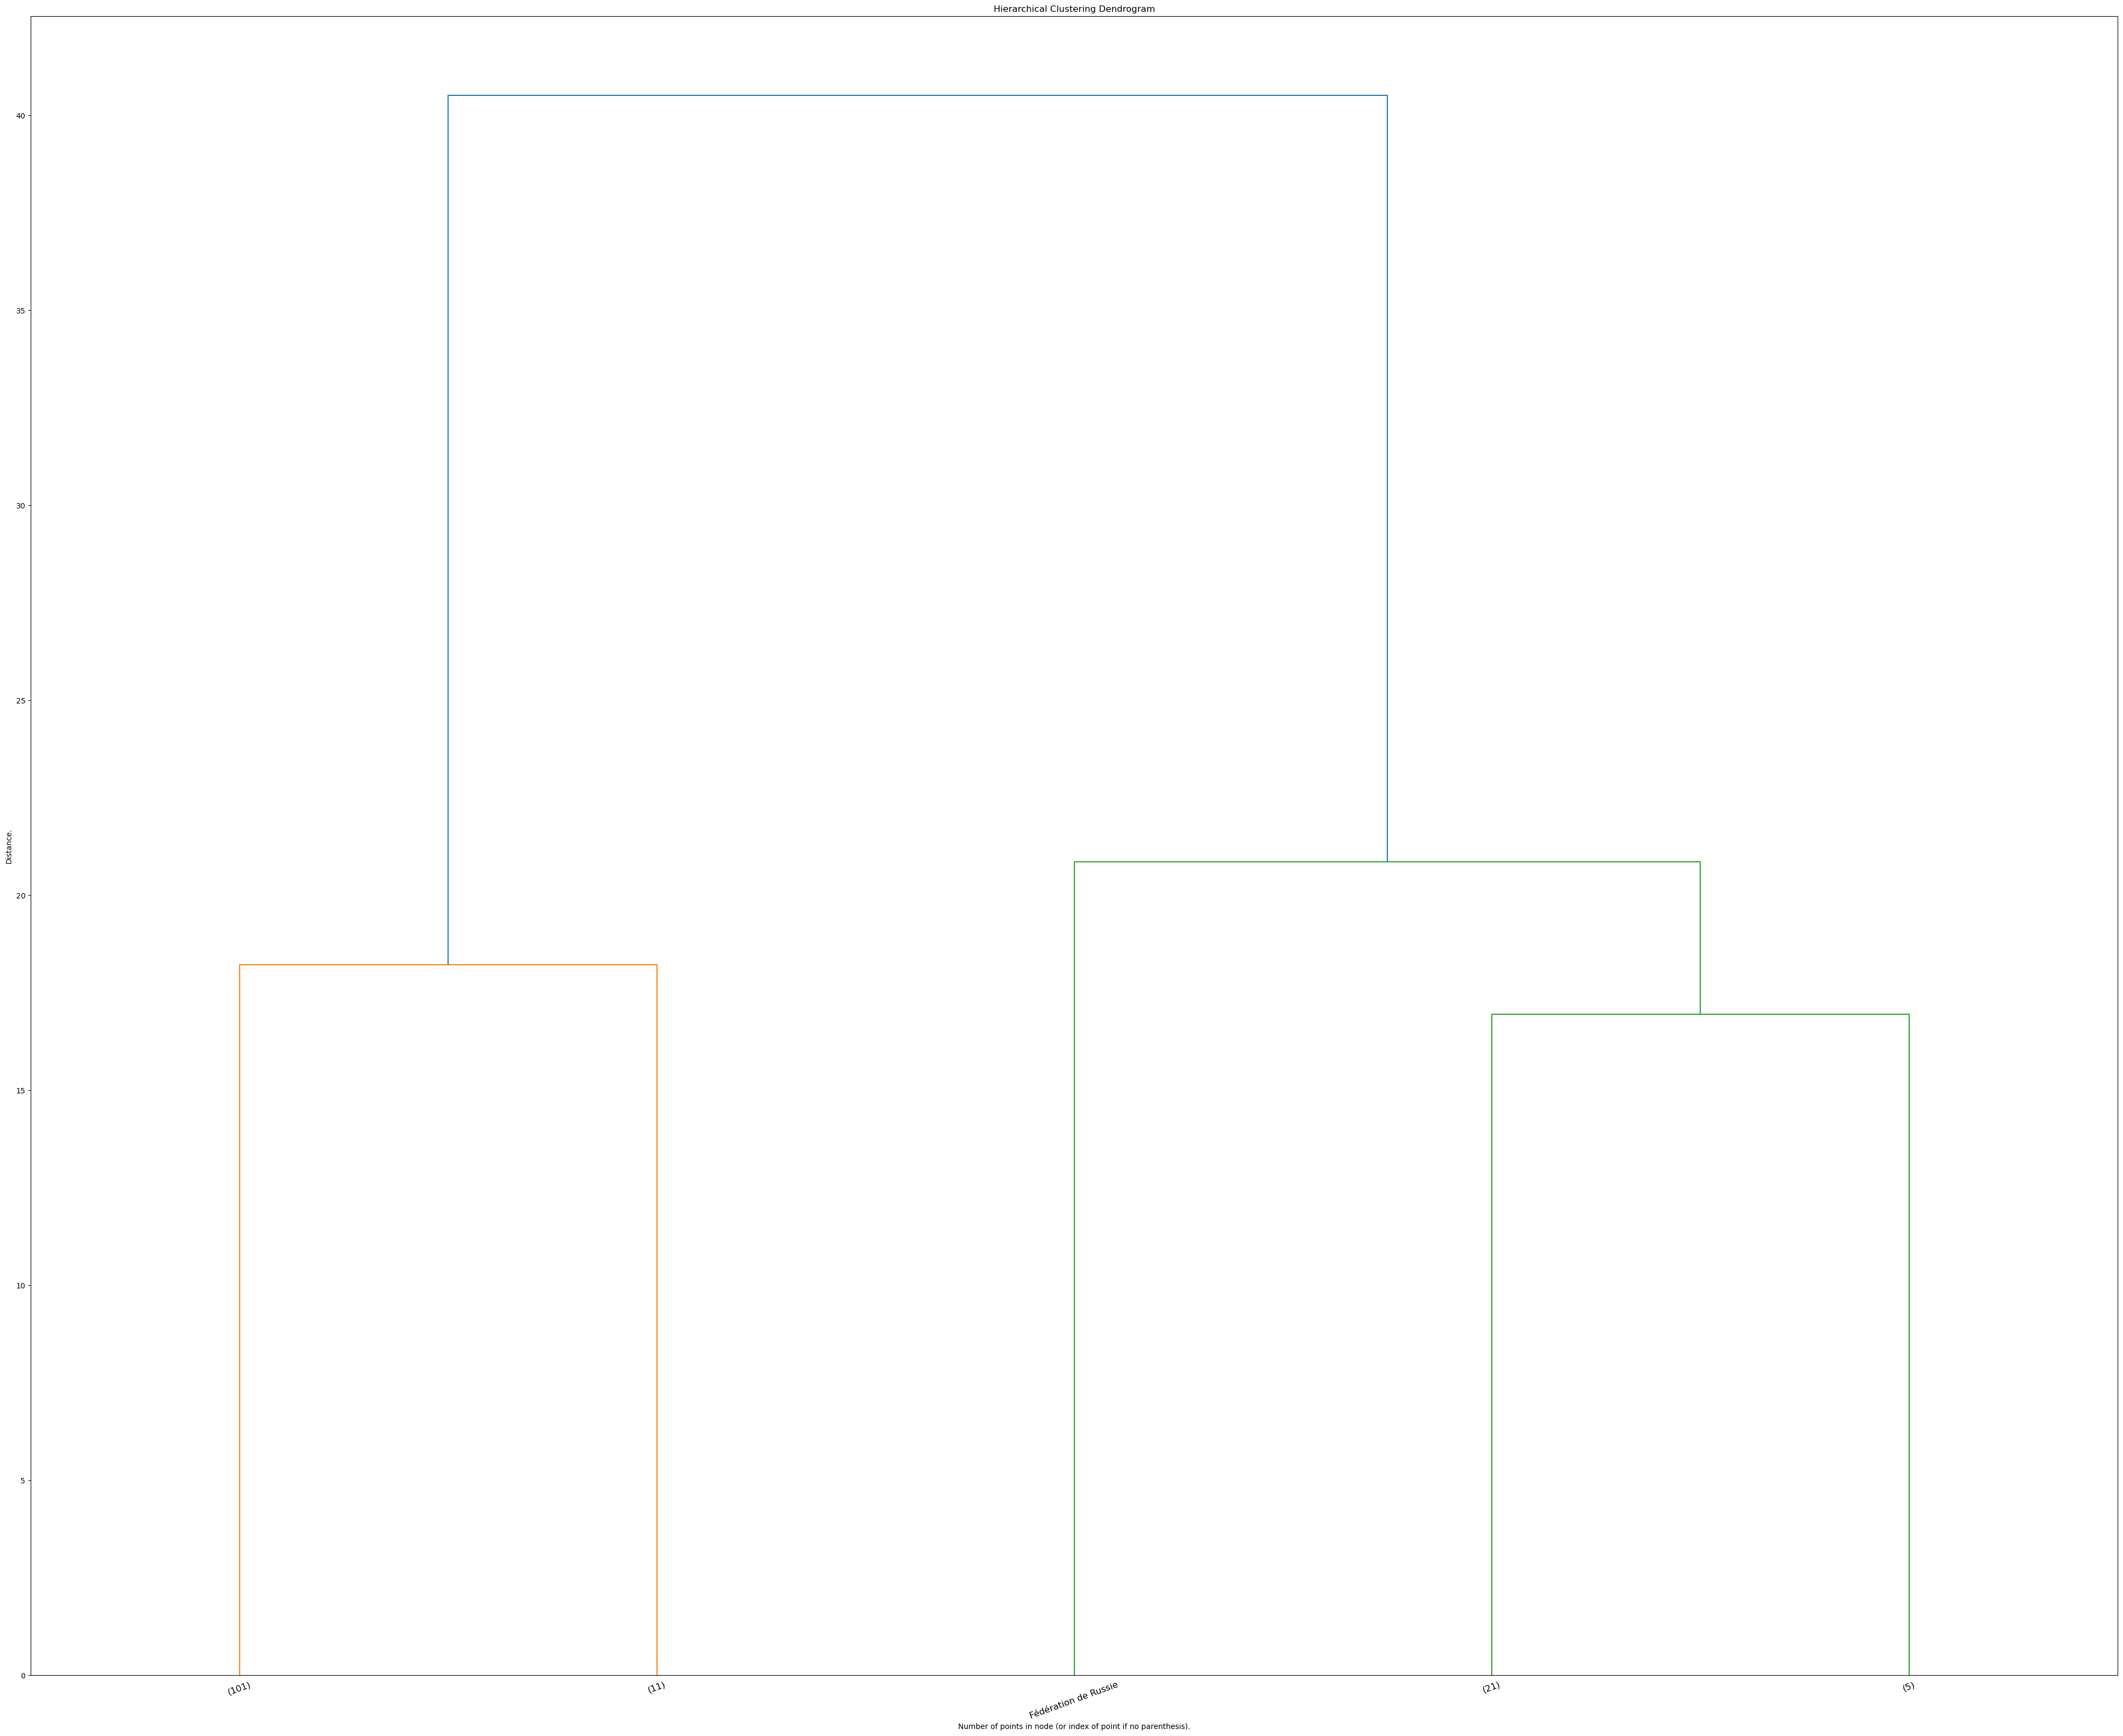

In [88]:
my_dendrogram(df_avec_scaling_sans_outliers, 5)

## Sans Scaling, Sans Outliers

In [89]:
df_sans_scale

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                                57.0                      0.0   
Afrique du Sud                           2118.0                     63.0   
Albanie                                    47.0                      0.0   
Algérie                                   277.0                      0.0   
Allemagne                                1739.0                    646.0   
...                                         ...                      ...   
Émirats arabes unis                       412.0                     94.0   
Équateur                                  341.0                      0.0   
États-Unis d'Amérique                   18266.0                   3692.0   
Éthiopie                                   14.0                      0.0   
Îles Salomon                                3.0                      0.0   

                       Importations - Quantité  Nourriture  Pertes  \
Zone                                                                 
Afghanistan                               29.0        55.0     2.0   
Afrique du Sud                           514.0      2035.0    83.0   
Albanie                                   38.0        47.0     0.0   
Algérie                                    2.0       264.0    13.0   
Allemagne                                842.0      1609.0     0.0   
...                                        ...         ...     ...   
Émirats arabes unis                      433.0       412.0     0.0   
Équateur                                   0.0       324.0    17.0   
États-Unis d'Amérique                    123.0     18100.0     0.0   
Éthiopie                                   1.0        14.0     1.0   
Îles Salomon                               6.0         3.0     0.0   

                       Production  Valeur US $ du PIB par habitant  \
Zone                                                                 
Afghanistan                  28.0                       520.616409   
Afrique du Sud             1667.0                      6121.876572   
Albanie                      13.0                      4514.204908   
Algérie                     275.0                      4109.696001   
Allemagne                  1514.0                     44651.829102   
...                           ...                              ...   
Émirats arabes unis          48.0                     40644.804043   
Équateur                    340.0                      6213.501276   
États-Unis d'Amérique     21914.0                     59921.674703   
Éthiopie                     14.0                       721.753494   
Îles Salomon                  0.0                      2332.873855   

                       Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                 

In [90]:
# On retire les outliers de notre DataFrame
df_sans_scaling_sans_outliers = df_sans_scale.drop(outliers.index, axis=0)

In [91]:
# Colonne à supprimer pour le choix des variables
df_sans_scaling_sans_outliers = df_sans_scaling_sans_outliers.drop(["Exportations - Quantité","Pertes","distance_km"], axis=1)

### K-Means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

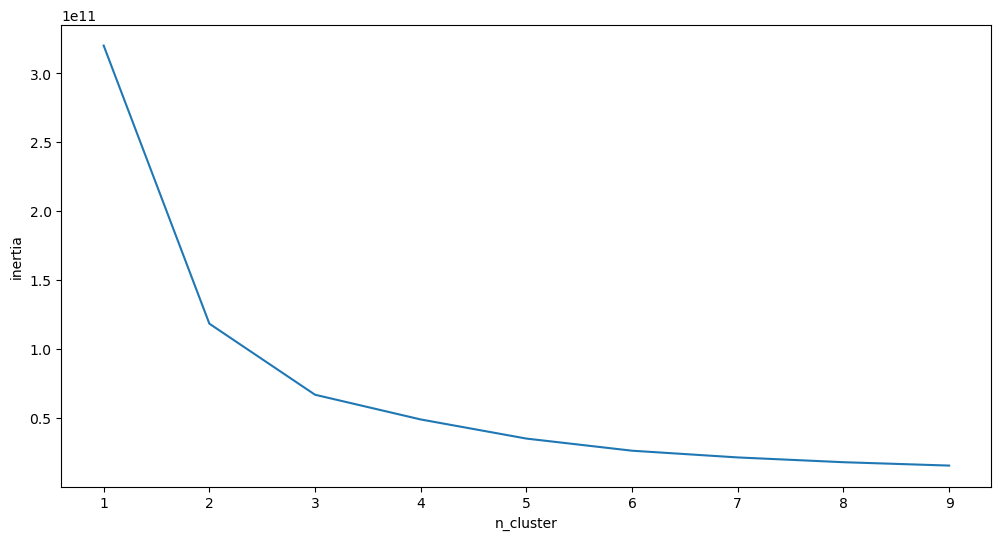

In [92]:
my_kmeans_coude(df_sans_scaling_sans_outliers)

### Silhouette

Le nombre optimal de cluster est : 2


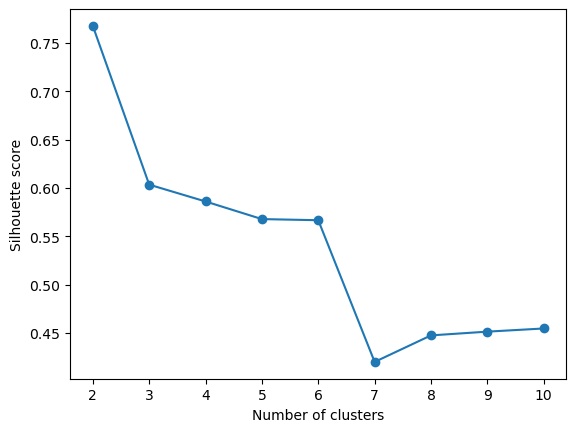

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [93]:
my_silhouette_method(df_sans_scaling_sans_outliers, 10)

In [94]:
df_sans_scaling_sans_outliers

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                            
Afrique du Sud                                                   14.11          
Albanie                                                           6.26          
Algérie                                                           1.97          
Angola                                                            3.60          
Antigua-et-Barbuda                                               17.77          
...                                                                ...          
Égypte                                                            4.51          
Émirats arabes unis                                              14.80          
Équateur                                                          6.15          
Éthiopie                                                          0.04          
Îles Salomon                                                      1.51          

                     Disponibilité intérieure  Importations - Quantité  \
Zone                                                                     
Afrique du Sud                         2118.0                    514.0   
Albanie                                  47.0                     38.0   
Algérie                                 277.0                      2.0   
Angola                                  319.0                    277.0   
Antigua-et-Barbuda                        7.0                      7.0   
...                                       ...                      ...   
Égypte                                 1250.0                    110.0   
Émirats arabes unis                     412.0                    433.0   
Équateur                                341.0                      0.0   
Éthiopie                                 14.0                      1.0   
Îles Salomon                              3.0                      6.0   

                     Nourriture  Production  Valeur US $ du PIB par habitant  \
Zone                                                                           
Afrique du Sud           2035.0      1667.0                      6121.876572   
Albanie                    47.0        13.0                      4514.204908   
Algérie                   264.0       275.0                      4109.696001   
Angola                    315.0        42.0                      4095.811686   
Antigua-et-Barbuda          5.0         0.0                     15383.415188   
...                         ...         ...                              ...   
Égypte                   1250.0      1118.0                      2023.331158   
Émirats arabes unis       412.0        48.0                     40644.804043   
Équateur                  324.0       340.0                      6213.501276   
Éthiopie                   14.0        14.0                       721.753494   
Îles Salomon                3.0         0.0                      2332.873855   

                     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                        
Afrique du Sud                                                4.102000                      
Albanie                                                       3.952000                      
Algérie                                                       3.763000                      
Angola                                                        4.327000                      
Antigua-et-Barbuda                                            4.112000                      
...                                                                ...                      
Égypte                                                        3.457000                      
Émirats arabes unis                                           2.755000                      
Équateur                         

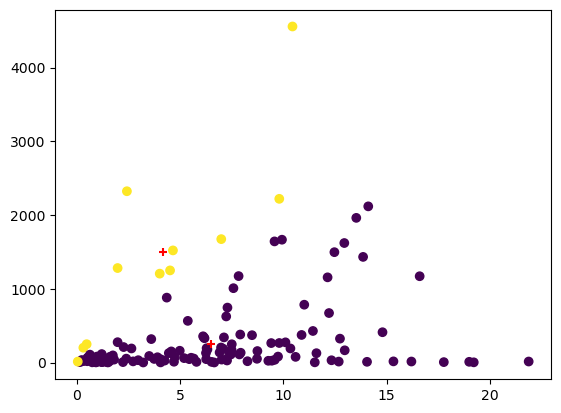

In [95]:
my_kmeans(df_sans_scaling_sans_outliers, n_clusters=2)

In [96]:
df_sans_scaling_sans_outliers

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                            
Afrique du Sud                                                   14.11          
Albanie                                                           6.26          
Algérie                                                           1.97          
Angola                                                            3.60          
Antigua-et-Barbuda                                               17.77          
...                                                                ...          
Égypte                                                            4.51          
Émirats arabes unis                                              14.80          
Équateur                                                          6.15          
Éthiopie                                                          0.04          
Îles Salomon                                                      1.51          

                     Disponibilité intérieure  Importations - Quantité  \
Zone                                                                     
Afrique du Sud                         2118.0                    514.0   
Albanie                                  47.0                     38.0   
Algérie                                 277.0                      2.0   
Angola                                  319.0                    277.0   
Antigua-et-Barbuda                        7.0                      7.0   
...                                       ...                      ...   
Égypte                                 1250.0                    110.0   
Émirats arabes unis                     412.0                    433.0   
Équateur                                341.0                      0.0   
Éthiopie                                 14.0                      1.0   
Îles Salomon                              3.0                      6.0   

                     Nourriture  Production  Valeur US $ du PIB par habitant  \
Zone                                                                           
Afrique du Sud           2035.0      1667.0                      6121.876572   
Albanie                    47.0        13.0                      4514.204908   
Algérie                   264.0       275.0                      4109.696001   
Angola                    315.0        42.0                      4095.811686   
Antigua-et-Barbuda          5.0         0.0                     15383.415188   
...                         ...         ...                              ...   
Égypte                   1250.0      1118.0                      2023.331158   
Émirats arabes unis       412.0        48.0                     40644.804043   
Équateur                  324.0       340.0                      6213.501276   
Éthiopie                   14.0        14.0                       721.753494   
Îles Salomon                3.0         0.0                      2332.873855   

                     Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                        
Afrique du Sud                                                4.102000                      
Albanie                                                       3.952000                      
Algérie                                                       3.763000                      
Angola                                                        4.327000                      
Antigua-et-Barbuda                                            4.112000                      
...                                                                ...                      
Égypte                                                        3.457000                      
Émirats arabes unis                                           2.755000                      
Équateur                         

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

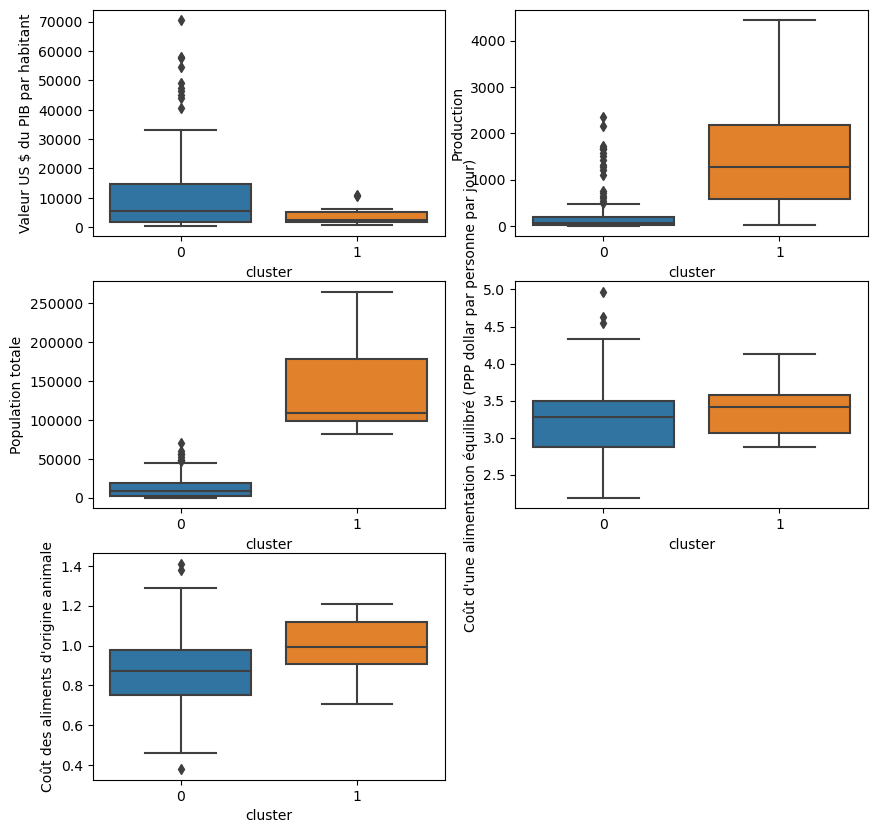

In [97]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Valeur US $ du PIB par habitant")

plt.subplot(322)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [ 90.  98. 100. 100.]


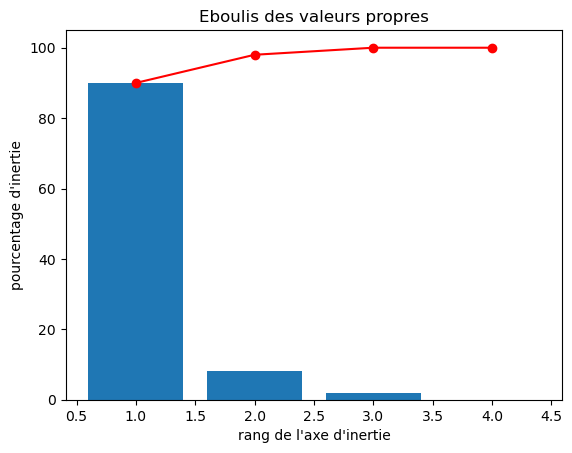

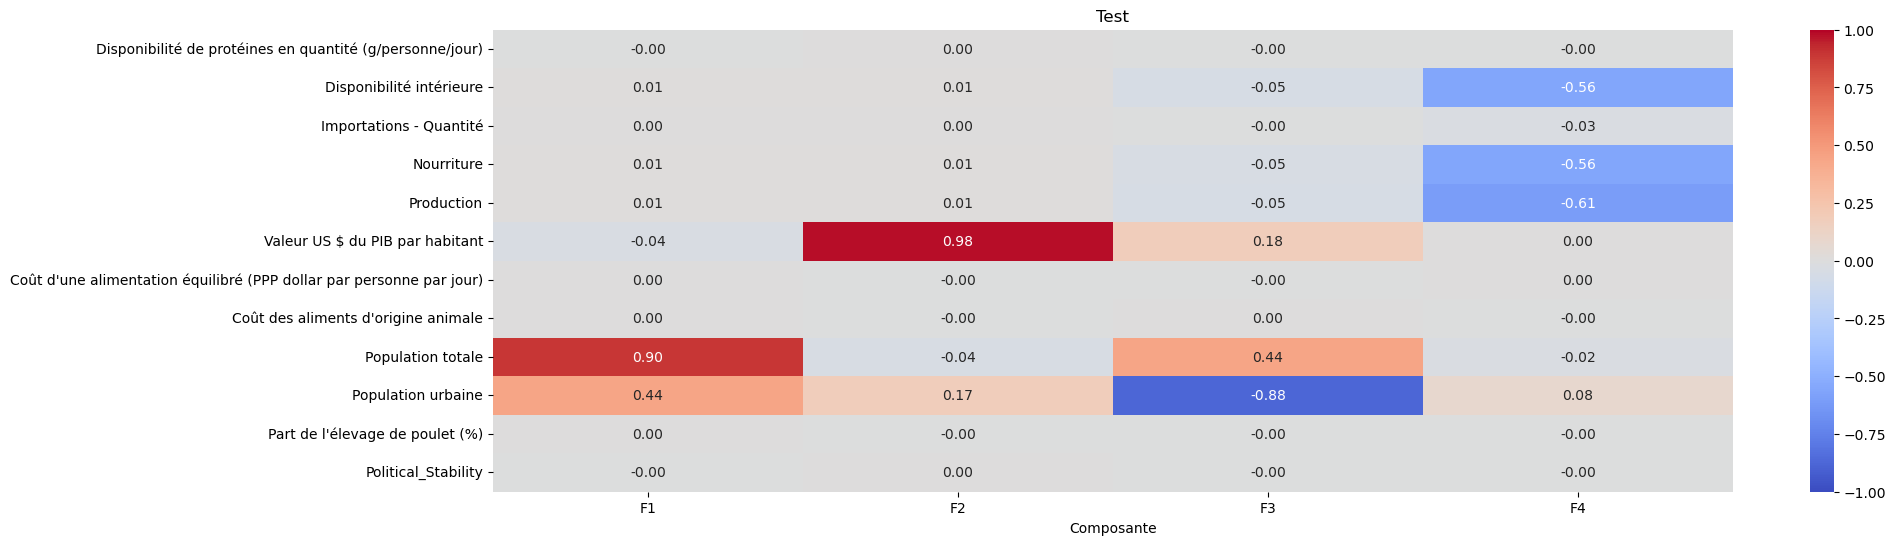

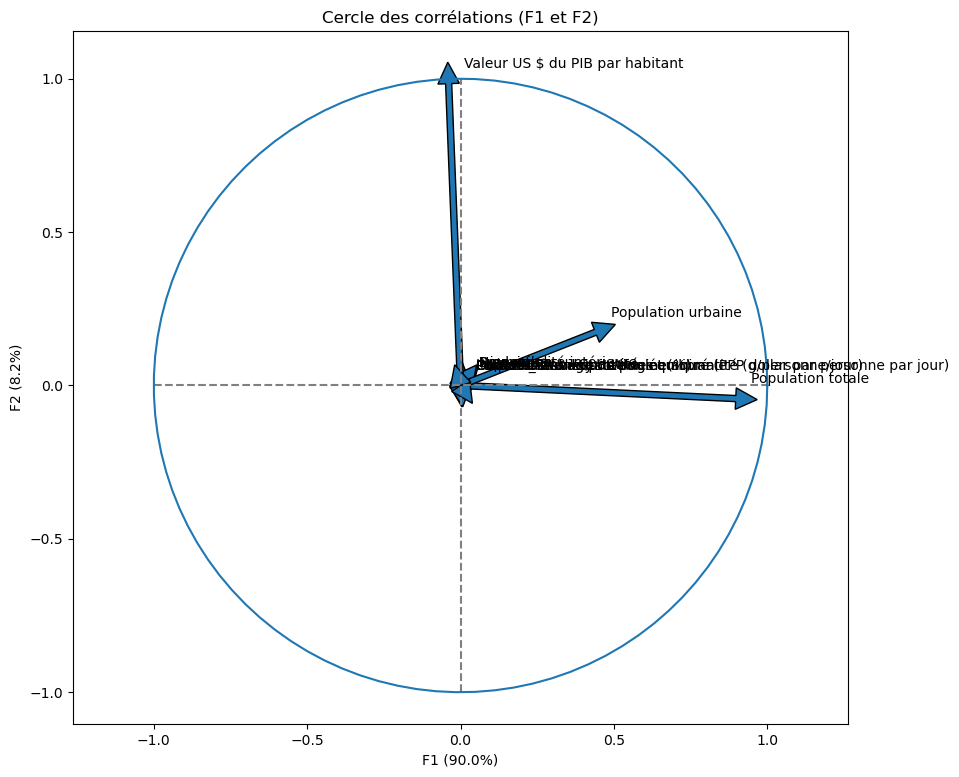

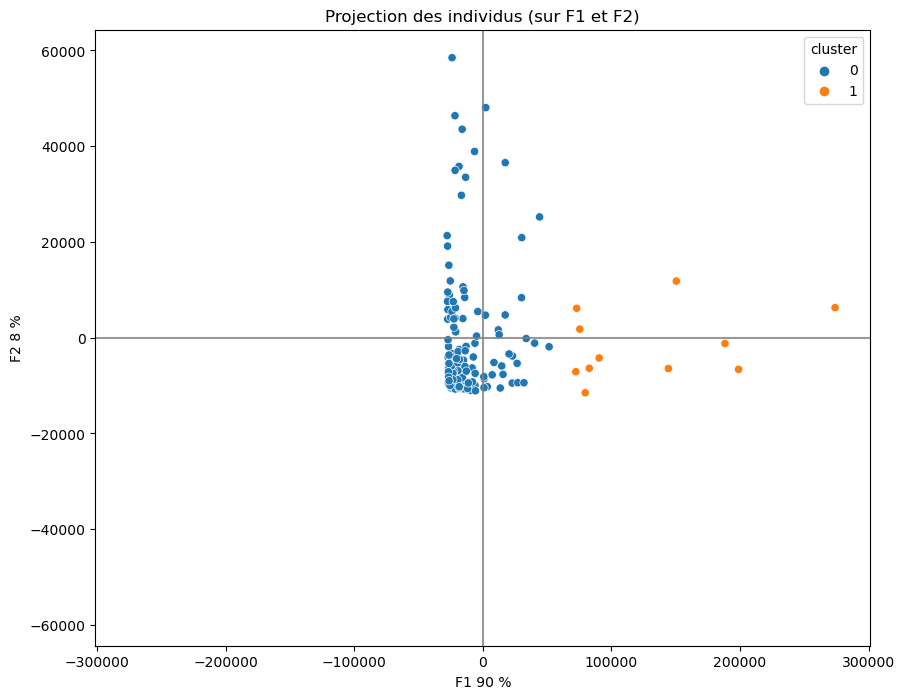

In [98]:
my_pca_proj(df_sans_scaling_sans_outliers, 4, (0,1), clusters=df_sans_scaling_sans_outliers["cluster"], sup_columns=["cluster"])

## Avec Scaling, avec ouliers

In [99]:
df

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                    -0.738815          
Afrique du Sud                                                  0.902056          
Albanie                                                        -0.047158          
Algérie                                                        -0.565901          
Allemagne                                                       0.158404          
...                                                                  ...          
Émirats arabes unis                                             0.985490          
Équateur                                                       -0.060459          
États-Unis d'Amérique                                           1.605804          
Éthiopie                                                       -0.799274          
Îles Salomon                                                   -0.621524          

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                           -0.128125                 0.000000   
Afrique du Sud                         6.312500                 5.250000   
Albanie                               -0.159375                 0.000000   
Algérie                                0.559375                 0.000000   
Allemagne                              5.128125                53.833333   
...                                         ...                      ...   
Émirats arabes unis                    0.981250                 7.833333   
Équateur                               0.759375                 0.000000   
États-Unis d'Amérique                 56.775000               307.666667   
Éthiopie                              -0.262500                 0.000000   
Îles Salomon                          -0.296875                 0.000000   

                       Importations - Quantité  Nourriture  Pertes  \
Zone                                                                 
Afghanistan                           0.172185   -0.134796     1.0   
Afrique du Sud                        6.596026    6.072100    41.5   
Albanie                               0.291391   -0.159875     0.0   
Algérie                              -0.185430    0.520376     6.5   
Allemagne                            10.940397    4.736677     0.0   
...                                        ...         ...     ...   
Émirats arabes unis                   5.523179    0.984326     0.0   
Équateur                             -0.211921    0.708464     8.5   
États-Unis d'Amérique                 1.417219   56.432602     0.0   
Éthiopie                             -0.198675   -0.263323     0.5   
Îles Salomon                         -0.132450   -0.297806     0.0   

                       Production  Valeur US $ du PIB par habitant  \
Zone                                                                 
Afghanistan             -0.115214                        -0.396208   
Afrique du Sud           4.726736                         0.000000   
Albanie                 -0.159527                        -0.113719   
Algérie                  0.614476                        -0.142333   
Allemagne                4.274742                         2.725436   
...                           ...                              ...   
Émirats arabes unis     -0.056130                         2.441997   
Équateur                 0.806499                         0.006481   
États-Unis d'Amérique   64.540620                         3.805556   
Éthiopie                -0.156573                        -0.381980   
Îles Salomon            -0.197932                        -0.268017   

                       Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                 

In [100]:
# Colonne à supprimer pour le choix des variables
df = df.drop(["Pertes","distance_km"], axis=1)

### K-Means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

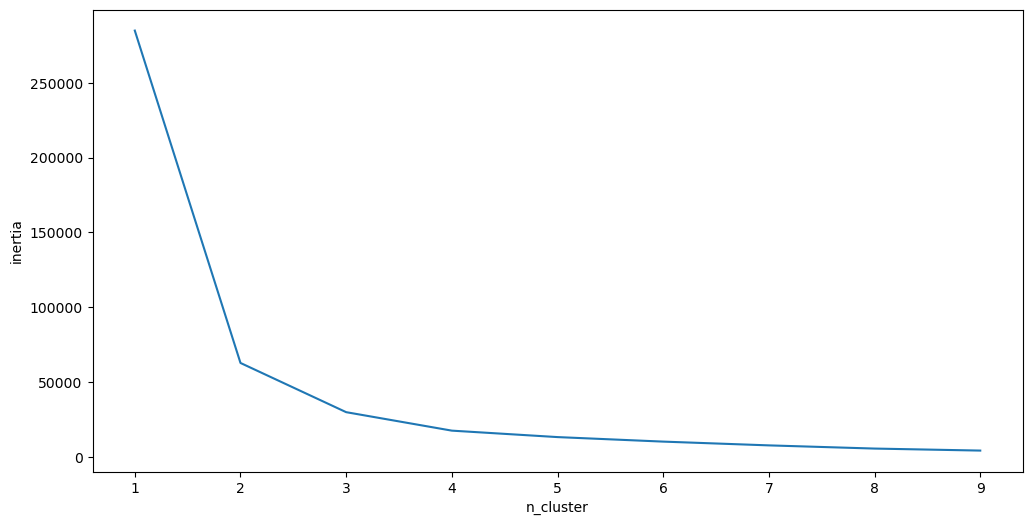

In [101]:
my_kmeans_coude(df)

### Silhouette

Le nombre optimal de cluster est : 2


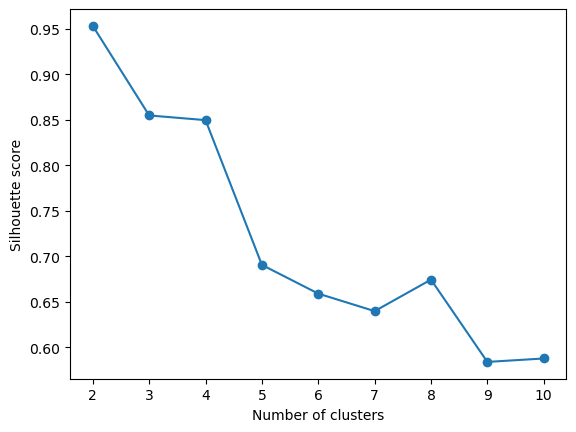

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [102]:
my_silhouette_method(df, 10)

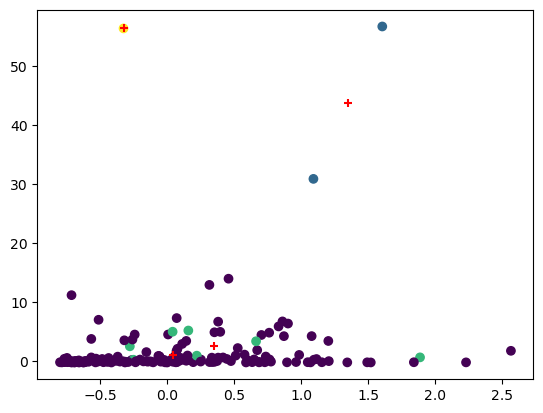

In [103]:
my_kmeans(df, 4)

### Boxplot par groupe

ValueError: Could not interpret input 'Coût d'une alimentation équilibré /n (PPP dollar par personne par jour)'

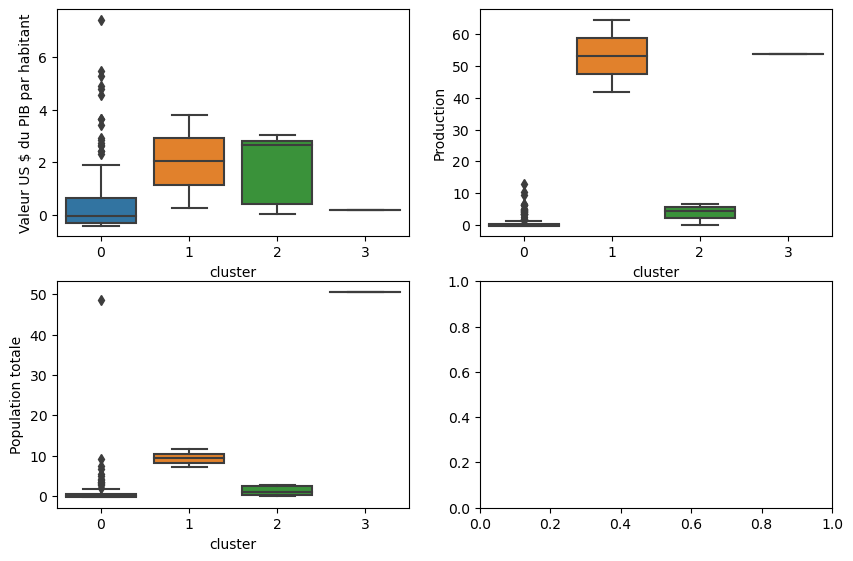

In [120]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df, x="cluster", y="Valeur US $ du PIB par habitant")

plt.subplot(322)
sns.boxplot(data=df, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df, x="cluster", y="Coût d'une alimentation équilibré /n (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df, x="cluster", y="Coût des aliments d'origine animale")

plt.subplot(326)
sns.boxplot(data=df, x="cluster", y="Political_Stability")

In [117]:
df.loc[df["cluster"]==1]

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Brésil                                                          1.091898          
États-Unis d'Amérique                                           1.605804          

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Brésil                                  30.8875               351.916667   
États-Unis d'Amérique                   56.7750               307.666667   

                       Importations - Quantité  Nourriture  Production  \
Zone                                                                     
Brésil                               -0.172185   30.984326   41.754801   
États-Unis d'Amérique                 1.417219   56.432602   64.540620   

                       Valeur US $ du PIB par habitant  \
Zone                                                     
Brésil                                        0.269276   
États-Unis d'Amérique                         3.805556   

                       Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                          
Brésil                                                         -0.692492                      
États-Unis d'Amérique                                          -0.082968                      

                       Coût des aliments d'origine animale  Population totale  \
Zone                                                                            
Brésil                                           -0.952815           7.200096   
États-Unis d'Amérique                            -1.264193          11.592881   

                       Population urbaine  Part de l'élevage de poulet (%)  \
Zone                                                                         
Brésil                          12.514618                        -0.316247   
États-Unis d'Amérique           18.622531                         0.372813   

                       Political_Stability  cluster  
Zone                                                 
Brésil                           -0.287275        1  
États-Unis d'Amérique             0.385291        1

### ACP

Explained Variance Ratio : [ 92.  99.  99. 100.]


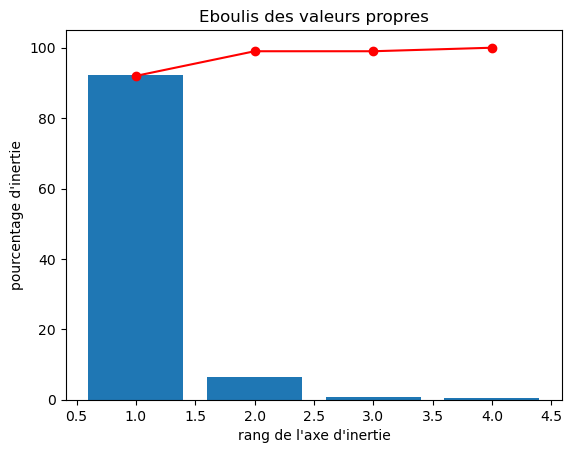

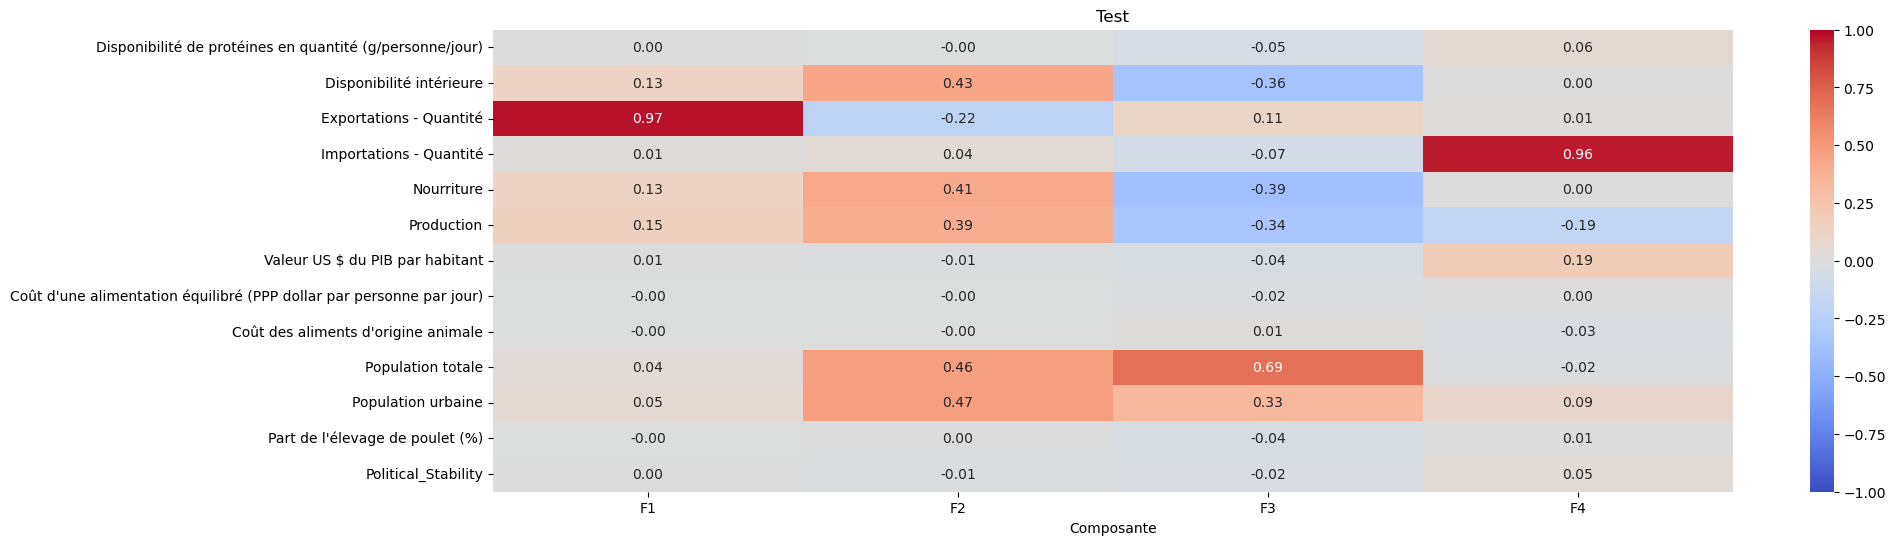

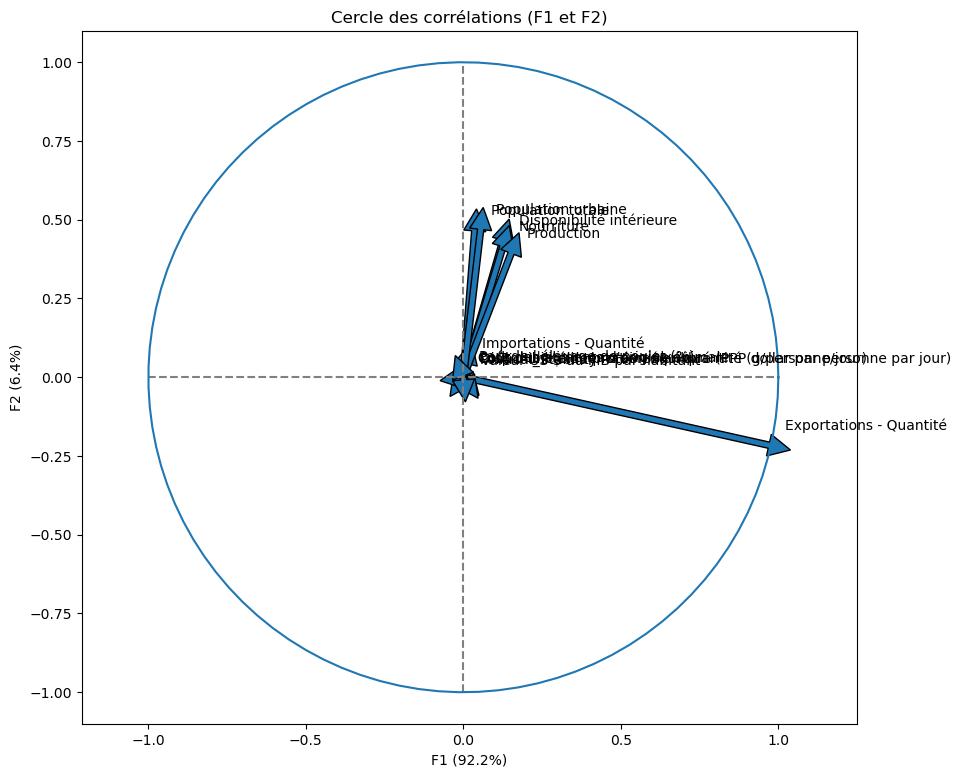

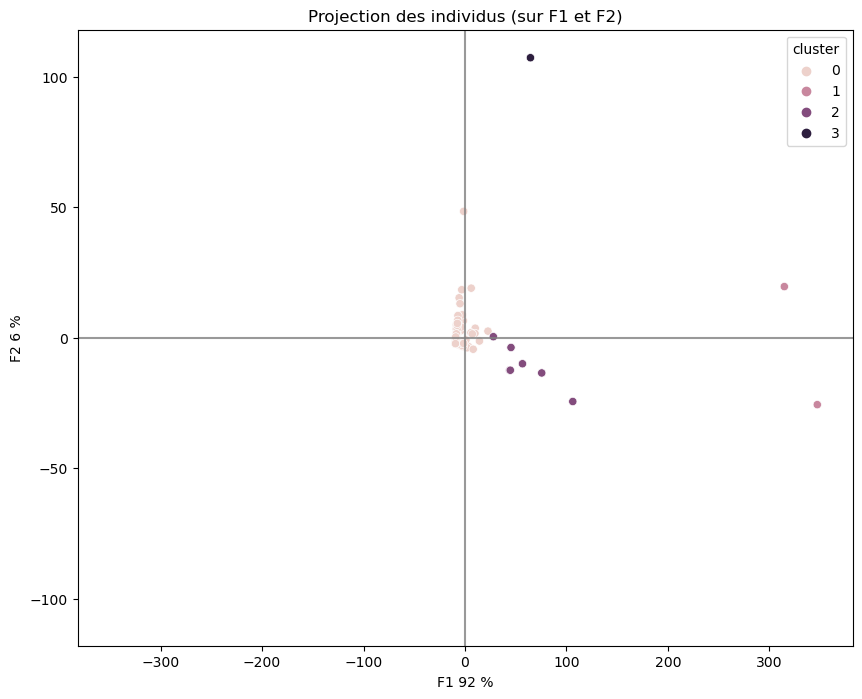

In [105]:
my_pca_proj(df, 4, (0,1), clusters=df["cluster"], sup_columns=["cluster"])

## Sans Scaling, Avec Ouliers

In [106]:
df_sans_scale

Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

                       Disponibilité intérieure  Exportations - Quantité  \
Zone                                                                       
Afghanistan                                57.0                      0.0   
Afrique du Sud                           2118.0                     63.0   
Albanie                                    47.0                      0.0   
Algérie                                   277.0                      0.0   
Allemagne                                1739.0                    646.0   
...                                         ...                      ...   
Émirats arabes unis                       412.0                     94.0   
Équateur                                  341.0                      0.0   
États-Unis d'Amérique                   18266.0                   3692.0   
Éthiopie                                   14.0                      0.0   
Îles Salomon                                3.0                      0.0   

                       Importations - Quantité  Nourriture  Pertes  \
Zone                                                                 
Afghanistan                               29.0        55.0     2.0   
Afrique du Sud                           514.0      2035.0    83.0   
Albanie                                   38.0        47.0     0.0   
Algérie                                    2.0       264.0    13.0   
Allemagne                                842.0      1609.0     0.0   
...                                        ...         ...     ...   
Émirats arabes unis                      433.0       412.0     0.0   
Équateur                                   0.0       324.0    17.0   
États-Unis d'Amérique                    123.0     18100.0     0.0   
Éthiopie                                   1.0        14.0     1.0   
Îles Salomon                               6.0         3.0     0.0   

                       Production  Valeur US $ du PIB par habitant  \
Zone                                                                 
Afghanistan                  28.0                       520.616409   
Afrique du Sud             1667.0                      6121.876572   
Albanie                      13.0                      4514.204908   
Algérie                     275.0                      4109.696001   
Allemagne                  1514.0                     44651.829102   
...                           ...                              ...   
Émirats arabes unis          48.0                     40644.804043   
Équateur                    340.0                      6213.501276   
États-Unis d'Amérique     21914.0                     59921.674703   
Éthiopie                     14.0                       721.753494   
Îles Salomon                  0.0                      2332.873855   

                       Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                 

In [107]:
# Colonne à supprimer pour le choix des variables
df_sans_scale = df_sans_scale.drop(["Exportations - Quantité","Pertes","distance_km"], axis=1)

### K-Means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

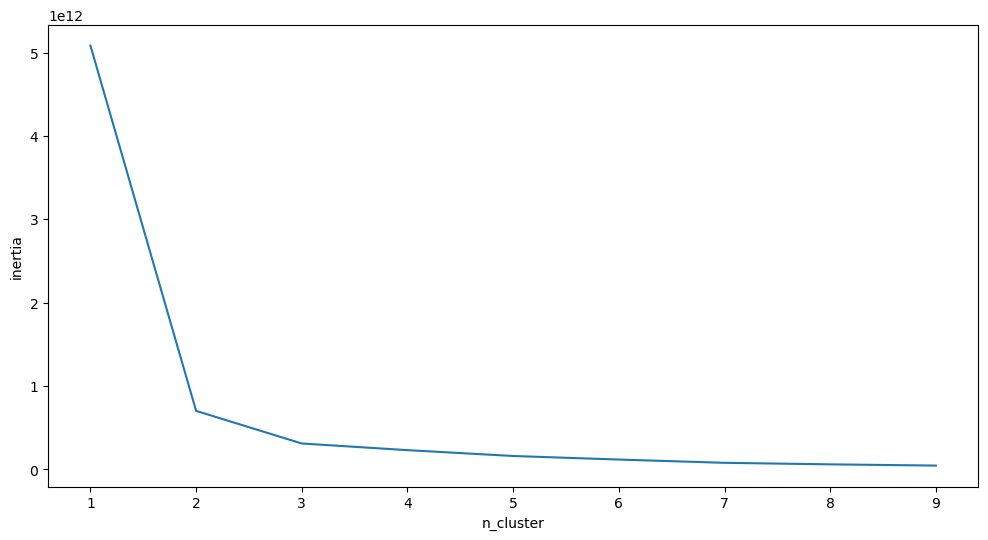

In [108]:
my_kmeans_coude(df_sans_scale)

### Silhouette

Le nombre optimal de cluster est : 2


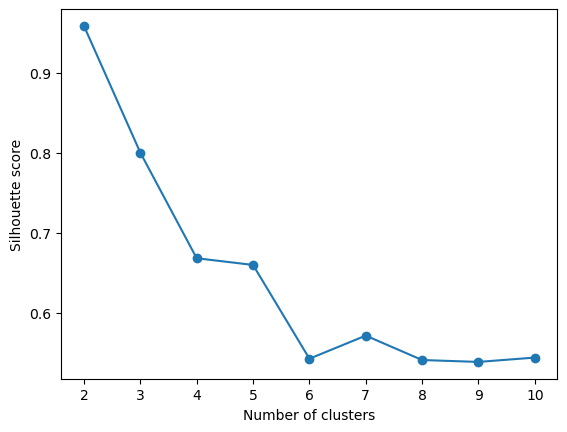

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [109]:
my_silhouette_method(df_sans_scale, 10)

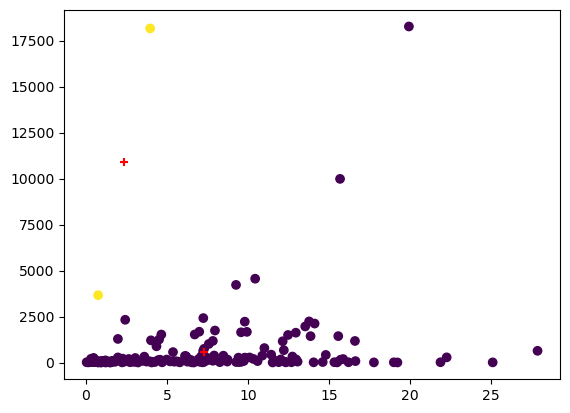

In [110]:
my_kmeans(df_sans_scale, 2)

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

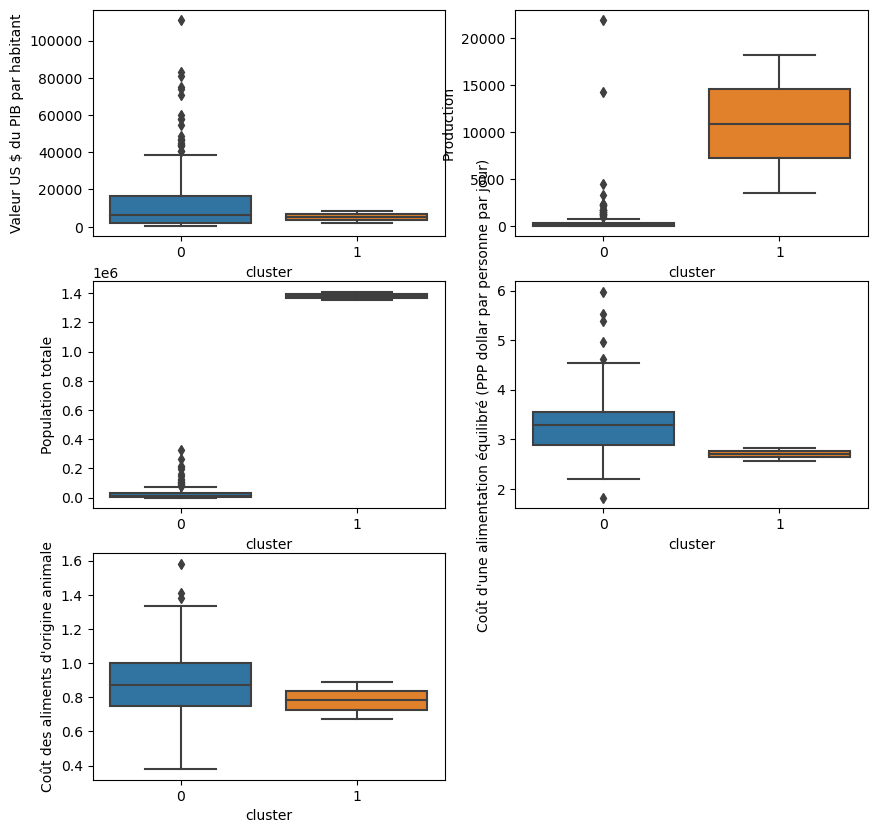

In [111]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df_sans_scale, x="cluster", y="Valeur US $ du PIB par habitant")

plt.subplot(322)
sns.boxplot(data=df_sans_scale, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df_sans_scale, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df_sans_scale, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df_sans_scale, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [ 97.  99. 100. 100.]


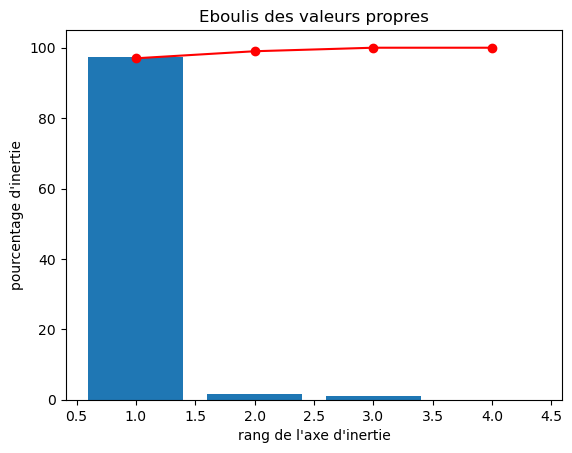

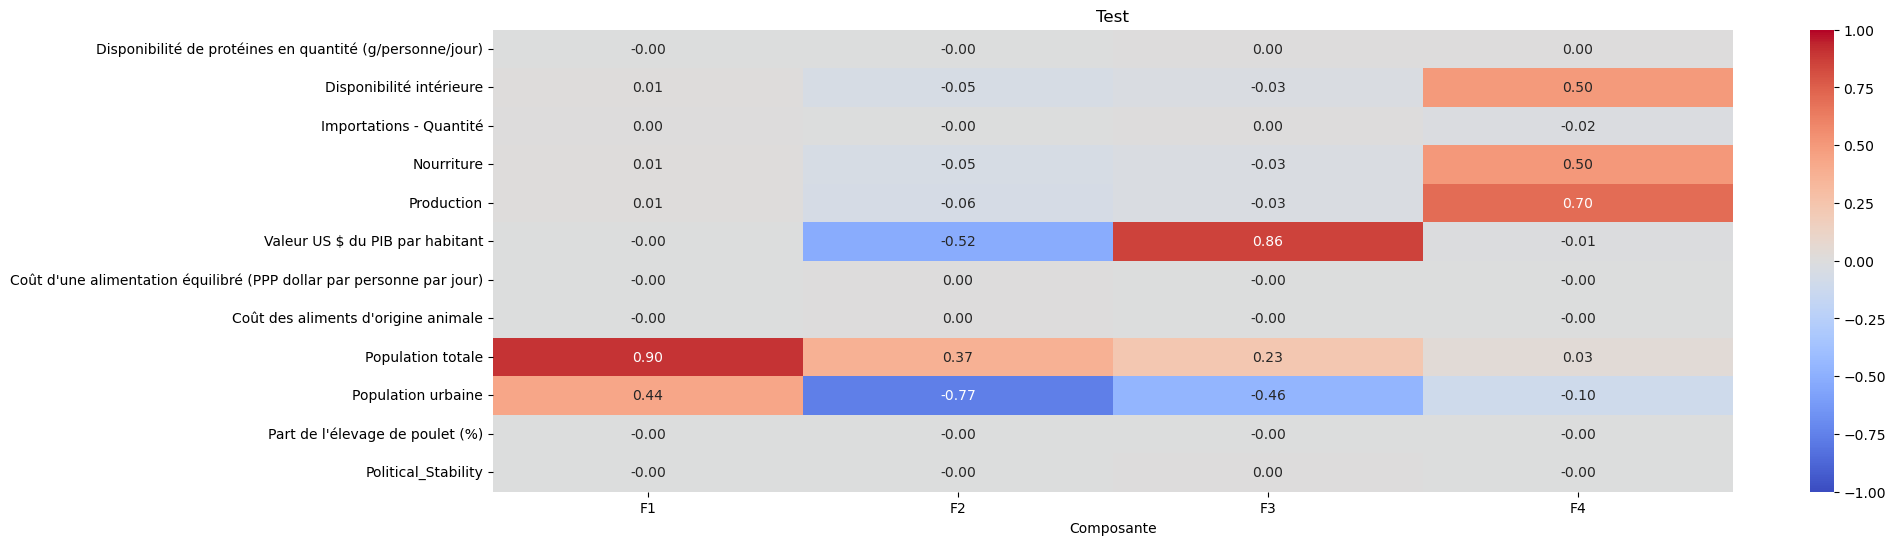

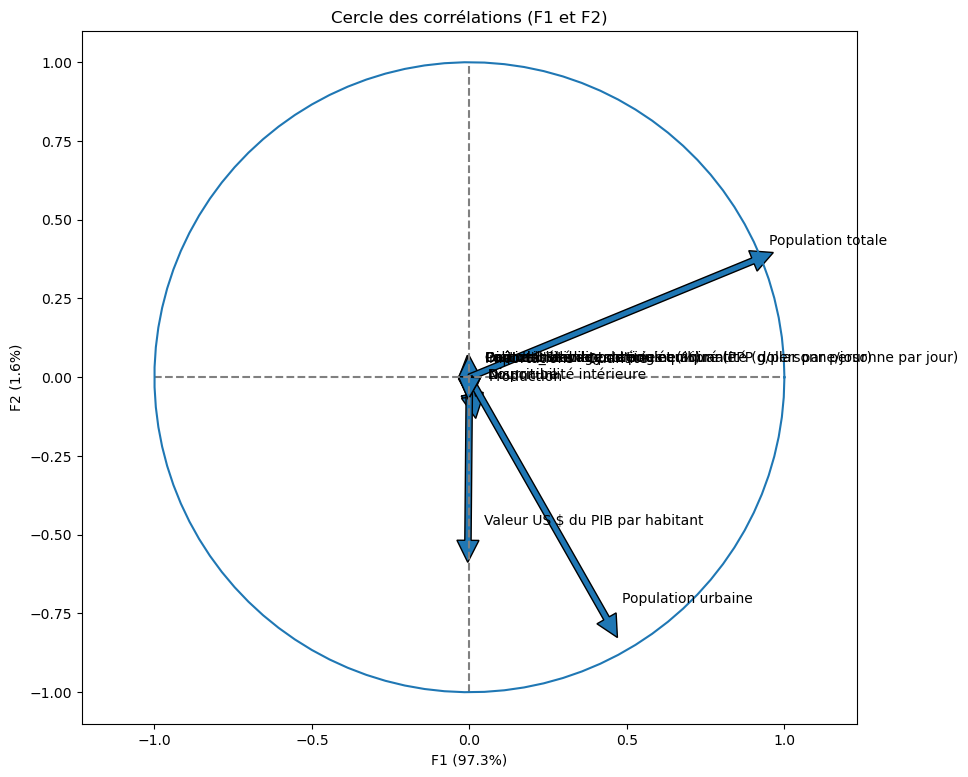

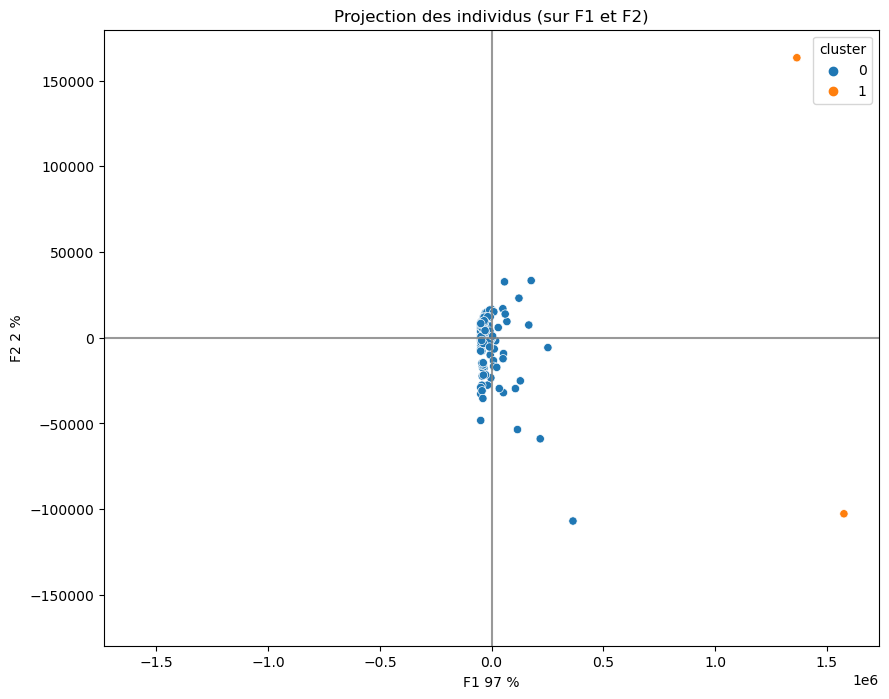

In [112]:
my_pca_proj(df_sans_scale, 4, (0,1), clusters=df_sans_scale["cluster"], sup_columns=["cluster"])

Cluster 1: ['Brésil', "États-Unis d'Amérique"]
Cluster 2: ['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine', 'Arménie', 'Australie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bangladesh', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Bosnie-Herzégovine', 'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cabo Verde', 'Cambodge', 'Cameroun', 'Canada', 'Chili', 'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre', 'Colombie', 'Congo', 'Costa Rica', 'Croatie', 'Cuba', "Côte d'Ivoire", 'Danemark', 'Djibouti', 'Dominique', 'El Salvador', 'Espagne', 'Estonie', 'Eswatini', 'Fidji', 'Finlande', 'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Grenade', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Hongrie', 'Indonésie', "Iran (République islamique d')", 'Iraq', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Japon', 'Jordanie', 'Kazakhstan', '

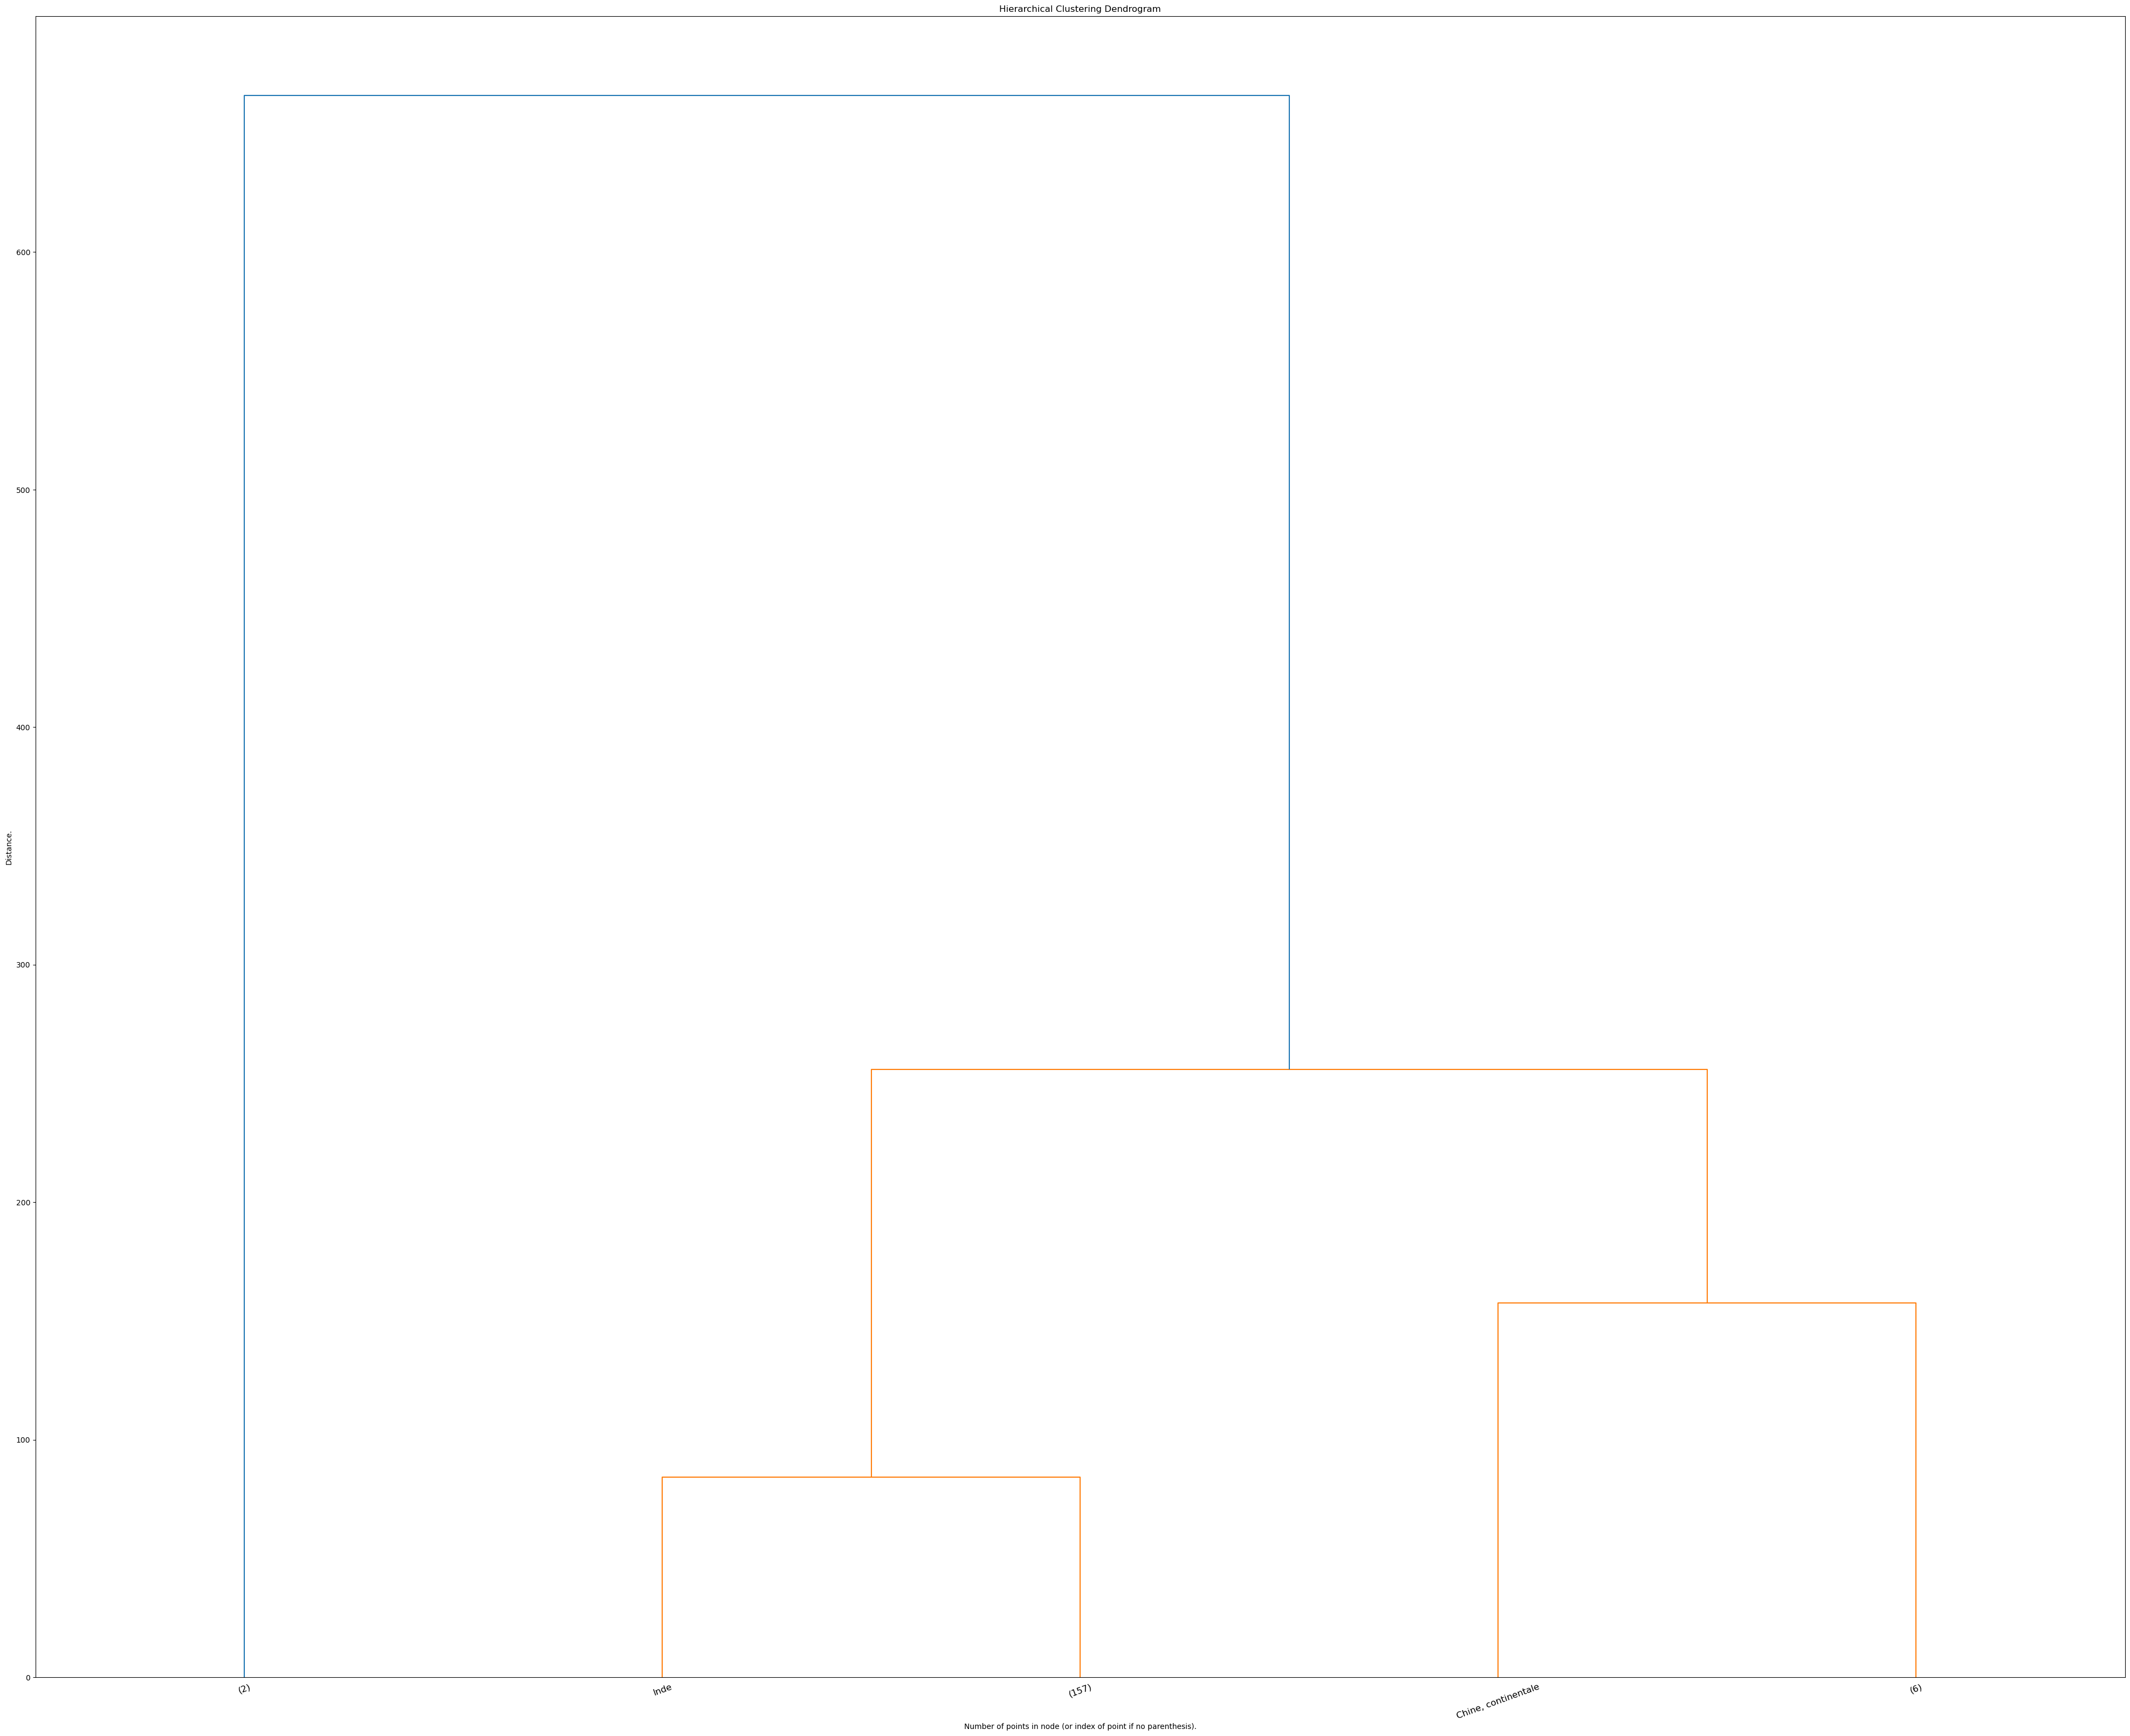

In [113]:
my_dendrogram(df,5)